# Projeto Churn - Análise Exploratória de Dados

- Contexto: 

Uma empresa que atua no modelo SaaS (Software as a Service) tem como produto um sistema de ERP (Enterprise Resource Planning). Foi levantada a hipótese de que a taxa de churn (cancelamento das assinaturas) da plataforma estaria aumentando.

- Objetivos:

Com base nos dados disponibilizados:
1. Validar a hipótese sobre o aumento do churn;
2. Identificar padrões relevantes nos dados que possam apoiar a equipe de negócios por meio de uma análise exploratória de dados.

## Dicionário de dados

| Variável                                                          | Descrição                                                              |
|-------------------------------------------------------------------|------------------------------------------------------------------------|
|**ID**                                                             | Identificador único do cliente                                         |
|**Tipo de empresa**                                                | Classificação da empresa em relação ao seu porte                       |
|**Fundação da empresa**                                            | Ano de fundação da empresa                                             |
|**Possui mais de um sócio**                                        | Informa se a empresa possui mais de um sócio                           |
|**Funcionários**                                                   | Informa a quantidade de funcionários da empresa (de forma categorizada)|
|**Meses de permanência**                                           | Quantidade de meses do início do contrato até maio de 2025             |
|**Utiliza serviços financeiros**                                   | Informa se a empresa utiliza serviços financeiros                      |
|**PossuiContador**                                                 | Informa se a empresa possui contador                                   |
|**Faz conciliação bancária**                                       | Informa se a empresa realiza conciliação bancária                      |
|**Frequência de utilização: Módulo financeiro**                    | Informa a frequência de utilização da feature do sistema               |
|**Frequência de utilização: Emissão de nota fiscal**               | Informa a frequência de utilização da feature do sistema               |
|**Frequência de utilização: Integração bancária**                  | Informa a frequência de utilização da feature do sistema               |
|**Frequência de utilização: Módulo de vendas**                     | Informa a frequência de utilização da feature do sistema               |
|**Frequência de utilização: Relatórios**                           | Informa a frequência de utilização da feature do sistema               |
|**Frequência de utilização: Utilização de APIs de integração**     | Informa a frequência de utilização da feature do sistema               |
|**Contrato**                                                       | Informa o tipo de contrato do cliente                                  |
|**Emite boletos**                                                  | Informa se a empresa emite boleto                                      | 
|**Emite boletos 1**                                                | Informa se a empresa emite boleto                                      |
|**Tipo de pagamento**                                              | Informa o método de pagamento que o cliente utiliza                    |
|**Receita mensal**                                                 | Informa a receita mensal gerada pelo cliente                           |
|**Receita total**                                                  | Informa a receita total acumulada pelo cliente durante sua permanência |
|**Churn**                                                          | Informa se houve churn do cliente                                      |
|**mes_churn**                                                      | Informa o mês em que o churn ocorreu                                   |



## Importando bibliotecas e dados

In [1]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [28]:
# Importar dados
df_raw = pd.read_csv('data/customer_churn_with_months.csv')

In [29]:
# Copiando dataset
df = df_raw.copy()

In [4]:
df.sample(10)

,ID,Tipo de empresa,Fundação da empresa,Possui mais de um sócio,Funcionários,Meses de permanência,Utiliza serviços financeiros,PossuiContador,Faz conciliação bancária,Frequência de utilização de feature do sistema: Módulo financeiro,...,Frequência de utilização de feature do sistema: Relatórios,Frequência de utilização de feature do sistema: Utilização de APIs de integração,Contrato,Emite boletos,Emite boletos.1,Tipo de pagamento,Receita mensal,Receita total,Churn,mes_churn
1241,1686,Pequena empresa,2011,Sim,até 5 funcionários,27,Sim,Não,manual,Pouco uso,...,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - pagamento único,70.55,1943.90,Não,NaN
3027,4111,Pequena empresa,2019,Sim,até 5 funcionários,70,Sim,Não,automática,Uso frequente,...,Pouco uso,Uso frequente,Anual,0,No,Boleto - mês a mês,67.95,4664.15,Não,NaN
4645,6315,Micro empresa,2016,Não,até 5 funcionários,6,Sim,Sim,manual,Pouco uso,...,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - mês a mês,73.85,401.30,Não,NaN
4841,6583,Micro empresa,2020,Não,até 5 funcionários,71,Sim,Sim,manual,Uso frequente,...,Uso frequente,Uso frequente,Anual,1,Yes,Cartão de crédito - mês a mês,106.75,7283.25,Não,NaN
5749,6633,Micro empresa,2017,Sim,até 5 funcionários,34,Sim,Sim,automática,Uso frequente,...,Pouco uso,Pouco uso,Mês-a-mês,0,No,Boleto - pagamento único,62.65,2274.90,Sim,04/2025
2265,3070,Micro empresa,2021,Não,até 5 funcionários,10,Sim,Não,não faz,Nunca utilizou,...,Nunca utilizou,Nunca utilizou,Mês-a-mês,1,Yes,Boleto - mês a mês,20.55,187.35,Não,NaN
1354,1831,Pequena empresa,2016,Não,6 ou mais funcionários,32,Sim,Não,não faz,Nunca utilizou,...,Nunca utilizou,Nunca utilizou,Anual,0,No,Boleto - mês a mês,20.50,696.80,Não,NaN
4993,6784,Micro empresa,2018,Não,6 ou mais funcionários,21,Não,NaN,automática,Uso frequente,...,Uso frequente,Pouco uso,Anual,0,No,Boleto - mês a mês,53.15,1183.20,Não,NaN
4409,5996,Pequena empresa,2018,Sim,6 ou mais funcionários,72,Sim,Não,manual,Uso frequente,...,Uso frequente,Uso frequente,Anual,0,No,Cartão de crédito - pagamento único,111.95,8033.10,Não,NaN
3704,5023,Pequena empresa,2020,Sim,6 ou mais funcionários,71,Sim,Não,manual,Uso frequente,...,Uso frequente,Uso frequente,Anual,0,No,Cartão de crédito - mês a mês,109.30,7782.85,Não,NaN


## Funções

In [5]:
def missing_pattern(colunas, coluna):
    """
       Função para verificar a quantidade de valores de uma variável, considerando nulos, em relação aos valores de outra variável.
       Essa função foi criada para tentar encontrar pradrões na ocorrência de nulos em uma variável comparândo a ocorrência de seus valores em
        relação aos valores de outra variável.
       colunas: São as variáveis as quais de quer verificar. Ex: df.loc[:,['variavel_sem_nulos', 'variavel_com_nulos']]
       coluna: Variável que possui valores nulos. Ex: ['variavel_sem_nulos']
    """
    freq = colunas.groupby(coluna, as_index=False).value_counts(normalize=True, dropna=False).round(decimals=2)

    return freq

In [6]:
def freq_abs_rel(coluna):
    """Função para retornar a frequência absoluta e relativa de uma variável.
       coluna: df['coluna']
    """
    contagem = coluna.value_counts(dropna=False, sort=True, ascending=False).to_frame().reset_index()
    porcentagem = (coluna.value_counts(normalize=True, dropna=False, sort=True, ascending=False)*100).round(decimals=2).to_frame().reset_index()
    contagem['proportion'] = porcentagem.proportion

    return contagem

In [7]:
def churn_vs_variable_barplot(coluna, ax=None):
    """
        Essa função plota um gráfico de barras para comparar a quantidade de ocorrências da variável inserida (coluna) dentro do grupo de churn e não churn.
        coluna: string com o nome da coluna. Ex: 'coluna'.
        ax: Parâmetro de posição do gráfico caso esteja usando plt.subplots (Ex: axes[0, 0]). Caso seja um gráfico só, não inserir valor para o parâmetro.    
    """
    fig = sns.countplot(df, x ='churn', hue=coluna, stat='percent', ax=ax)
    for container in fig.containers:
            fig.bar_label(container, fmt='%.2f');
        
    return fig

In [8]:
def mes_churn_vs_variable_barplot(coluna, ax=None):
    """
        Essa função plota um gráfico de barras para comparar a quantidade de ocorrências da variável inserida (coluna) dentro dos meses de churn.
        coluna: string com o nome da coluna. Ex: 'coluna'.
        ax: Parâmetro de posição do gráfico caso esteja usando plt.subplots (Ex: axes[0, 0]). Caso seja um gráfico só, não inserir valor para o parâmetro.    
    """
    fig = sns.countplot(df, x ='mes_churn', hue=coluna, ax=ax)
    for container in fig.containers:
            fig.bar_label(container, fmt='%.2f');
        
    return fig

## Renomeando colunas e criando nova feature

In [9]:
df.columns

Index(['ID', 'Tipo de empresa', 'Fundação da empresa',
       'Possui mais de um sócio', 'Funcionários', 'Meses de permanência ',
       'Utiliza serviços financeiros', 'PossuiContador',
       'Faz conciliação bancária',
       'Frequência de utilização de feature do sistema: Módulo financeiro',
       'Frequência de utilização de feature do sistema: Emissão de nota fiscal',
       'Frequência de utilização de feature do sistema: Integração bancária',
       'Frequência de utilização de feature do sistema: Módulo de vendas',
       'Frequência de utilização de feature do sistema: Relatórios',
       'Frequência de utilização de feature do sistema: Utilização de APIs de integração',
       'Contrato', 'Emite boletos', 'Emite boletos.1', 'Tipo de pagamento',
       'Receita mensal', 'Receita total', 'Churn', 'mes_churn'],
      dtype='object')

Como o nome de algumas colunas é extenso e a forma de escrita está despadronizada (letras maiúsculas e minúsculas, separação por espaço e por underscore, uso de caracteres especiais) optou-se por renomeá-las de forma padronizada e com nomes menores.

In [31]:
df = df.rename(columns={
    'ID': 'id',
    'Tipo de empresa': 'tipo_empresa',
    'Fundação da empresa': 'fundacao_empresa',
    'Possui mais de um sócio': 'mais_de_um_socio',
    'Funcionários': 'qtde_funcionarios',
    'Meses de permanência ': 'meses_permanencia',
    'Utiliza serviços financeiros': 'uso_servicos_financeiros',
    'PossuiContador': 'contador',
    'Faz conciliação bancária': 'conciliacao_bancaria',
    'Frequência de utilização de feature do sistema: Módulo financeiro': 'frequencia_uso_modulo_financeiro',
    'Frequência de utilização de feature do sistema: Emissão de nota fiscal': 'frequencia_uso_emissao_nota_fiscal',
    'Frequência de utilização de feature do sistema: Integração bancária': 'frequencia_uso_integracao_bancaria',
    'Frequência de utilização de feature do sistema: Módulo de vendas': 'frequencia_uso_modulo_vendas',
    'Frequência de utilização de feature do sistema: Relatórios': 'frequencia_uso_relatorios',
    'Frequência de utilização de feature do sistema: Utilização de APIs de integração': 'frequencia_uso_apis_integracao',
    'Contrato': 'contrato',
    'Emite boletos': 'emite_boletos_binario',
    'Emite boletos.1': 'emite_boletos',
    'Tipo de pagamento': 'tipo_pagamento',
    'Receita mensal': 'receita_mensal',
    'Receita total': 'receita_total',
    'Churn': 'churn'
})

Optou-se por criar uma nova coluna representando o engajamento de cada empresa com as seis funcionalidades do sistema cujas frequências de uso estão em análise no dataset.

In [ ]:
# Criando a variável 'engajamento', que representa a nota recebida por cada empresa pela sua frequência de uso de cada funcionalidade do sistema

# Criando cópias das colunas de frequência de uso
df['num_frequencia_uso_modulo_financeiro'] = df['frequencia_uso_modulo_financeiro'].copy()
df['num_frequencia_uso_emissao_nota_fiscal'] = df['frequencia_uso_emissao_nota_fiscal'].copy()
df['num_frequencia_uso_integracao_bancaria'] = df['frequencia_uso_integracao_bancaria'].copy()
df['num_frequencia_uso_modulo_vendas'] = df['frequencia_uso_modulo_vendas'].copy()
df['num_frequencia_uso_relatorios'] = df['frequencia_uso_relatorios'].copy()
df['num_frequencia_uso_apis_integracao'] = df['frequencia_uso_apis_integracao'].copy()

# Criando dicionário de notas de frequência de uso
novos_valores = {'Nunca utilizou': 1, 
                 'Pouco uso': 2,
                 'Uso frequente': 3}

# Substituindo as notas nas colunas copiadas
df['num_frequencia_uso_modulo_financeiro'] = df['num_frequencia_uso_modulo_financeiro'].replace(novos_valores)
df['num_frequencia_uso_emissao_nota_fiscal'] = df['num_frequencia_uso_emissao_nota_fiscal'].replace(novos_valores)
df['num_frequencia_uso_integracao_bancaria'] = df['num_frequencia_uso_integracao_bancaria'].replace(novos_valores)
df['num_frequencia_uso_modulo_vendas'] = df['num_frequencia_uso_modulo_vendas'].replace(novos_valores)
df['num_frequencia_uso_relatorios'] = df['num_frequencia_uso_relatorios'].replace(novos_valores)
df['num_frequencia_uso_apis_integracao'] = df['num_frequencia_uso_apis_integracao'].replace(novos_valores)

# Criando a coluna engajamento por meio da média das notas
df['engajamento'] = round((df['num_frequencia_uso_modulo_financeiro']+df['num_frequencia_uso_emissao_nota_fiscal']+df['num_frequencia_uso_integracao_bancaria']+df['num_frequencia_uso_modulo_vendas']+df['num_frequencia_uso_relatorios']+df['num_frequencia_uso_apis_integracao'])/6, 2)

In [ ]:
# Removendo as colunas copiadas, pois não serão mais necessárias
df = df.drop(['num_frequencia_uso_modulo_financeiro', 'num_frequencia_uso_emissao_nota_fiscal', 'num_frequencia_uso_integracao_bancaria', 
              'num_frequencia_uso_modulo_vendas', 'num_frequencia_uso_relatorios', 'num_frequencia_uso_apis_integracao'], 
              axis=1)

## Análise exploratória de Dados

### Exploração univariada

#### Entendendo os tipos de variável

In [49]:
df.shape

(7043, 24)

In [50]:
# Verificando tipos de dados e se há colunas com valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  7043 non-null   int64  
 1   tipo_empresa                        7043 non-null   object 
 2   fundacao_empresa                    7043 non-null   int64  
 3   mais_de_um_socio                    7043 non-null   object 
 4   qtde_funcionarios                   7043 non-null   object 
 5   meses_permanencia                   7043 non-null   int64  
 6   uso_servicos_financeiros            7043 non-null   object 
 7   contador                            6361 non-null   object 
 8   conciliacao_bancaria                7043 non-null   object 
 9   frequencia_uso_modulo_financeiro    7043 non-null   object 
 10  frequencia_uso_emissao_nota_fiscal  7043 non-null   object 
 11  frequencia_uso_integracao_bancaria  7043 no

In [51]:
#Visão geral dos dados
pd.DataFrame({
    "Tipo de dado": df.dtypes,
    "Qtde nulos": df.isnull().sum(),
    "% nulos": df.isnull().mean()*100,
    "Qtde valores únicos": df.nunique(),
    "Exemplos de valores": df.apply(lambda x: x.unique()[:3])
})

,Tipo de dado,Qtde nulos,% nulos,Qtde valores únicos,Exemplos de valores
id,int64,0,0.000000,7043,"[1, 2, 4]"
tipo_empresa,object,0,0.000000,2,"[Micro empresa, Pequena empresa]"
fundacao_empresa,int64,0,0.000000,21,"[2016, 2018, 2019]"
mais_de_um_socio,object,0,0.000000,2,"[Sim, Não]"
qtde_funcionarios,object,0,0.000000,2,"[até 5 funcionários, 6 ou mais funcionários]"
meses_permanencia,int64,0,0.000000,73,"[1, 34, 45]"
uso_servicos_financeiros,object,0,0.000000,2,"[Não, Sim]"
contador,object,682,9.683374,2,"[nan, Não , Sim]"
conciliacao_bancaria,object,0,0.000000,3,"[automática, manual, não faz]"
frequencia_uso_modulo_financeiro,object,0,0.000000,3,"[Pouco uso, Uso frequente, Nunca utilizou]"


A princípio há 3 colunas com valores nulos ("contador", "receita_total" e "mes_churn"). Ainda deve ser investigado se há outros valores que representam nulos salvos como texto.

Os valores nulos da coluna "mes_churn" parecem fazer sentido, pois o mês do churn só deveria estar preenchido quando há churn.

Os tipos de dados estão compatíveis com os valores presentes nas colunas.

As colunas referentes à emissão de boletos estão duplicadas (uma traz os valores Yes/No, enquanto a outra traz 0/1). Precisa ser verificado se as informações presentes nas duas são consistentes, neste caso, a análise pode seguir com apenas uma das colunas.

#### Investigando valores únicos

In [52]:
# Checando se há linhas duplicadas
df.duplicated().sum()

0

In [53]:
# Listando valores únicos das colunas categóricas
cols_cat = list(df.select_dtypes(include='object').columns)

df.loc[:, cols_cat].apply(lambda x: x.unique())

tipo_empresa                                           [Micro empresa, Pequena empresa]
mais_de_um_socio                                                             [Sim, Não]
qtde_funcionarios                          [até 5 funcionários, 6 ou mais funcionários]
uso_servicos_financeiros                                                     [Não, Sim]
contador                                                               [nan, Não , Sim]
conciliacao_bancaria                                      [automática, manual, não faz]
frequencia_uso_modulo_financeiro             [Pouco uso, Uso frequente, Nunca utilizou]
frequencia_uso_emissao_nota_fiscal           [Uso frequente, Pouco uso, Nunca utilizou]
frequencia_uso_integracao_bancaria           [Pouco uso, Uso frequente, Nunca utilizou]
frequencia_uso_modulo_vendas                 [Pouco uso, Uso frequente, Nunca utilizou]
frequencia_uso_relatorios                    [Pouco uso, Uso frequente, Nunca utilizou]
frequencia_uso_apis_integracao  

A coluna "contador" tem três valores únicos: "Sim", "Não" e "NaN". 

Hipóteses: 
- Os valores nulos seriam casos nos quais não há informação? 
- Ou que a empresa não tem contador? 
- Ou que houve algum erro de integração? 
- Ou são empresas recém-cadastradas? 
- Ou empresas que não definiram ainda se tem contador?

In [54]:
# Detalhamento dos valores únicos da variável tipo_pagamento
df.tipo_pagamento.unique()

array(['Boleto - pagamento único', 'Boleto - mês a mês',
       'Cartão de crédito - pagamento único',
       'Cartão de crédito - mês a mês'], dtype=object)

In [55]:
# Listando 5 primeiros valores únicos das colunas numéricas
cols_num = list(df.select_dtypes(include='number').columns)

df.loc[:, cols_num].apply(lambda x: x.unique()[:5])

id                                               [1, 2, 4, 7, 8]
fundacao_empresa                  [2016, 2018, 2019, 2021, 2017]
meses_permanencia                            [1, 34, 45, 22, 10]
emite_boletos_binario                                     [1, 0]
receita_mensal                 [29.85, 56.95, 42.3, 89.1, 29.75]
receita_total            [29.85, 1889.5, 1840.75, 1949.4, 301.9]
engajamento                         [2.17, 2.33, 2.5, 1.0, 2.83]
dtype: object

#### Verificando valores ausentes ou nulos

In [18]:
# Porcentagem de valores nulos na coluna "PossuiContador"
print(f'{100*df['contador'].isnull().mean():.2f}%')

9.68%


In [106]:
df['contador'].value_counts(normalize=True, dropna=False)*100

contador
Não     48.132898
Sim     42.183729
NaN      9.683374
Name: proportion, dtype: float64

In [20]:
# Porcentagem de valores nulos na coluna "mes_churn"
print(f'{100*df['mes_churn'].isnull().mean():.2f}%')

73.46%


In [107]:
df['mes_churn'].value_counts(normalize=True, dropna=False)*100


mes_churn
NaN        73.463013
05/2025    13.602158
04/2025    12.934829
Name: proportion, dtype: float64

73,46% dos clientes não cancelaram a assinatura do software.

In [22]:
# Porcentagem de valores nulos na coluna "receita_total"
print(f'{100*df['receita_total'].isnull().mean():.2f}%')

0.16%


É possível preencher os valores nulos na coluna receita total da seguinte forma: receita mensal x meses de permanência.

In [23]:
# Preenchendo nulos na coluna 'receita_total'
df['receita_total'] = df['receita_total'].fillna(df['receita_mensal']*df['meses_permanencia'])

In [ ]:
# Verificando a porcentagem de valores nulos na coluna "receita_total" após o preenchimento
print(f'{100*df['receita_total'].isnull().mean():.2f}%')

0.00%


##### Investigando se há um padrão nos valores ausentes da variável "contador"

In [25]:
missing_pattern(df.loc[:, ['tipo_empresa', 'contador']], ['tipo_empresa'])

,tipo_empresa,contador,proportion
0,Micro empresa,Não,0.48
1,Micro empresa,Sim,0.43
2,Micro empresa,NaN,0.09
3,Pequena empresa,Não,0.48
4,Pequena empresa,Sim,0.42
5,Pequena empresa,NaN,0.10


Não parece haver pradrão com a variável "tipo_empresa", pois as proporções de nulos são semelhantes para ambos os portes de empresa.

In [26]:
aux = missing_pattern(df.loc[:, ['fundacao_empresa', 'contador']], ['fundacao_empresa'])
aux['contador'] = aux['contador'].fillna("Missing")
aux

,fundacao_empresa,contador,proportion
0,2001,Sim,0.54
1,2001,Não,0.32
2,2001,Missing,0.14
3,2002,Sim,0.60
4,2002,Não,0.36
...,...,...,...
58,2020,Sim,0.39
59,2020,Missing,0.10
60,2021,Não,0.52
61,2021,Sim,0.39


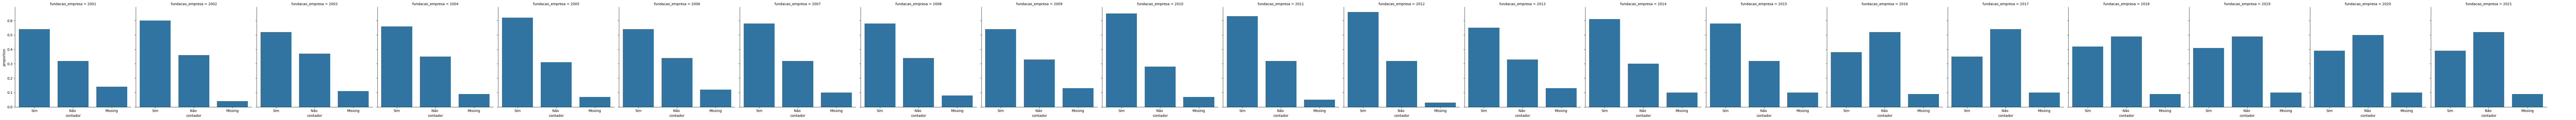

In [27]:
sns.catplot(data=aux, x=aux['contador'], y=aux['proportion'], col=aux['fundacao_empresa'], kind='bar');

Não parece haver padrão com a variável "fundacao_empresa", pois as proporções de nulos são semelhantes para os diferentes anos de fundação

In [28]:
missing_pattern(df.loc[:, ['mais_de_um_socio', 'contador']], ['mais_de_um_socio'])

,mais_de_um_socio,contador,proportion
0,Não,Não,0.54
1,Não,Sim,0.35
2,Não,NaN,0.10
3,Sim,Sim,0.49
4,Sim,Não,0.41
5,Sim,NaN,0.09


Não parece haver padrão com a variável "mais_de_um_socio", pois as proporções de nulos são semelhantes para as quantidades de sócio.

In [29]:
missing_pattern(df.loc[:, ['qtde_funcionarios', 'contador']], ['qtde_funcionarios'])

,qtde_funcionarios,contador,proportion
0,6 ou mais funcionários,Não,0.50
1,6 ou mais funcionários,Sim,0.40
2,6 ou mais funcionários,NaN,0.10
3,até 5 funcionários,Não,0.47
4,até 5 funcionários,Sim,0.43
5,até 5 funcionários,NaN,0.10


Não parece haver padrão com a variável "qtde_funcionarios", pois as proporções de nulos são semelhantes para as quantidades de funcionários.

In [30]:
aux = missing_pattern(df.loc[:, ['meses_permanencia', 'contador']], ['meses_permanencia'])
aux['contador'] = aux['contador'].fillna('Missing')
aux[aux['contador'] == 'Missing'].sort_values('proportion', ascending=False)

,meses_permanencia,contador,proportion
119,39,Missing,0.23
2,0,Missing,0.18
89,29,Missing,0.18
158,52,Missing,0.15
131,43,Missing,0.15
...,...,...,...
167,55,Missing,0.05
47,15,Missing,0.05
197,65,Missing,0.04
83,27,Missing,0.04


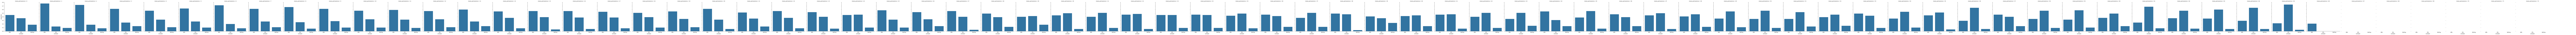

In [31]:
sns.catplot(data=aux, x=aux['contador'], y=aux['proportion'], col=aux['meses_permanencia'], kind='bar');

Não parece haver padrão com a variável "meses_permanencia", pois as proporções de nulos são semelhantes para os meses de permanência.

In [32]:
missing_pattern(df.loc[:, ['uso_servicos_financeiros', 'contador']], ['uso_servicos_financeiros'])

,uso_servicos_financeiros,contador,proportion
0,Não,NaN,1.00
1,Sim,Não,0.53
2,Sim,Sim,0.47


Somente empresas que não utilizam serviços financeiros possuem NaN na coluna "contador".

In [33]:
missing_pattern(df.loc[:, ['conciliacao_bancaria', 'contador']], ['conciliacao_bancaria'])

,conciliacao_bancaria,contador,proportion
0,automática,Não,0.43
1,automática,Sim,0.29
2,automática,NaN,0.28
3,manual,Sim,0.63
4,manual,Não,0.37
5,não faz,Não,0.78
6,não faz,Sim,0.22


Somente empresas que fazem conciliação bancária automática possuem NaN na coluna "contador".

In [34]:
missing_pattern(df.loc[:, ['contrato', 'contador']], ['contrato'])

,contrato,contador,proportion
0,Anual,Sim,0.52
1,Anual,Não,0.39
2,Anual,NaN,0.09
3,Mês-a-mês,Não,0.52
4,Mês-a-mês,Sim,0.38
5,Mês-a-mês,NaN,0.10
6,Trimestral,Não,0.48
7,Trimestral,Sim,0.42
8,Trimestral,NaN,0.10


Não parece haver padrão com a variável "contrato", pois as proporções de nulos são semelhantes para os tipos de contrato.

In [35]:
missing_pattern(df.loc[:, ['emite_boletos', 'contador']], ['emite_boletos'])

,emite_boletos,contador,proportion
0,No,Não,0.57
1,No,Sim,0.32
2,No,NaN,0.10
3,Yes,Sim,0.49
4,Yes,Não,0.42
5,Yes,NaN,0.09


Não parece haver padrão com a variável "emite_boletos", pois as proporções nulos são semelhantes para a emissão/não emissão de boletos.

In [36]:
missing_pattern(df.loc[:, ['tipo_pagamento', 'contador']], ['tipo_pagamento'])

,tipo_pagamento,contador,proportion
0,Boleto - mês a mês,Não,0.69
1,Boleto - mês a mês,Sim,0.22
2,Boleto - mês a mês,NaN,0.10
3,Boleto - pagamento único,Sim,0.48
4,Boleto - pagamento único,Não,0.42
5,Boleto - pagamento único,NaN,0.10
6,Cartão de crédito - mês a mês,Sim,0.48
7,Cartão de crédito - mês a mês,Não,0.42
8,Cartão de crédito - mês a mês,NaN,0.10
9,Cartão de crédito - pagamento único,Sim,0.49


Não parece haver padrão com a variável "tipo_pagamento", pois as proporções nulos são semelhantes para os tipos de pagamento.

In [37]:
missing_pattern(df.loc[:, ['churn', 'contador']], ['churn'])

,churn,contador,proportion
0,Não,Não,0.49
1,Não,Sim,0.41
2,Não,NaN,0.10
3,Sim,Sim,0.45
4,Sim,Não,0.45
5,Sim,NaN,0.09


Não parece haver padrão com a variável "churn", pois as proporções nulos são semelhantes para empresas que cancelaram e que não cancelaram.

In [38]:
missing_pattern(df.loc[:, ['mes_churn', 'contador']], ['mes_churn'])

,mes_churn,contador,proportion
0,04/2025,Não,0.48
1,04/2025,Sim,0.43
2,04/2025,NaN,0.09
3,05/2025,Sim,0.48
4,05/2025,Não,0.43
5,05/2025,NaN,0.09


Não parece haver padrão com a variável "mes_churn", pois as proporções nulos são semelhantes para os meses de churn.

In [39]:
missing_pattern(df.loc[:, ['frequencia_uso_modulo_financeiro', 'contador']], ['frequencia_uso_modulo_financeiro'])

,frequencia_uso_modulo_financeiro,contador,proportion
0,Nunca utilizou,Não,0.78
1,Nunca utilizou,Sim,0.22
2,Pouco uso,Sim,0.46
3,Pouco uso,Não,0.42
4,Pouco uso,NaN,0.11
5,Uso frequente,Sim,0.50
6,Uso frequente,Não,0.36
7,Uso frequente,NaN,0.14


Não parece haver padrão com a variável "frequencia_uso_modulo_financeiro".

In [40]:
missing_pattern(df.loc[:, ['frequencia_uso_emissao_nota_fiscal', 'contador']], ['frequencia_uso_emissao_nota_fiscal'])

,frequencia_uso_emissao_nota_fiscal,contador,proportion
0,Nunca utilizou,Não,0.78
1,Nunca utilizou,Sim,0.22
2,Pouco uso,Não,0.46
3,Pouco uso,Sim,0.41
4,Pouco uso,NaN,0.13
5,Uso frequente,Sim,0.56
6,Uso frequente,Não,0.32
7,Uso frequente,NaN,0.12


Não parece haver padrão com a variável "frequencia_uso_emissao_nota_fiscal".

In [41]:
missing_pattern(df.loc[:, ['frequencia_uso_integracao_bancaria', 'contador']], ['frequencia_uso_integracao_bancaria'])

,frequencia_uso_integracao_bancaria,contador,proportion
0,Nunca utilizou,Não,0.78
1,Nunca utilizou,Sim,0.22
2,Pouco uso,Não,0.47
3,Pouco uso,Sim,0.41
4,Pouco uso,NaN,0.12
5,Uso frequente,Sim,0.56
6,Uso frequente,Não,0.32
7,Uso frequente,NaN,0.13


Não parece haver padrão com a variável "frequencia_uso_integracao_bancaria".

In [42]:
missing_pattern(df.loc[:, ['frequencia_uso_modulo_vendas', 'contador']], ['frequencia_uso_modulo_vendas'])

,frequencia_uso_modulo_vendas,contador,proportion
0,Nunca utilizou,Não,0.78
1,Nunca utilizou,Sim,0.22
2,Pouco uso,Sim,0.46
3,Pouco uso,Não,0.42
4,Pouco uso,NaN,0.11
5,Uso frequente,Sim,0.50
6,Uso frequente,Não,0.36
7,Uso frequente,NaN,0.14


Não parece haver padrão com a variável "frequencia_uso_modulo_vendas".

In [43]:
missing_pattern(df.loc[:, ['frequencia_uso_relatorios', 'contador']], ['frequencia_uso_relatorios'])

,frequencia_uso_relatorios,contador,proportion
0,Nunca utilizou,Não,0.78
1,Nunca utilizou,Sim,0.22
2,Pouco uso,Não,0.48
3,Pouco uso,Sim,0.37
4,Pouco uso,NaN,0.14
5,Uso frequente,Sim,0.58
6,Uso frequente,Não,0.31
7,Uso frequente,NaN,0.11


Não parece haver padrão com a variável "frequencia_uso_relatorios".

In [44]:
missing_pattern(df.loc[:, ['frequencia_uso_apis_integracao', 'contador']], ['frequencia_uso_apis_integracao'])

,frequencia_uso_apis_integracao,contador,proportion
0,Nunca utilizou,Não,0.78
1,Nunca utilizou,Sim,0.22
2,Pouco uso,Não,0.49
3,Pouco uso,Sim,0.37
4,Pouco uso,NaN,0.14
5,Uso frequente,Sim,0.58
6,Uso frequente,Não,0.31
7,Uso frequente,NaN,0.11


Não parece haver padrão com a variável "frequencia_uso_apis_integracao".

Investigando-se os nulos da coluna 'contador', verificou-se que somente empresas que não utilizam serviços financeiros possuem NaN e somente empresas que fazem conciliação bancária automática possuem NaN.

Como não se sabe a origem dos valores nulos de fato, estes precisam ser considerados à parte, pois podem representar um comportamento diferente dos demais grupos ou problemas de registro.

#### Verificando a qualidade dos dados

Nas verificações realizadas anteriormente, não foram identificados problemas de qualidade dos dados como:

- Escritas inconsistentes
- Zeros onde não deveriam existir
- Unidades inconsistentes

In [45]:
# Verificando as colunas 'emite_boletos' e 'emite_boletos_binario' para ver se são correspondentes
coluna_binaria = df['emite_boletos_binario']
coluna_txt = df['emite_boletos'].map({'Yes': 1, 'No': 0})

linhas_diferentes = (coluna_binaria != coluna_txt).sum()

print(f'Quantidade de linhas diferentes: {linhas_diferentes}')

Quantidade de linhas diferentes: 0


As colunas são iguais. Dessa forma, uma pode ser eliminada. 

Por se tratar de uma EDA, optou-se por usar a coluna textual, mas para modelagem, seria mais recomendada a coluna binária.

In [46]:
df = df.drop(columns=['emite_boletos_binario'])

#### Analisando a distribuição das variáveis

##### Variáveis categóricas

In [47]:
freq_abs_rel(df['tipo_empresa'])

,tipo_empresa,count,proportion
0,Pequena empresa,3555,50.48
1,Micro empresa,3488,49.52


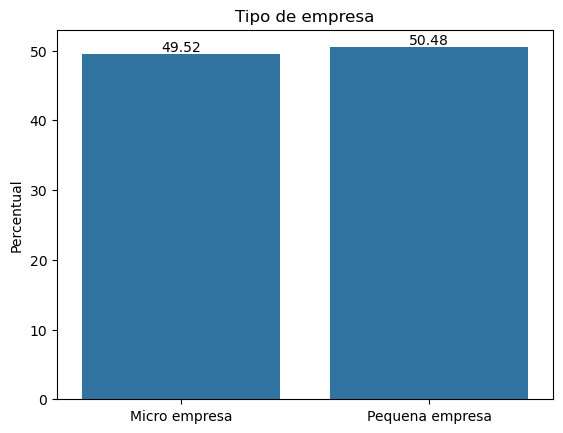

In [ ]:
ax = sns.countplot(df, x='tipo_empresa', stat="percent")
ax.bar_label(container=ax.containers[0], fmt='%.2f')
ax.set_title('Tipo de empresa')
ax.set_xlabel('')
ax.set_ylabel('Percentual');

A distribuição dos tipos de empresa é bem semelhante, o que pode indicar que os clientes do nosso software se dividem de forma quase identica, ou pode indicar, ainda, uma amostragem intencionalmente balanceada. 

In [49]:
aux = freq_abs_rel(df['mais_de_um_socio'])
aux

,mais_de_um_socio,count,proportion
0,Não,3641,51.7
1,Sim,3402,48.3


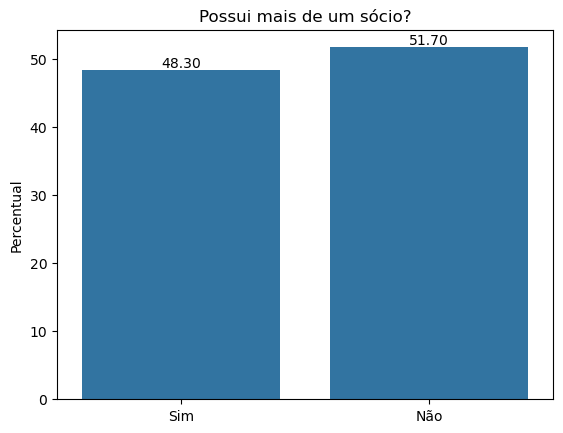

In [50]:
ax = sns.countplot(df, x='mais_de_um_socio', stat="percent")
ax.bar_label(container=ax.containers[0], fmt='%.2f')
ax.set_title('Possui mais de um sócio?')
ax.set_xlabel('')
ax.set_ylabel('Percentual');

A distribuição da quantidade de sócios é bem semelhante, o que pode indicar que os clientes do nosso software se dividem de forma quase identica, ou pode indicar, ainda, uma amostragem intencionalmente balanceada. 

In [51]:
aux = freq_abs_rel(df['qtde_funcionarios'])
aux

,qtde_funcionarios,count,proportion
0,até 5 funcionários,4933,70.04
1,6 ou mais funcionários,2110,29.96


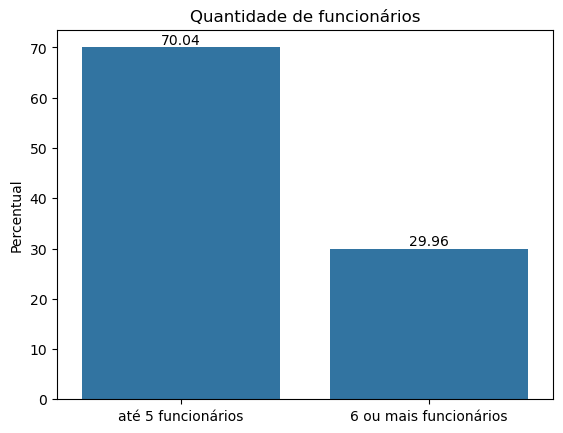

In [52]:
ax = sns.countplot(df, x='qtde_funcionarios', stat="percent")
ax.bar_label(container=ax.containers[0], fmt='%.2f')
ax.set_title('Quantidade de funcionários')
ax.set_xlabel('')
ax.set_ylabel('Percentual');

A maioria das empresas na base de dados (~70%) tem até 5 funcionários, o que é congruente com o fato de nossa base de dados conter apenas micro e pequenas empresas.

In [53]:
aux = freq_abs_rel(df['uso_servicos_financeiros'])
aux

,uso_servicos_financeiros,count,proportion
0,Sim,6361,90.32
1,Não,682,9.68


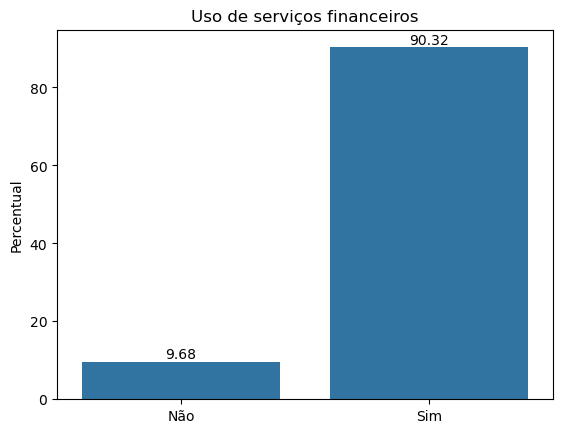

In [54]:
ax = sns.countplot(df, x='uso_servicos_financeiros', stat="percent")
ax.bar_label(container=ax.containers[0], fmt='%.2f')
ax.set_title('Uso de serviços financeiros')
ax.set_xlabel('')
ax.set_ylabel('Percentual');

A maioria das empresas (~90%) faz uso de serviços financeiros.

In [55]:
aux = freq_abs_rel(df['contador'])
aux.contador = aux.contador.fillna('Missing')
aux

,contador,count,proportion
0,Não,3390,48.13
1,Sim,2971,42.18
2,Missing,682,9.68


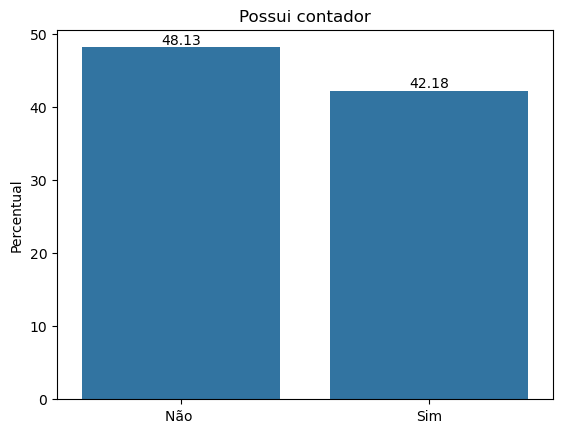

In [56]:
ax = sns.countplot(df, x='contador', stat="percent")
ax.bar_label(container=ax.containers[0], fmt='%.2f')
ax.set_title('Possui contador')
ax.set_xlabel('')
ax.set_ylabel('Percentual');

O percentual de empresas que não possui contador é ligeiramente superior ao das empresas que possuem.

In [57]:
aux = freq_abs_rel(df['conciliacao_bancaria'])
aux

,conciliacao_bancaria,count,proportion
0,manual,3096,43.96
1,automática,2421,34.37
2,não faz,1526,21.67


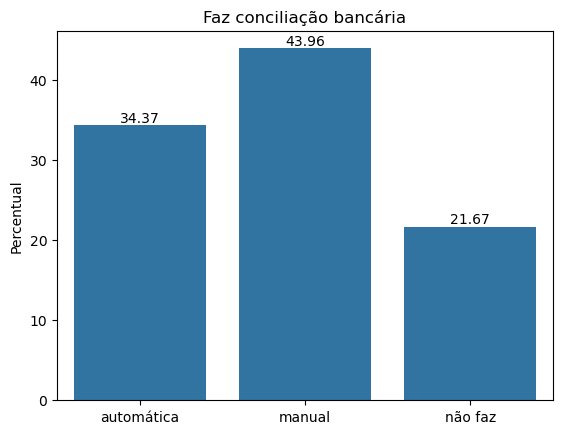

In [58]:
ax = sns.countplot(df, x='conciliacao_bancaria', stat="percent")
ax.bar_label(container=ax.containers[0], fmt='%.2f')
ax.set_title('Faz conciliação bancária')
ax.set_xlabel('')
ax.set_ylabel('Percentual');

A maior parte dos clientes faz conciliação bancária de forma manual, seguida da automática. Um número considerável (quase um quarto da base) não faz conciliação bancária.

In [59]:
aux = freq_abs_rel(df['frequencia_uso_modulo_financeiro'])
aux

,frequencia_uso_modulo_financeiro,count,proportion
0,Pouco uso,3498,49.67
1,Uso frequente,2019,28.67
2,Nunca utilizou,1526,21.67


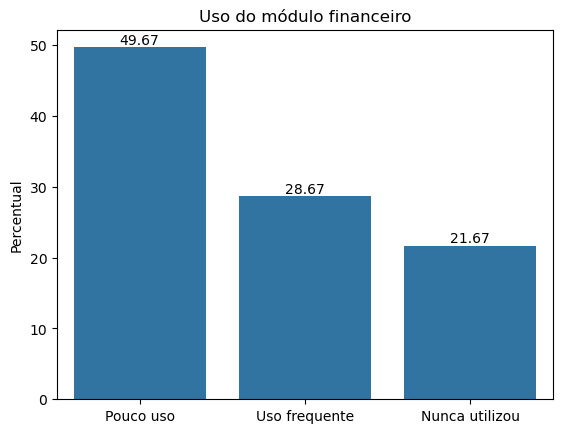

In [60]:
ax = sns.countplot(df, x='frequencia_uso_modulo_financeiro', stat="percent")
ax.bar_label(container=ax.containers[0], fmt='%.2f')
ax.set_title('Uso do módulo financeiro')
ax.set_xlabel('')
ax.set_ylabel('Percentual');

In [61]:
aux = freq_abs_rel(df['frequencia_uso_emissao_nota_fiscal'])
aux

,frequencia_uso_emissao_nota_fiscal,count,proportion
0,Pouco uso,3088,43.84
1,Uso frequente,2429,34.49
2,Nunca utilizou,1526,21.67


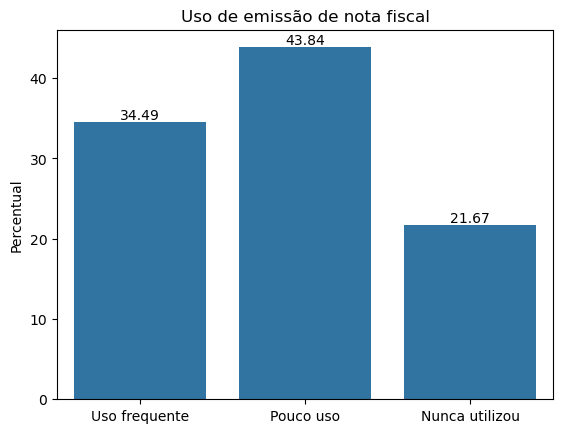

In [62]:
ax = sns.countplot(df, x='frequencia_uso_emissao_nota_fiscal', stat="percent")
ax.bar_label(container=ax.containers[0], fmt='%.2f')
ax.set_title('Uso de emissão de nota fiscal')
ax.set_xlabel('')
ax.set_ylabel('Percentual');

In [63]:
aux = freq_abs_rel(df['frequencia_uso_integracao_bancaria'])
aux

,frequencia_uso_integracao_bancaria,count,proportion
0,Pouco uso,3095,43.94
1,Uso frequente,2422,34.39
2,Nunca utilizou,1526,21.67


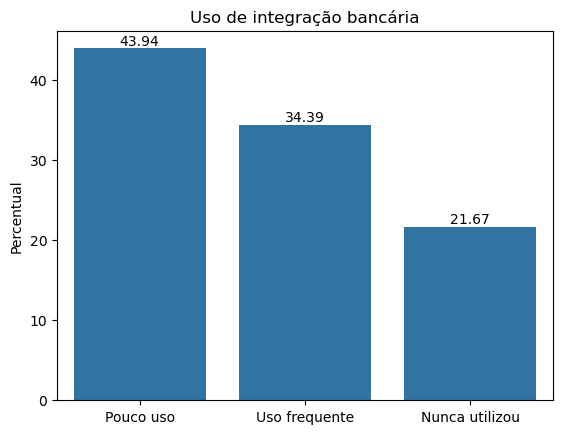

In [64]:
ax = sns.countplot(df, x='frequencia_uso_integracao_bancaria', stat="percent")
ax.bar_label(container=ax.containers[0], fmt='%.2f')
ax.set_title('Uso de integração bancária')
ax.set_xlabel('')
ax.set_ylabel('Percentual');

In [65]:
aux = freq_abs_rel(df['frequencia_uso_modulo_vendas'])
aux

,frequencia_uso_modulo_vendas,count,proportion
0,Pouco uso,3473,49.31
1,Uso frequente,2044,29.02
2,Nunca utilizou,1526,21.67


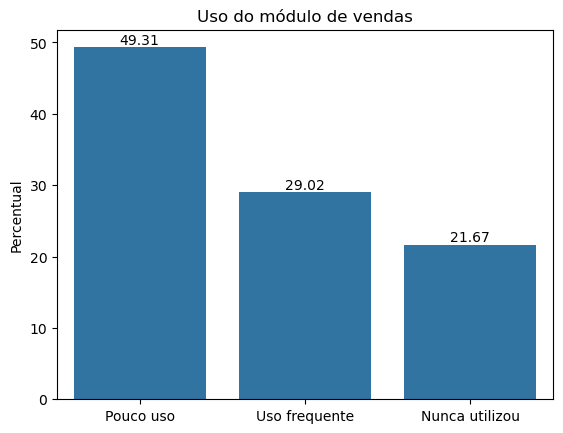

In [66]:
ax = sns.countplot(df, x='frequencia_uso_modulo_vendas', stat="percent")
ax.bar_label(container=ax.containers[0], fmt='%.2f')
ax.set_title('Uso do módulo de vendas')
ax.set_xlabel('')
ax.set_ylabel('Percentual');

In [67]:
aux = freq_abs_rel(df['frequencia_uso_relatorios'])
aux

,frequencia_uso_relatorios,count,proportion
0,Pouco uso,2810,39.90
1,Uso frequente,2707,38.44
2,Nunca utilizou,1526,21.67


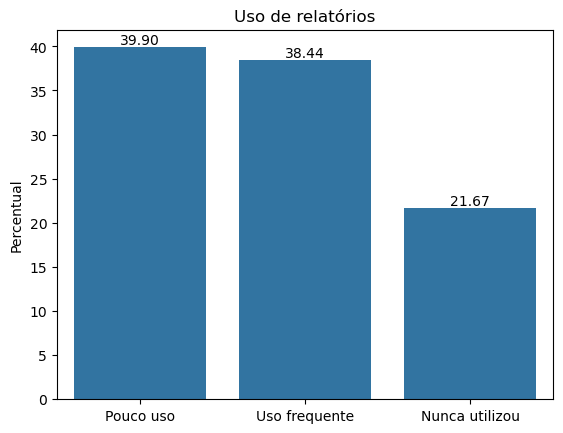

In [68]:
ax = sns.countplot(df, x='frequencia_uso_relatorios', stat="percent")
ax.bar_label(container=ax.containers[0], fmt='%.2f')
ax.set_title('Uso de relatórios')
ax.set_xlabel('')
ax.set_ylabel('Percentual');

In [69]:
aux = freq_abs_rel(df['frequencia_uso_apis_integracao'])
aux

,frequencia_uso_apis_integracao,count,proportion
0,Pouco uso,2785,39.54
1,Uso frequente,2732,38.79
2,Nunca utilizou,1526,21.67


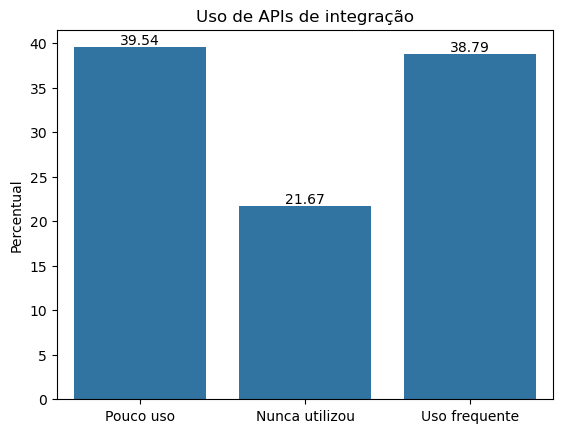

In [70]:
ax = sns.countplot(df, x='frequencia_uso_apis_integracao', stat="percent")
ax.bar_label(container=ax.containers[0], fmt='%.2f')
ax.set_title('Uso de APIs de integração')
ax.set_xlabel('')
ax.set_ylabel('Percentual');

Em relação à frequência de uso das funcionalidades do software, somados, os percentuais de empresas que fazem pouco uso e nunca utilizaram são a maioria.

O percentual de empresas que fazem uso frequente do módulo financeiro e do módulo de vendas está abaixo de 30%. No caso do uso de emissão de nota fiscal e uso de integração bancária, os percentuais de uso frequente pelos clientes são de aproximadamente 34%.

No caso, do uso dos relatórios e de APIs de integração, os percentuais de empresas que fazem pouco uso e que fazem uso frequente são próximos (pouco menos de 40%).

A quantidade de empresas que nunca utilizou funcionalidades do sistema é identica em todas as funcionalidades (1.526 empresas), o que pode indicar um grupo de clientes inativos ou que só faz uso muito básico do sistema. 

In [71]:
aux = freq_abs_rel(df['contrato'])
aux

,contrato,count,proportion
0,Mês-a-mês,3875,55.02
1,Anual,1695,24.07
2,Trimestral,1473,20.91


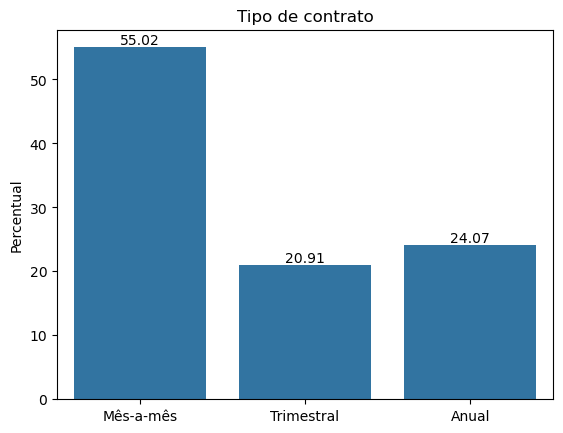

In [72]:
ax = sns.countplot(df, x='contrato', stat="percent")
ax.bar_label(container=ax.containers[0], fmt='%.2f')
ax.set_title('Tipo de contrato')
ax.set_xlabel('')
ax.set_ylabel('Percentual');

A maioria dos clientes possui contrato mês-a-mês (~55%), enquanto a outra parte se divide entre anual (~24%) e trimestral (~21%), estes últimos possuindo percentual semelhante.

In [73]:
aux = freq_abs_rel(df['emite_boletos'])
aux

,emite_boletos,count,proportion
0,Yes,4171,59.22
1,No,2872,40.78


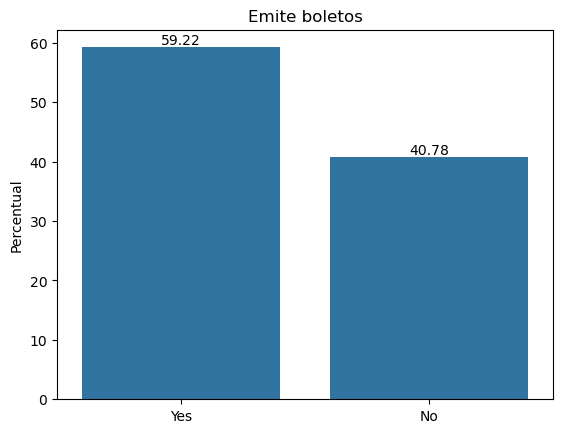

In [74]:
ax = sns.countplot(df, x='emite_boletos', stat="percent")
ax.bar_label(container=ax.containers[0], fmt='%.2f')
ax.set_title('Emite boletos')
ax.set_xlabel('')
ax.set_ylabel('Percentual');

A maioria (~59%) das empresas emite boletos. No entanto, o percentual de clientes que não utiliza a funcionalidade de emissão de boletos é alta (~40%).

In [75]:
aux = freq_abs_rel(df['tipo_pagamento'])
aux

,tipo_pagamento,count,proportion
0,Boleto - pagamento único,2365,33.58
1,Boleto - mês a mês,1612,22.89
2,Cartão de crédito - pagamento único,1544,21.92
3,Cartão de crédito - mês a mês,1522,21.61


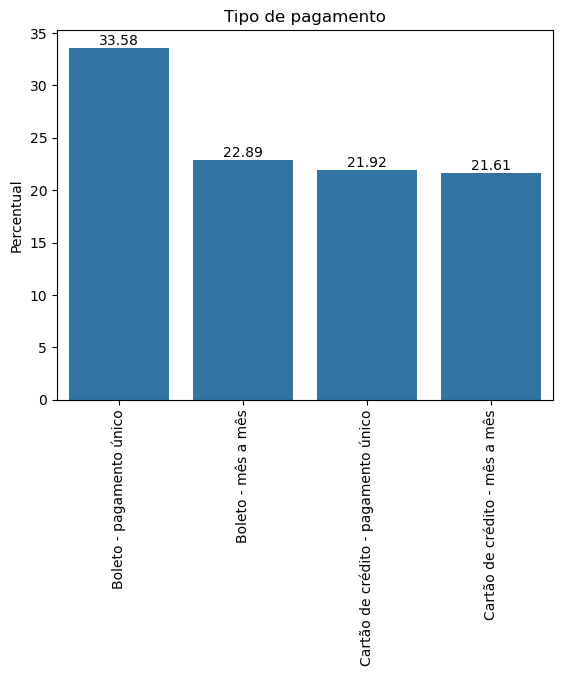

In [76]:
ax = sns.countplot(df, x='tipo_pagamento', stat="percent")
ax.bar_label(container=ax.containers[0], fmt='%.2f')
plt.xticks(rotation=90)
ax.set_title('Tipo de pagamento')
ax.set_xlabel('')
ax.set_ylabel('Percentual');

O percentual de pagamento realizado por boleto único (~34%) está acima dos demais métodos, que, por sua vez, apresentam percentual de uso semelhante (~22%).

In [77]:
aux = freq_abs_rel(df['churn'])
aux

,churn,count,proportion
0,Não,5174,73.46
1,Sim,1869,26.54


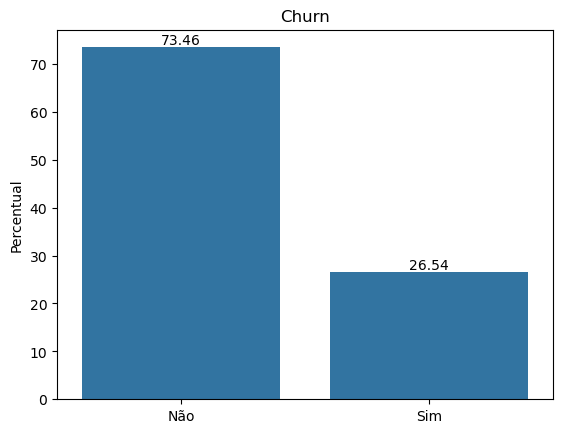

In [78]:
ax = sns.countplot(df, x='churn', stat="percent")
ax.bar_label(container=ax.containers[0], fmt='%.2f')
ax.set_title('Churn')
ax.set_xlabel('')
ax.set_ylabel('Percentual');

Pouco mais de um quarto dos clientes cancelaram (~27%).

In [79]:
aux = freq_abs_rel(df['mes_churn'])
aux.mes_churn = aux.mes_churn.fillna('Missing')
aux

,mes_churn,count,proportion
0,Missing,5174,73.46
1,05/2025,958,13.60
2,04/2025,911,12.93


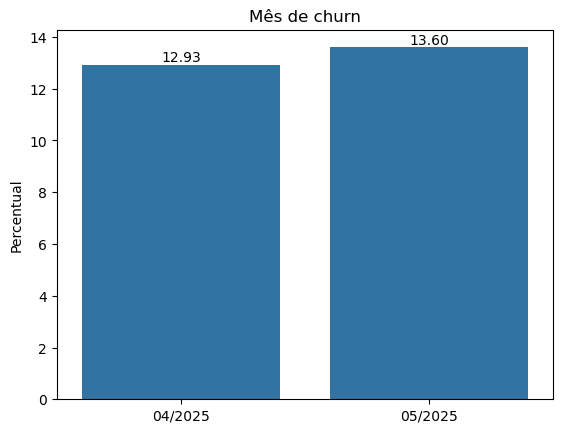

In [80]:
ax = sns.countplot(df, x='mes_churn', stat="percent")
ax.bar_label(container=ax.containers[0], fmt='%.2f')
ax.set_title('Mês de churn')
ax.set_xlabel('')
ax.set_ylabel('Percentual');

Houve um aumento nas ocorrências de churn registradas na base de abril (911) para maio de 2025 (958).

##### Variáveis numéricas

In [56]:
df.select_dtypes(include='number').columns

Index(['id', 'fundacao_empresa', 'meses_permanencia', 'emite_boletos_binario',
       'receita_mensal', 'receita_total', 'engajamento'],
      dtype='object')

In [57]:
df[['fundacao_empresa', 'meses_permanencia', 'receita_mensal', 'receita_total', 'engajamento']].describe()

,fundacao_empresa,meses_permanencia,receita_mensal,receita_total,engajamento
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,2016.736476,32.371149,64.761692,2283.300441,2.123084
std,4.582311,24.559481,30.090047,2266.771362,0.641621
min,2001.000000,0.000000,18.250000,18.800000,1.000000
25%,2016.000000,9.000000,35.500000,401.450000,2.000000
50%,2018.000000,29.000000,70.350000,1397.475000,2.330000
75%,2020.000000,55.000000,89.850000,3794.737500,2.500000
max,2021.000000,72.000000,118.750000,8684.800000,3.000000


Para as variáveis 'meses_permanencia', 'receita_mensal' e 'receita_total', os desvios padrões de cada variável são altos, indicando grande dispersão dos dados em relação à média.

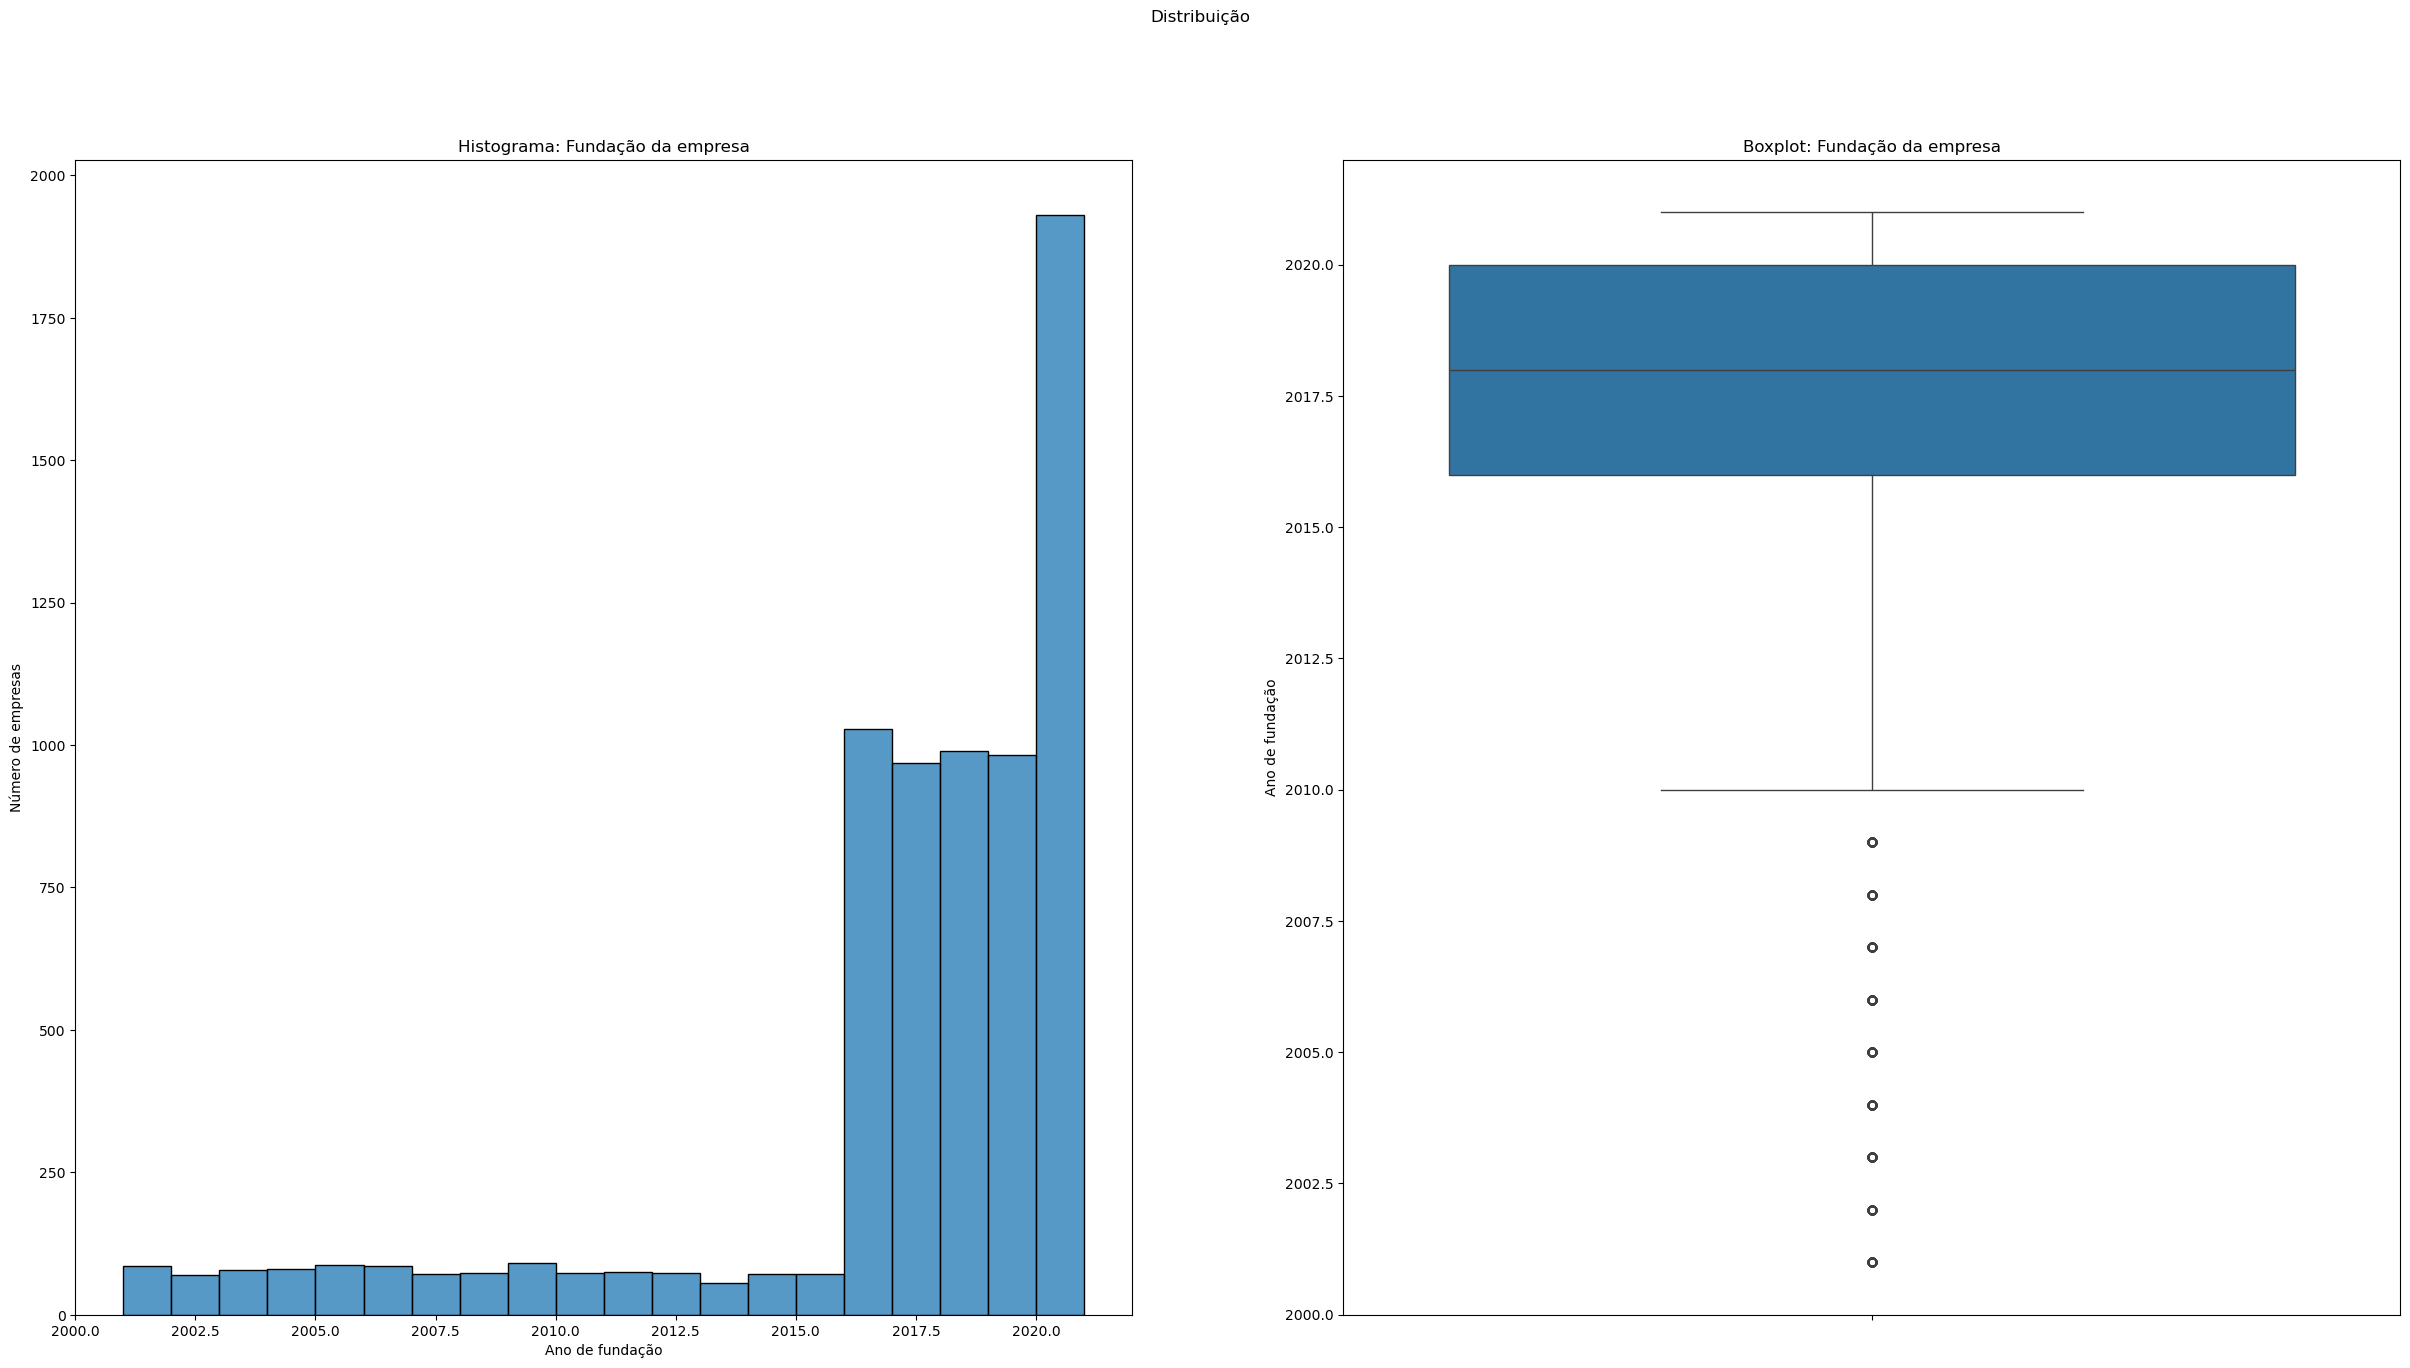

In [108]:
# Fundação da empresa

fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Distribuição')

# Gráfico de barras
sns.histplot(ax=axes[0], data=df, x='fundacao_empresa', bins=20)
axes[0].set_title('Histograma: Fundação da empresa')
axes[0].set_xlabel('Ano de fundação') 
axes[0].set_ylabel('Número de empresas') 

# Boxlot
sns.boxplot(data=df['fundacao_empresa'])
axes[1].set_title('Boxplot: Fundação da empresa')
axes[1].set_xlabel('') 
axes[1].set_ylabel('Ano de fundação');

In [84]:
print(f'Skew: {df['fundacao_empresa'].skew():.2f} \nCurtose: {df['fundacao_empresa'].kurtosis():.2f}')

Skew: -1.85 
Curtose: 2.91


75% das empresas na base de dados foi fundada a partir do ano de 2016, o que indica que a base de clientes possui, em sua maioria, empresas mais jovens.

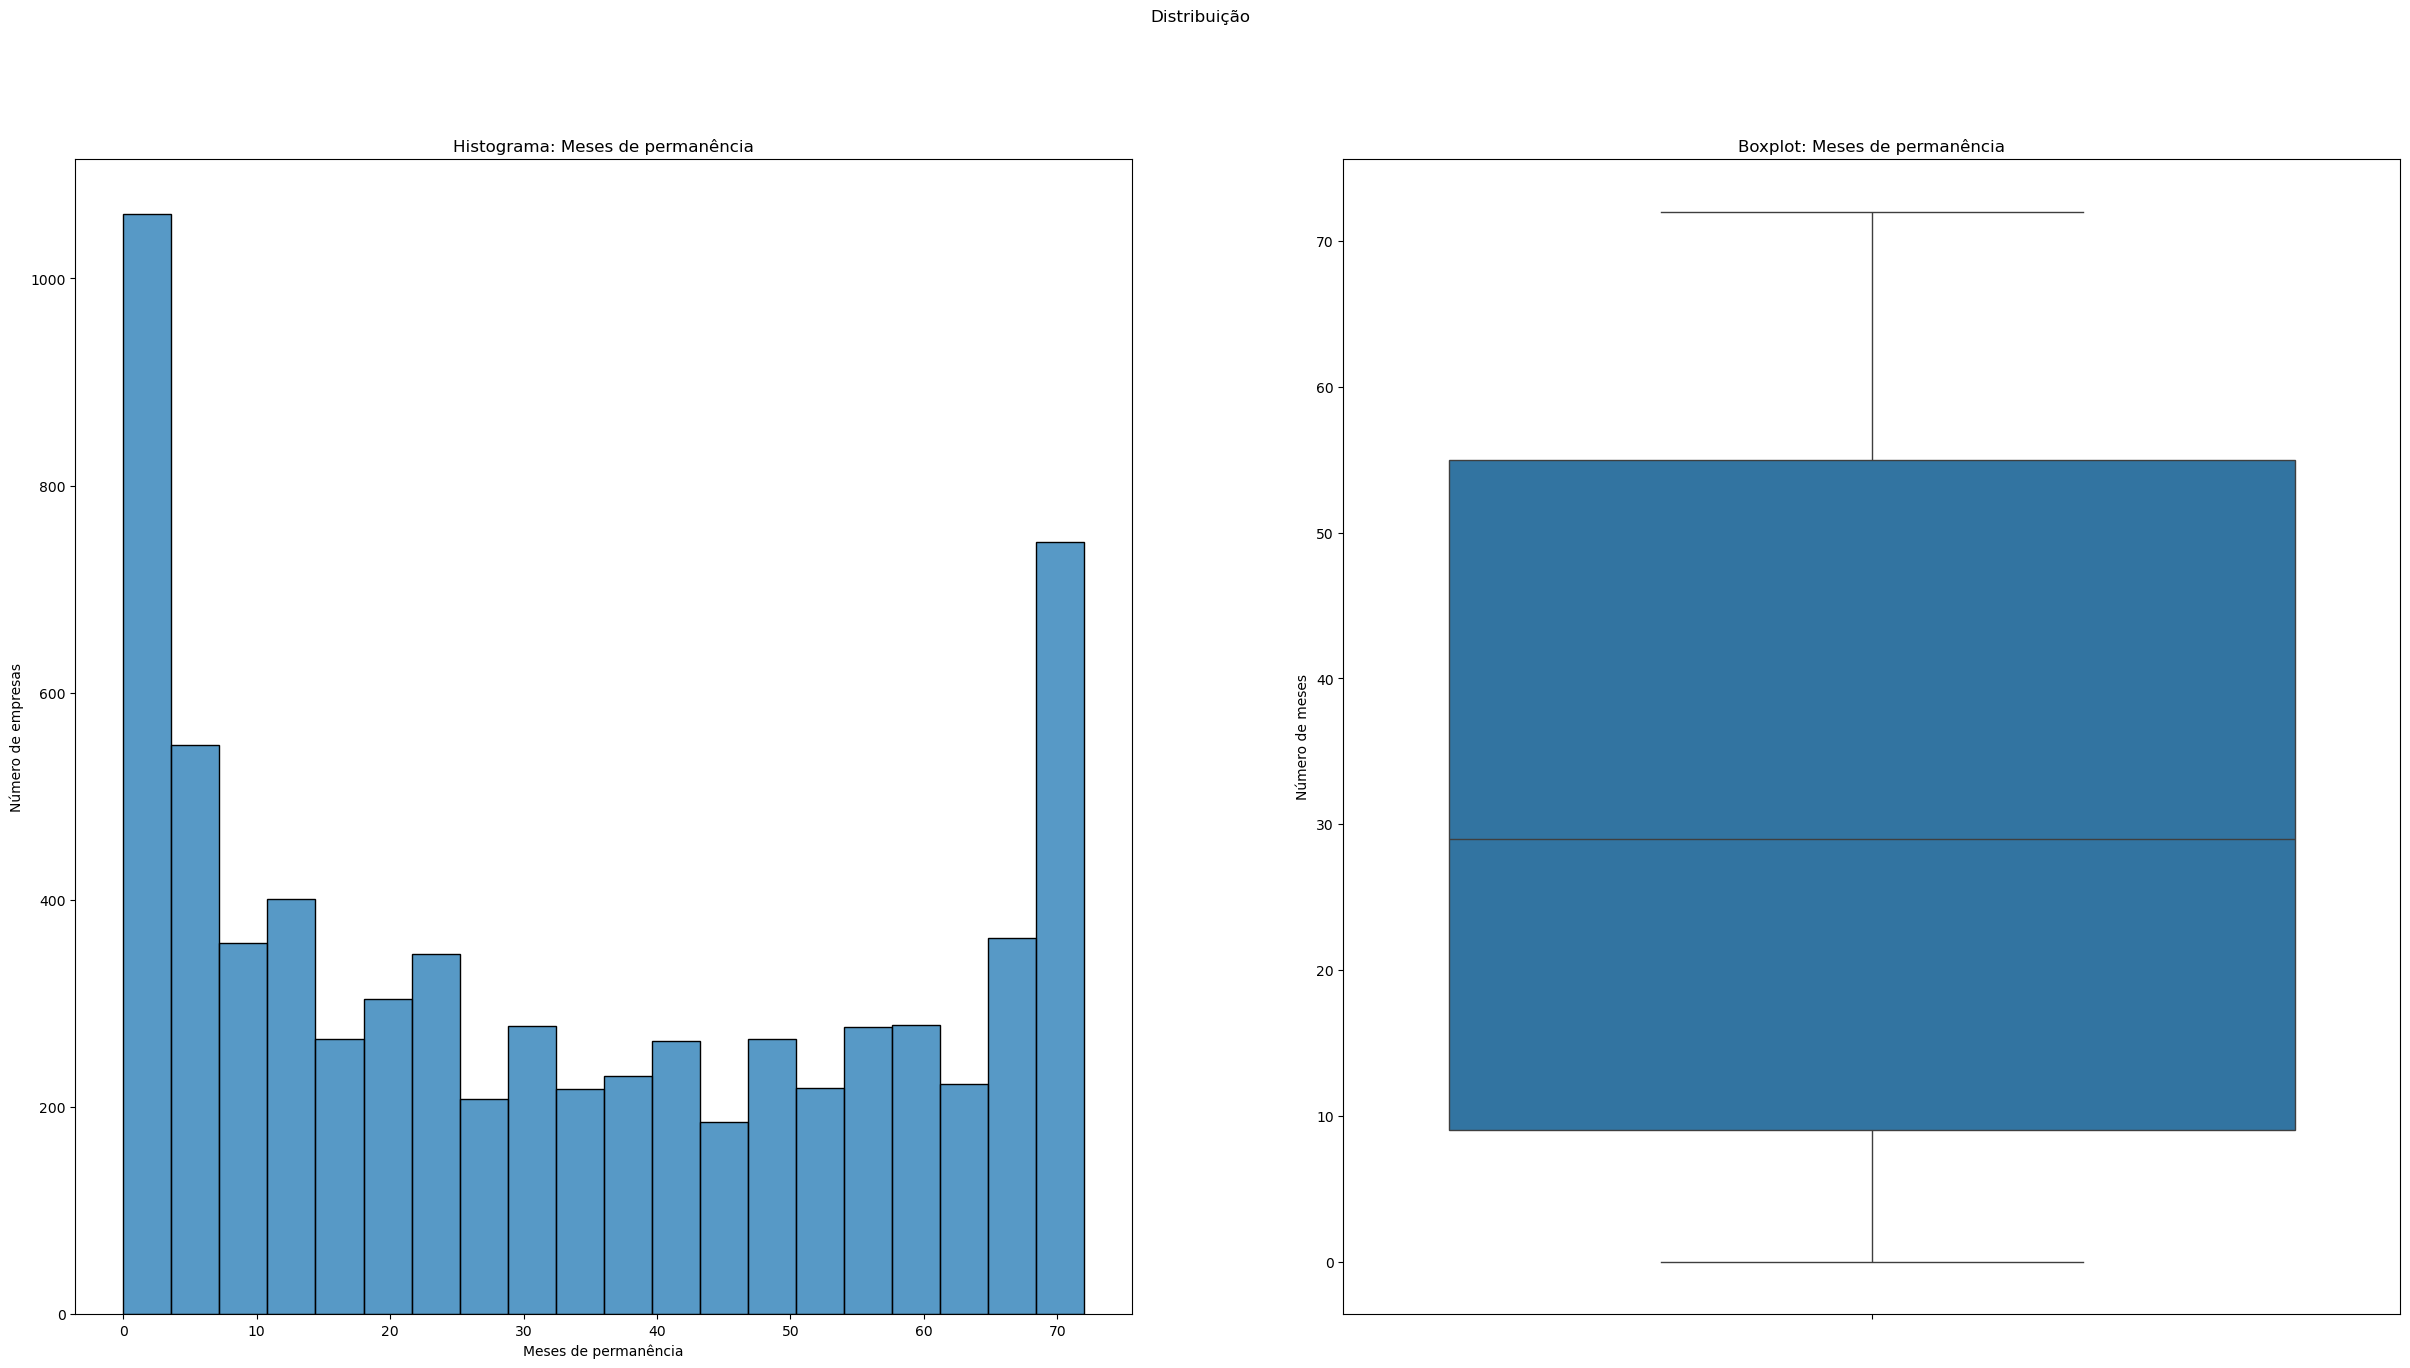

In [109]:
# Meses de permanência

fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Distribuição')

# Histograma
sns.histplot(ax=axes[0], data=df['meses_permanencia'], bins=20)
axes[0].set_title('Histograma: Meses de permanência')
axes[0].set_xlabel('Meses de permanência') 
axes[0].set_ylabel('Número de empresas') 


# Boxplot
sns.boxplot(data=df['meses_permanencia'])
axes[1].set_title('Boxplot: Meses de permanência')
axes[1].set_xlabel('') 
axes[1].set_ylabel('Número de meses');

In [86]:
print(f'Skew: {df['meses_permanencia'].skew():.2f} \nCurtose: {df['meses_permanencia'].kurtosis():.2f}')

Skew: 0.24 
Curtose: -1.39


As 25% empresas no limite inferior da distribuição dos dados possuem tempo de permanência entre 0 e 9 meses, enquanto as 25% no limite superior possuem tempo de permanência entre 55 e 72 meses. Em relação aos outros 50% das empresas, a distribuição é relativamente uniforme entre 10 e 54 meses.

A média de permanência é de ~32 meses e a mediana é de 29 meses (metade dos clientes sai antes de 2 anos e cinco meses e a outra metade fica mais tempo).

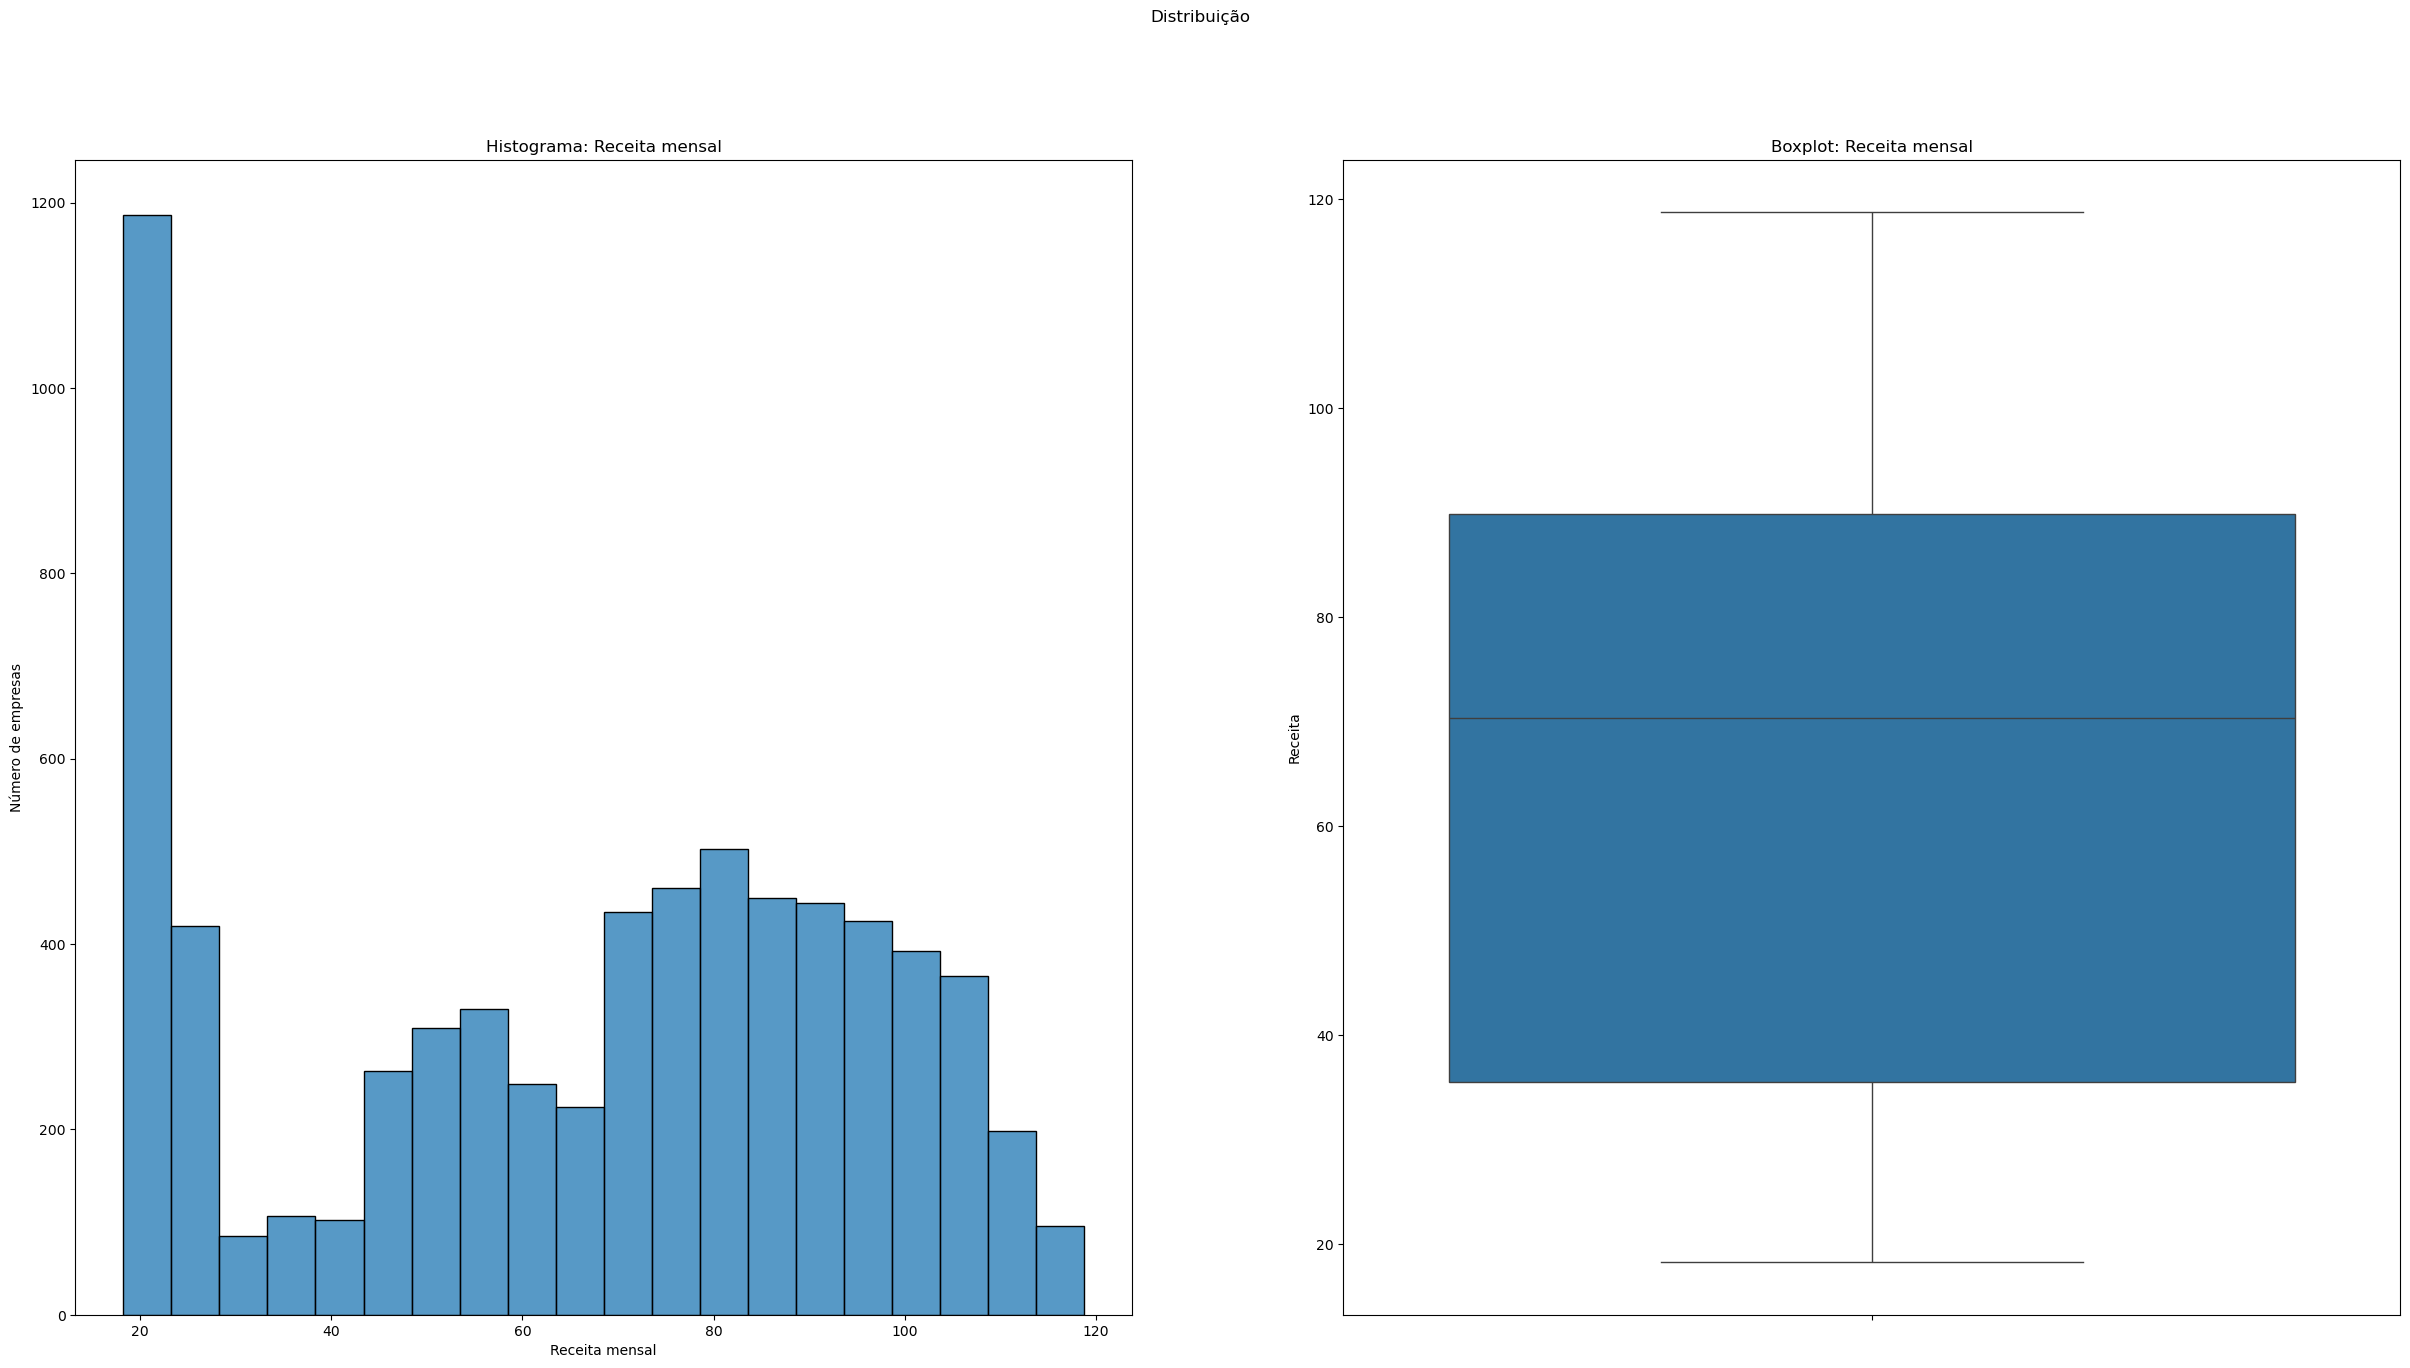

In [110]:
# Receita mensal

fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Distribuição')

# Histograma
sns.histplot(ax=axes[0], data=df['receita_mensal'], bins=20)
axes[0].set_title('Histograma: Receita mensal')
axes[0].set_xlabel('Receita mensal') 
axes[0].set_ylabel('Número de empresas') 

# Boxplot
sns.boxplot(data=df['receita_mensal'])
axes[1].set_title('Boxplot: Receita mensal')
axes[1].set_xlabel('') 
axes[1].set_ylabel('Receita');

In [88]:
print(f'Skew: {df['receita_mensal'].skew():.2f} \nCurtose: {df['receita_mensal'].kurtosis():.2f}')

Skew: -0.22 
Curtose: -1.26


No limite inferior, 25% dos clientes nos geram uma receita mensal entre 18.5 e 35.5. A mediana de receita é R$ 70,35.

Os valores de receita mensal obtidas pelos planos de assinatura do sistema são compatíveis com o nosso perfil de clientes (produtos voltados para micro e pequenas empresas).

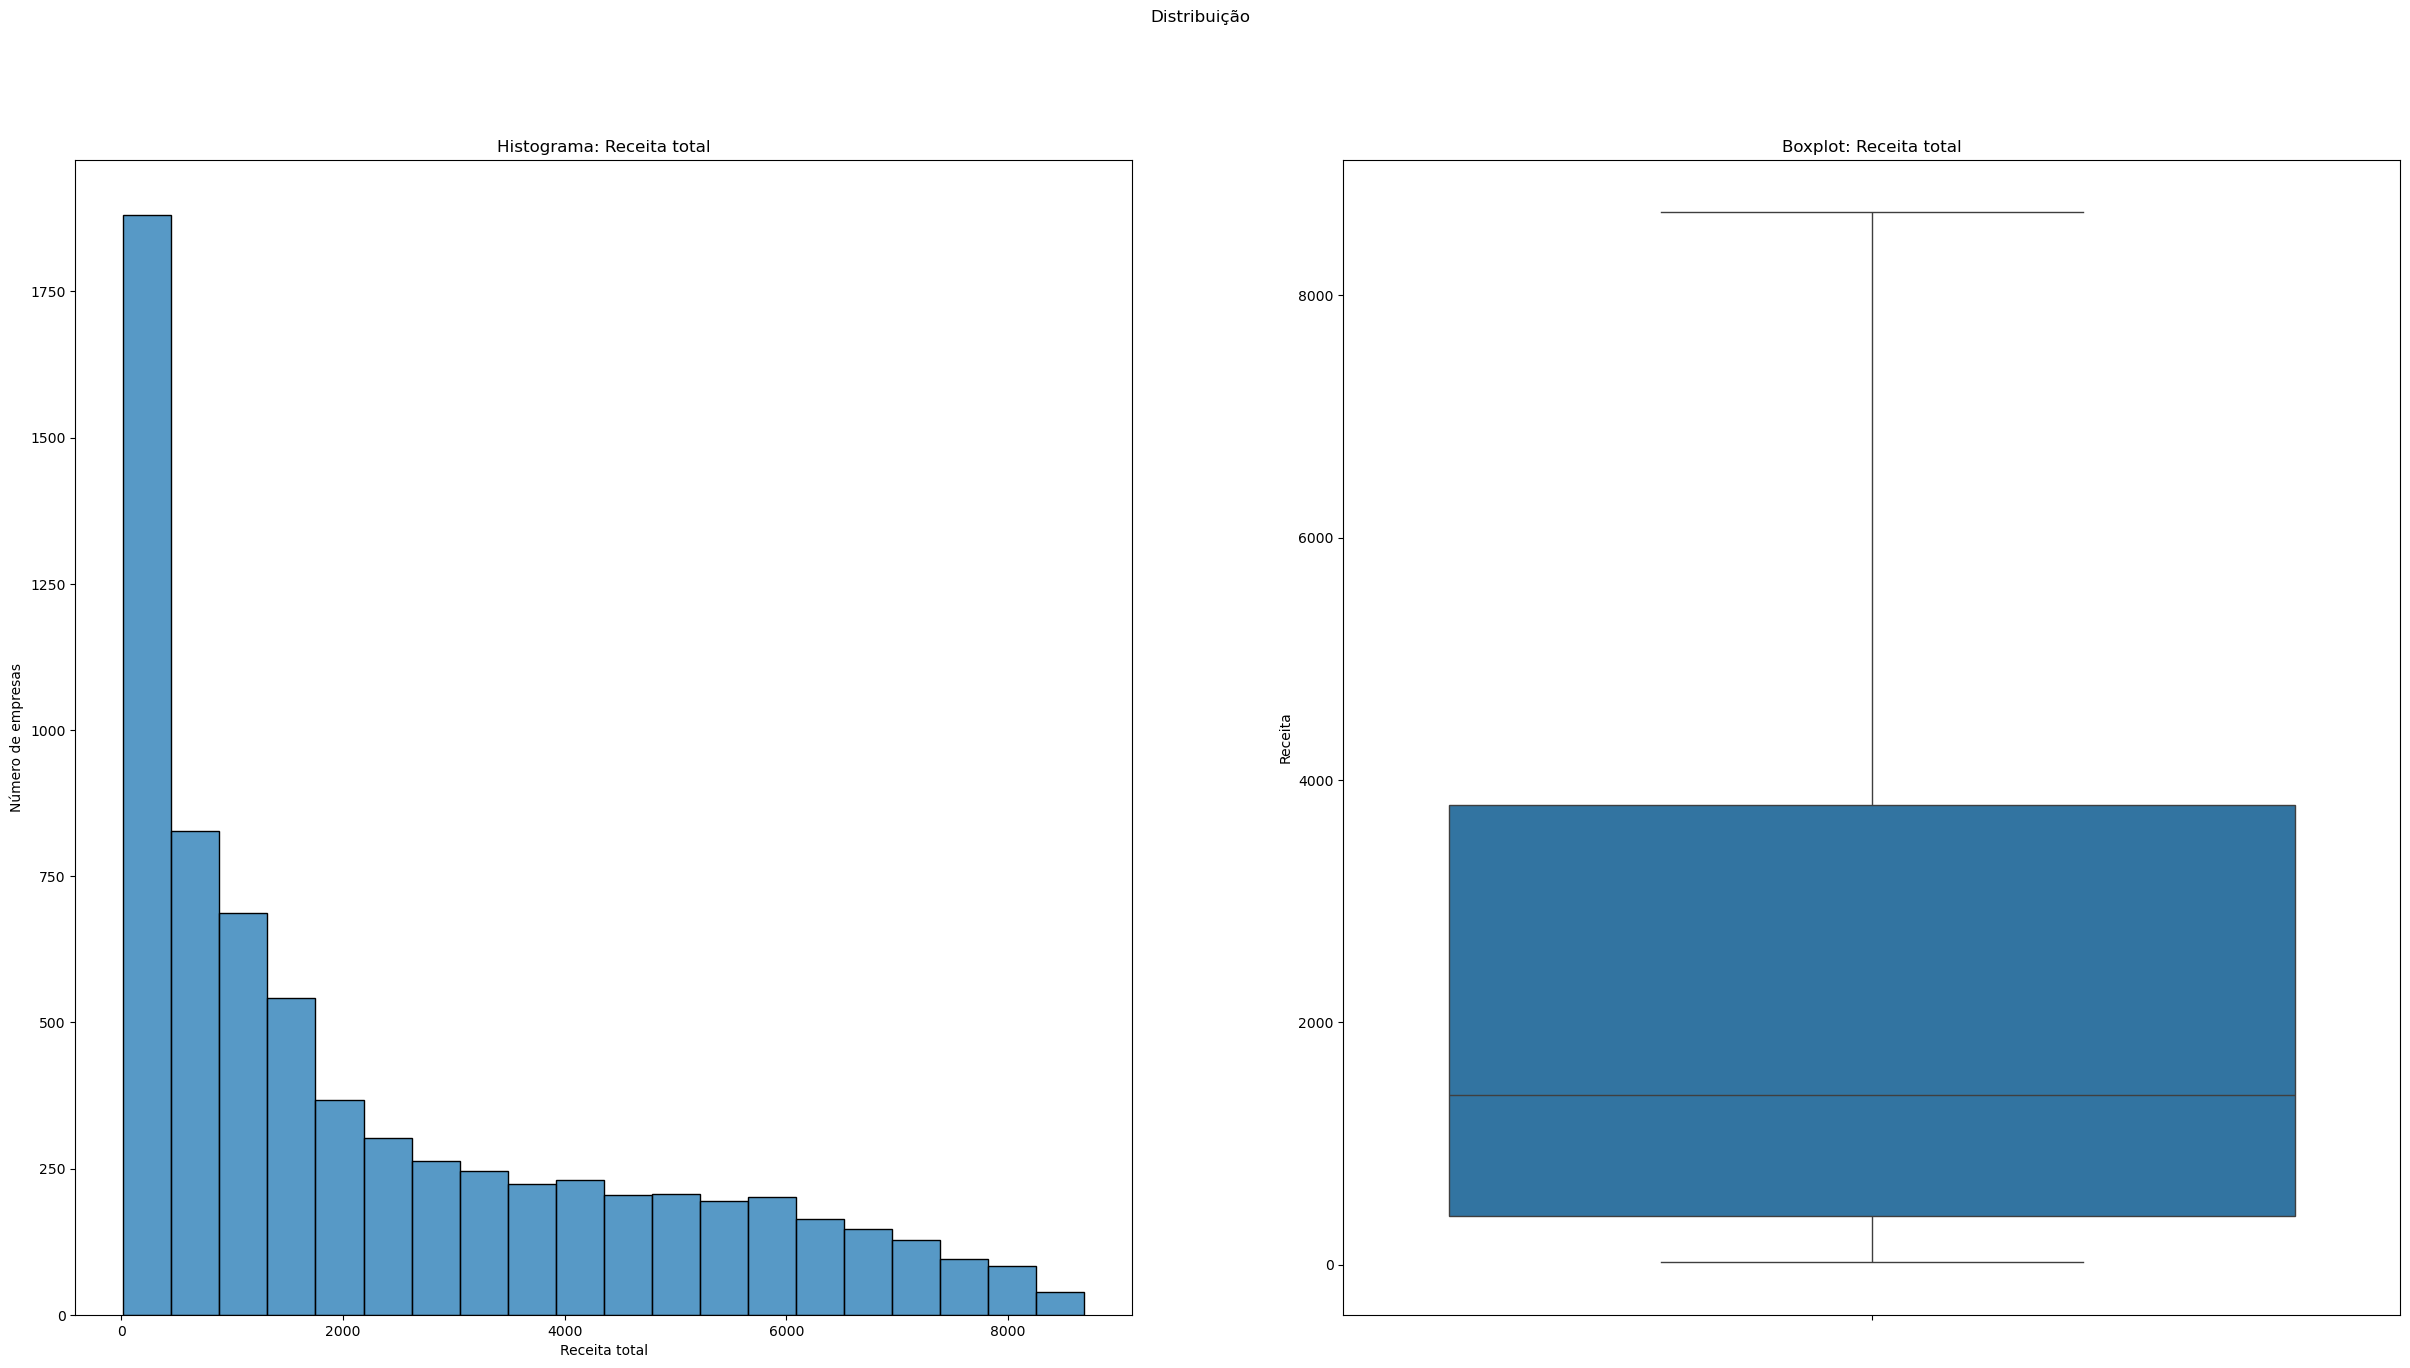

In [111]:
# Receita total

fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Distribuição')

# Histograma
sns.histplot(ax=axes[0], data=df['receita_total'], bins=20)
axes[0].set_title('Histograma: Receita total')
axes[0].set_xlabel('Receita total') 
axes[0].set_ylabel('Número de empresas') 

# Boxplot
sns.boxplot(data=df['receita_total'])
axes[1].set_title('Boxplot: Receita total')
axes[1].set_xlabel('') 
axes[1].set_ylabel('Receita');

In [90]:
print(f'Skew: {df['receita_total'].skew():.2f} \nCurtose: {df['receita_total'].kurtosis():.2f}')

Skew: 0.96 
Curtose: -0.23


A distribuição da receita total é assimétrica positiva. Há uma concentração maior de empresas nos menores valores de receita total gerada, reflexo de tempos de permanência e/ou e tickets médios menores. A cauda longa à direita indica poucos clientes com valor mais alto, sejam clientes muito antigos e/ou com ticket médio mais elevado. 

50% das empresas que utilizam nosso software geraram receita total de até R$ 1.394,55. A receita total mínima registrada foi de R$ 0 e a máxima de R$ 8.684,80.

In [59]:
freq_abs_rel(df['engajamento'])

,engajamento,count,proportion
0,1.00,1526,21.67
1,2.50,1118,15.87
2,2.33,1033,14.67
3,2.17,966,13.72
4,2.67,852,12.10
5,2.00,693,9.84
6,2.83,571,8.11
7,3.00,284,4.03


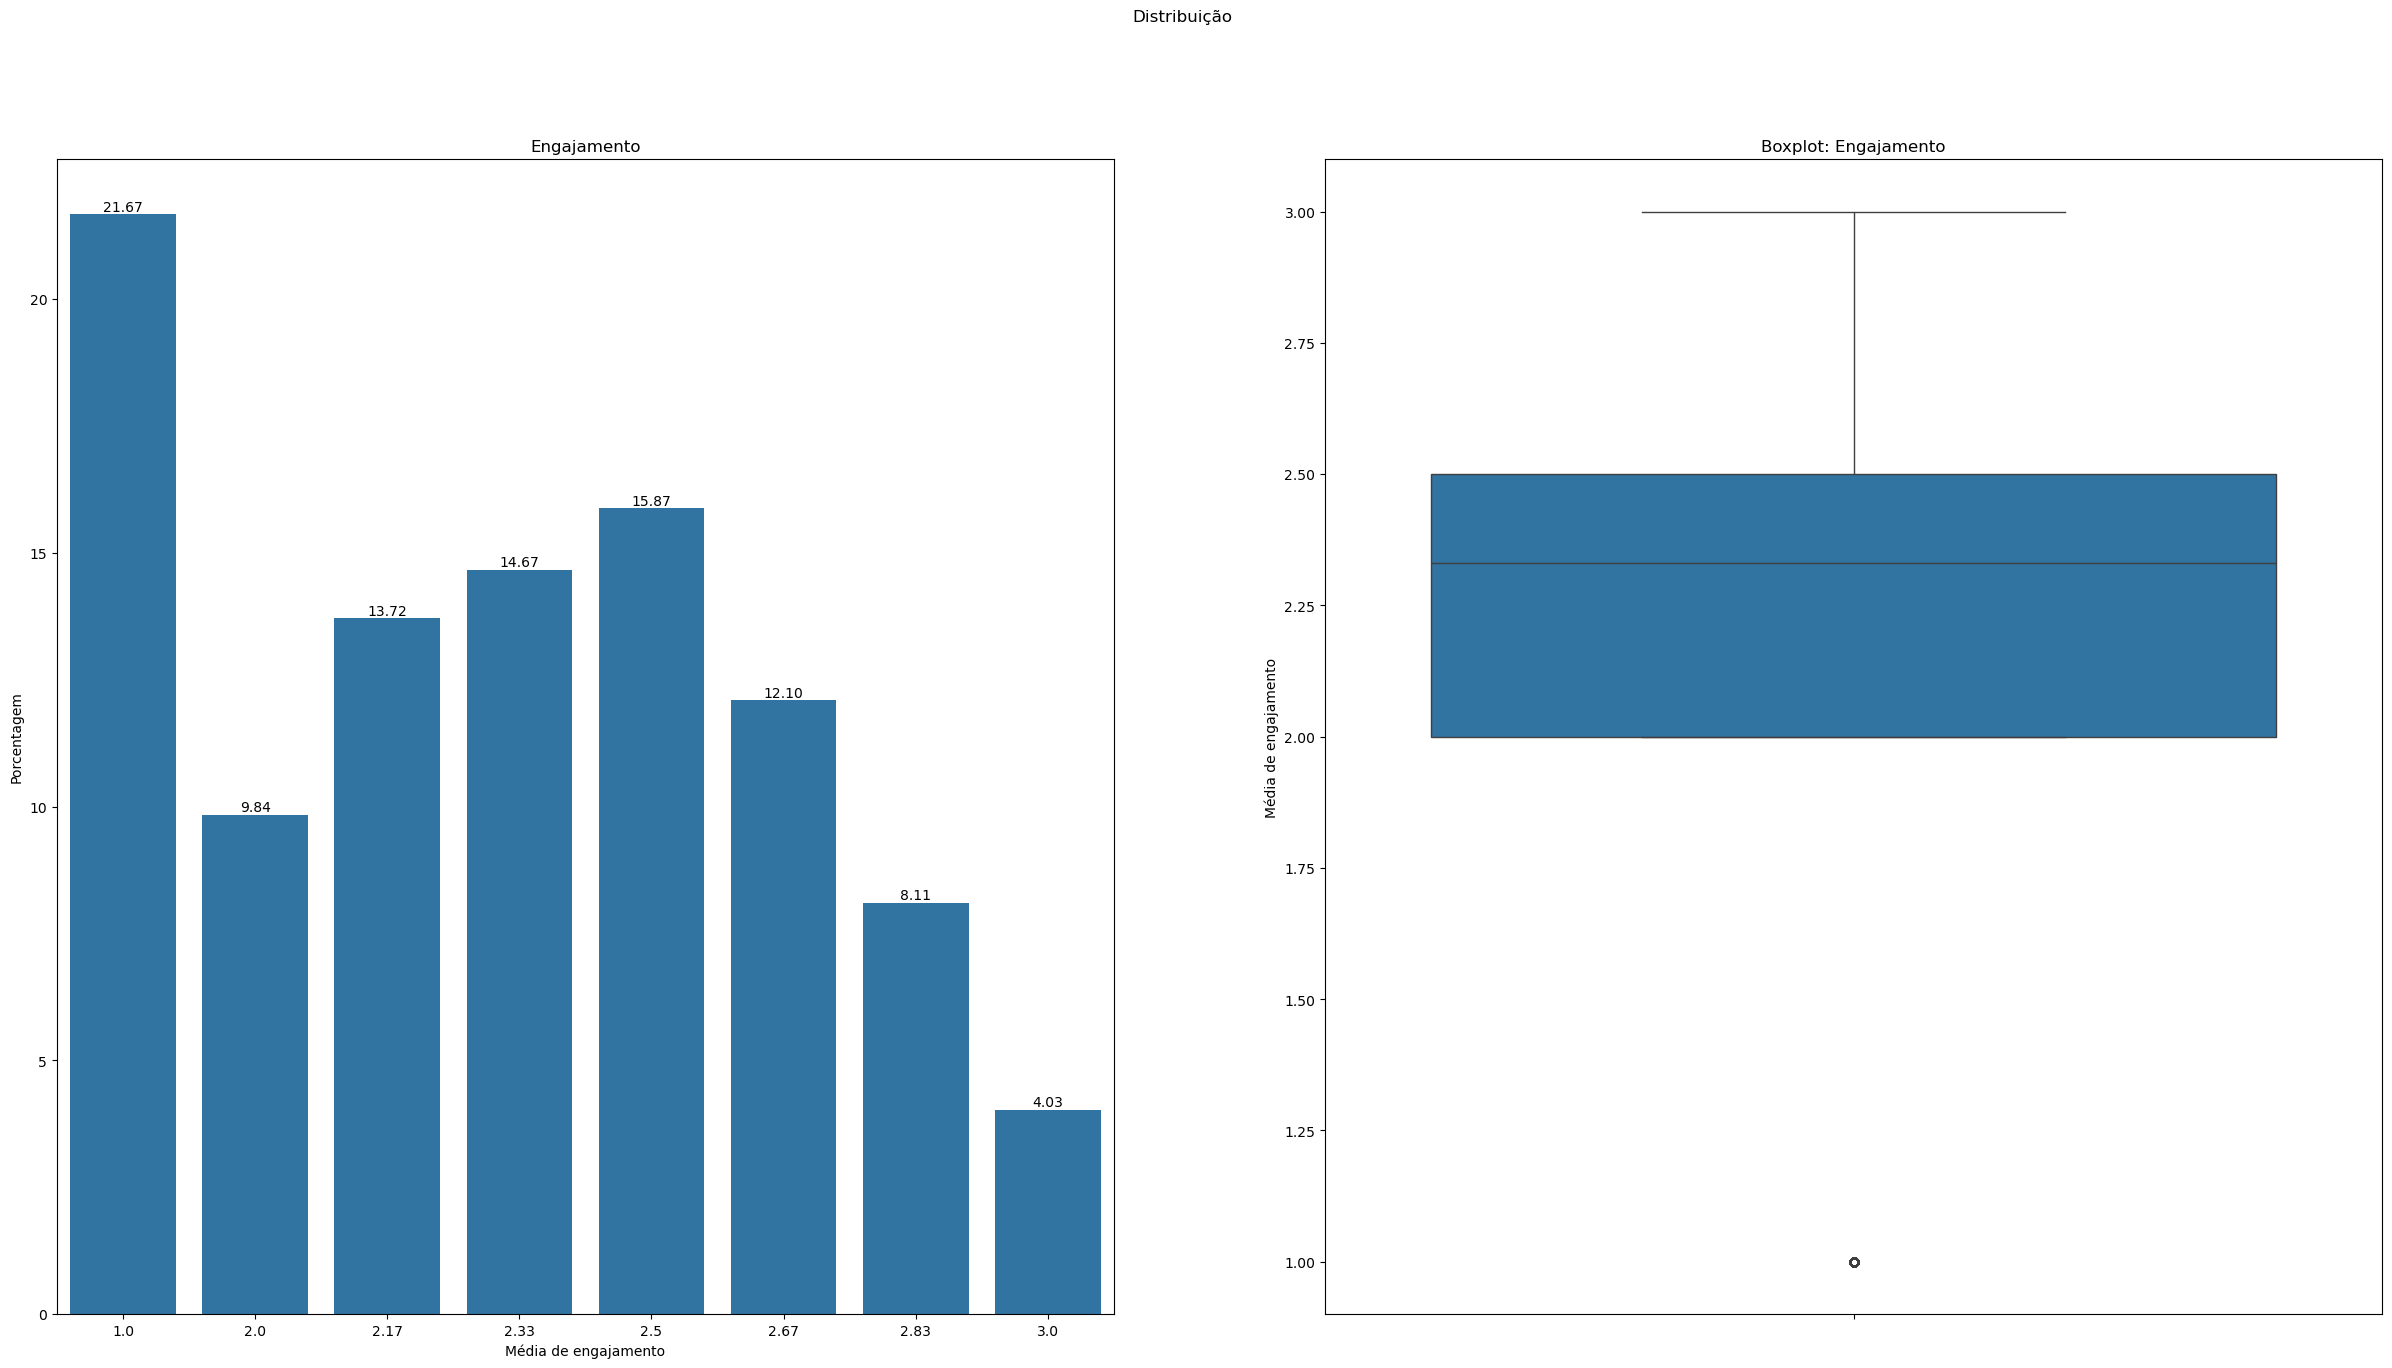

In [62]:
# Engajamento
fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Distribuição')

# Gráfico de barras
sns.countplot(ax=axes[0], data=df, x='engajamento', stat='percent')
axes[0].bar_label(container=axes[0].containers[0], fmt='%.2f')
axes[0].set_title('Engajamento')
axes[0].set_xlabel('Média de engajamento') 
axes[0].set_ylabel('Porcentagem') 

# Boxlot
sns.boxplot(data=df['engajamento'])
axes[1].set_title('Boxplot: Engajamento')
axes[1].set_xlabel('') 
axes[1].set_ylabel('Média de engajamento');

Médias menores correspondem a um engajamento mais baixo. 21,67% dos clientes possui média de engajamento 1, ou seja, registrou frequência de uso "nunca utilizou" para as seis funcionalidades do sistema analisadas.

50% dos clientes tem média de engajamento até 2,33. Os maiores valores de engajamento registrado foram 2,83 e 3,0.

#### Possíveis usos das variáveis

- Segmentação: 'tipo_empresa', 'fundacao_empresa', 'mais_de_um_socio', 'qtde_funcionarios', 'meses_permanencia', 'uso_servicos_financeiros', 'contador', 'conciliacao_bancaria', 'contrato', 'mes_churn'.

- Tem potencial de explicar o churn: 'frequencia_uso_modulo_financeiro', 'frequencia_uso_emissao_nota_fiscal', 'frequencia_uso_integracao_bancaria','frequencia_uso_modulo_vendas', 'frequencia_uso_relatorios', 'frequencia_uso_apis_integracao', 'uso_servicos_financeiros', 'contrato', 'emite_boletos', 'tipo_pagamento', 'receita_mensal', 'receita_total', 'engajamento'.

### Exploração multivariada

#### Análise temporal

In [92]:
# Quantidade de churn por mês
churn_mensal = df.loc[:, ['mes_churn', 'churn']].groupby('churn', as_index=False).value_counts(dropna=False, ascending=True)
churn_mensal

,churn,mes_churn,count
0,Não,NaN,5174
1,Sim,04/2025,911
2,Sim,05/2025,958


In [93]:
# Quanto cada mês representa do percentual de churn
df['mes_churn'].value_counts(normalize=True).to_frame().reset_index()

,mes_churn,proportion
0,05/2025,0.512574
1,04/2025,0.487426


In [94]:
# Variação do churn
print(f'A quantidade de churns aumentou em {100*(churn_mensal.loc[2, 'count'] - churn_mensal.loc[1, 'count'])/churn_mensal.loc[1, 'count']:.2f}% em 05/2025 em relação à 04/2025.')

A quantidade de churns aumentou em 5.16% em 05/2025 em relação à 04/2025.


In [95]:
# Taxa de churn (churn/total de clientes ativos)

print(f'A taxa de churn é {df[df['churn']=='Sim']['churn'].count()/df[df['churn']=='Não']['churn'].count():.2f}.')


A taxa de churn é 0.36.


In [96]:
# Taxa de churn por mês
print(f'Taxa de churn em 04/05: {churn_mensal.loc[1, 'count']/(churn_mensal.loc[0, 'count'] + churn_mensal.loc[2, 'count']):.4f}\nTaxa de churn em 05/2025: {churn_mensal.loc[2, 'count']/churn_mensal.loc[0, 'count']:.4f}.')

Taxa de churn em 04/05: 0.1486
Taxa de churn em 05/2025: 0.1852.


Houve um aumento da taxa de churn de abril para maio de 2025. No entanto, como os dados contém somente esses dois meses, não se pode afirmar que este aumento representa uma tendência no longo prazo.

In [97]:
# Variação da taxa de churn
taxa_abril = churn_mensal.loc[1, 'count']/(churn_mensal.loc[0, 'count'] + churn_mensal.loc[2, 'count'])
taxa_maio = churn_mensal.loc[2, 'count']/churn_mensal.loc[0, 'count']

variacao = 100*(taxa_maio - taxa_abril)/taxa_abril

print(f'A taxa de churn aumentou em {variacao:.2f}% de abril para maio de 2025.')

A taxa de churn aumentou em 24.63% de abril para maio de 2025.


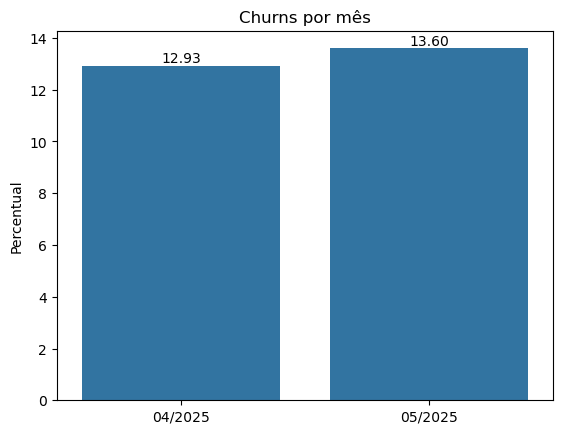

In [98]:
ax = sns.countplot(data=df, x='mes_churn', stat='percent')
ax.set_title('Churns por mês')
ax.bar_label(ax.containers[0], fmt='%.2f')
ax.set_xlabel('')
ax.set_ylabel('Percentual');

Os clientes que cancelaram em abril representam 12,93% da base e os que cancelaram em maio representam 13,60%.

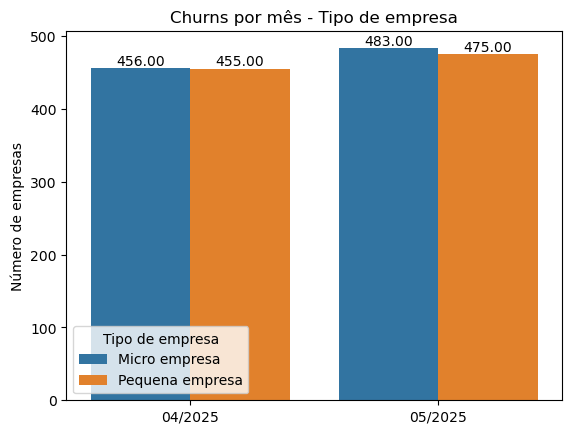

In [99]:
ax = mes_churn_vs_variable_barplot('tipo_empresa')
ax.set_title('Churns por mês - Tipo de empresa')
ax.set_xlabel('')
ax.set_ylabel('Número de empresas')
plt.legend(title='Tipo de empresa');

O número de micro e pequenas empresas que cancelaram aumentou de abril para maio de 2025.

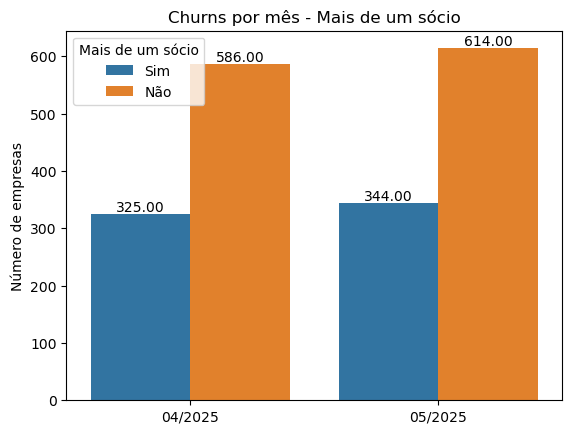

In [100]:
ax = mes_churn_vs_variable_barplot('mais_de_um_socio')
ax.set_title('Churns por mês - Mais de um sócio')
ax.set_xlabel('')
ax.set_ylabel('Número de empresas')
plt.legend(title='Mais de um sócio');

O número de empresas com um sócio e com mais de um sócio que cancelaram aumentou de abril para maio de 2025.

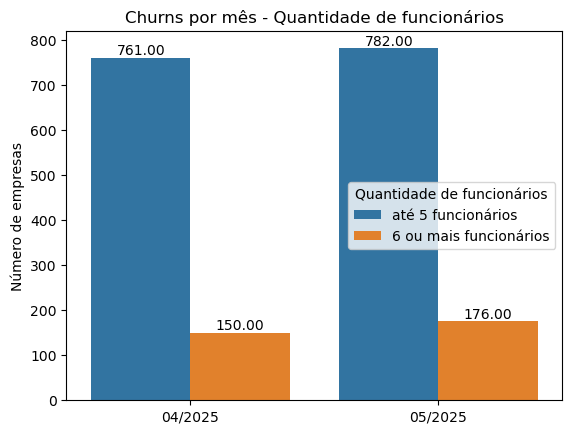

In [101]:
ax = mes_churn_vs_variable_barplot('qtde_funcionarios')
ax.set_title('Churns por mês - Quantidade de funcionários')
ax.set_xlabel('')
ax.set_ylabel('Número de empresas')
plt.legend(title='Quantidade de funcionários');

O número de empresas com até 5 funcionários e com 6 ou mais funcionários que cancelaram aumentou de abril para maio de 2025.

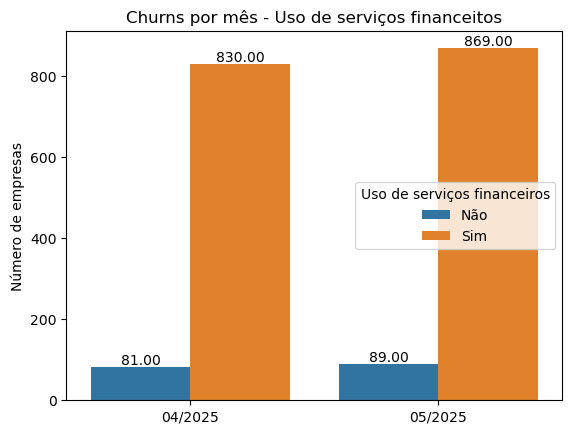

In [102]:
ax = mes_churn_vs_variable_barplot('uso_servicos_financeiros')
ax.set_title('Churns por mês - Uso de serviços financeitos')
ax.set_xlabel('')
ax.set_ylabel('Número de empresas')
plt.legend(title='Uso de serviços financeiros');

O número de empresas que usa e que não usa serviços financeiros que cancelaram aumentou de abril para maio de 2025.

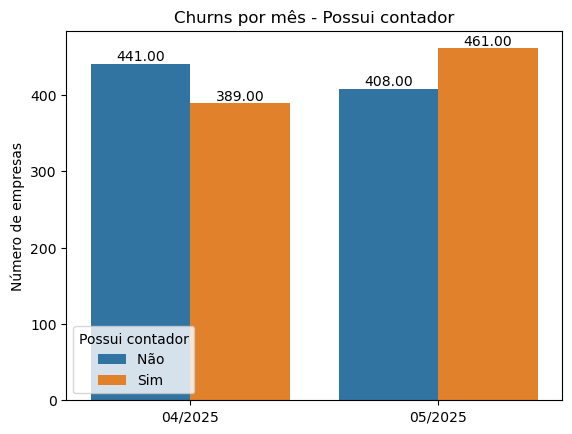

In [103]:
ax = mes_churn_vs_variable_barplot('contador')
ax.set_title('Churns por mês - Possui contador')
ax.set_xlabel('')
ax.set_ylabel('Número de empresas')
plt.legend(title='Possui contador');

O número de empresas que não possui contador e que cancelaram diminuiu de abril para maio de 2025. Já o número de empresas que têm contador e que cancelaram aumentou de abril para maio de 2025.

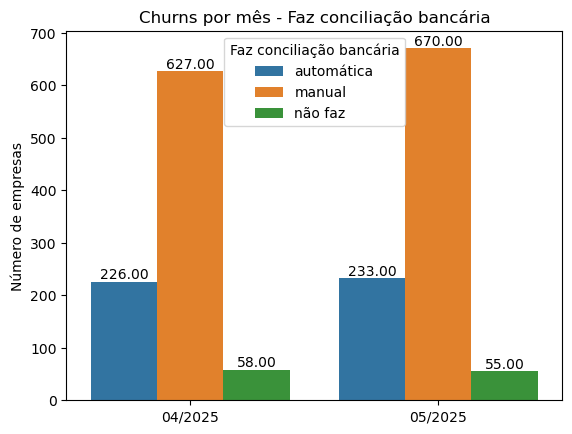

In [104]:
ax = mes_churn_vs_variable_barplot('conciliacao_bancaria')
ax.set_title('Churns por mês - Faz conciliação bancária')
ax.set_xlabel('')
ax.set_ylabel('Número de empresas')
plt.legend(title='Faz conciliação bancária');

O número de empreas que faz conciliação bancária automática e que faz manual que cancelaram aumentou de abril para maio de 2025. Já o número de empresas que não faz conciliação bancária que cancelaram diminuiu ligeiramente de abril para maio de 2025.

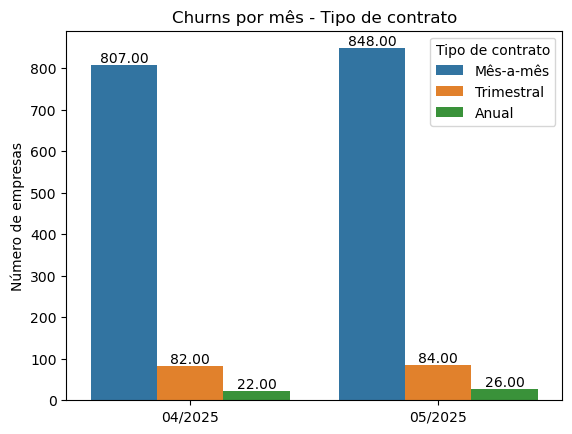

In [105]:
ax = mes_churn_vs_variable_barplot('contrato')
ax.set_title('Churns por mês - Tipo de contrato')
ax.set_xlabel('')
ax.set_ylabel('Número de empresas')
plt.legend(title='Tipo de contrato');

O número de empresas que possui contrato mês-a-mês, trimestral e anual e que cancelaram aumentou de abril para maio de 2025.

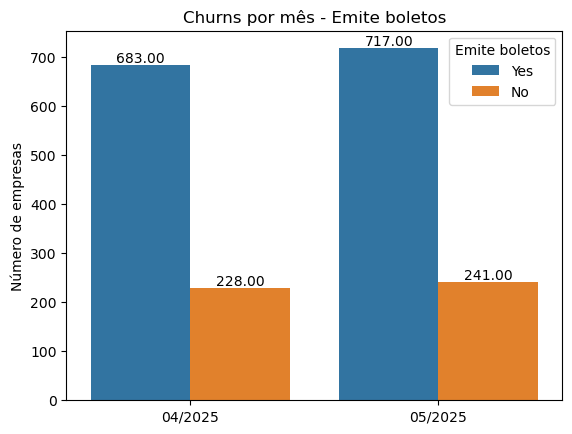

In [106]:
ax = mes_churn_vs_variable_barplot('emite_boletos')
ax.set_title('Churns por mês - Emite boletos')
ax.set_xlabel('')
ax.set_ylabel('Número de empresas')
plt.legend(title='Emite boletos');

O número de empresas que emite boleto e que não emite e cancelaram aumentou de abril para maio de 2025.

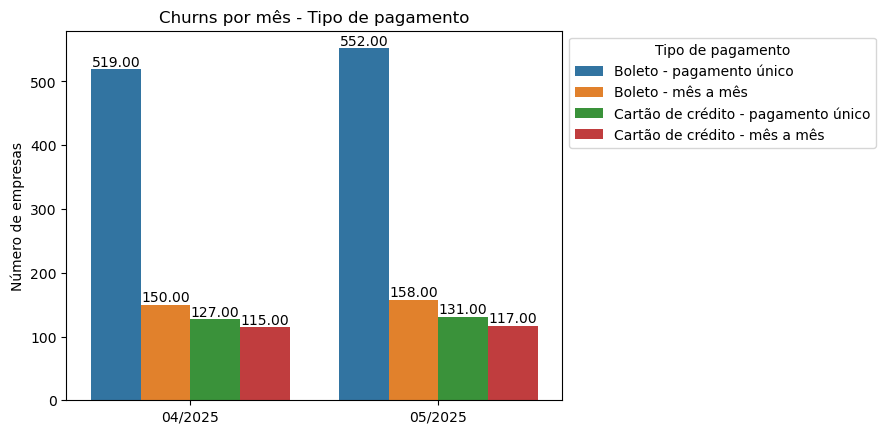

In [107]:
ax = mes_churn_vs_variable_barplot('tipo_pagamento')
ax.set_title('Churns por mês - Tipo de pagamento')
ax.set_xlabel('')
ax.set_ylabel('Número de empresas')
plt.legend(title='Tipo de pagamento')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1));

Para todos os tipo de pagamento, o número de empresas que cancelaram aumentou de abril para maio de 2025.

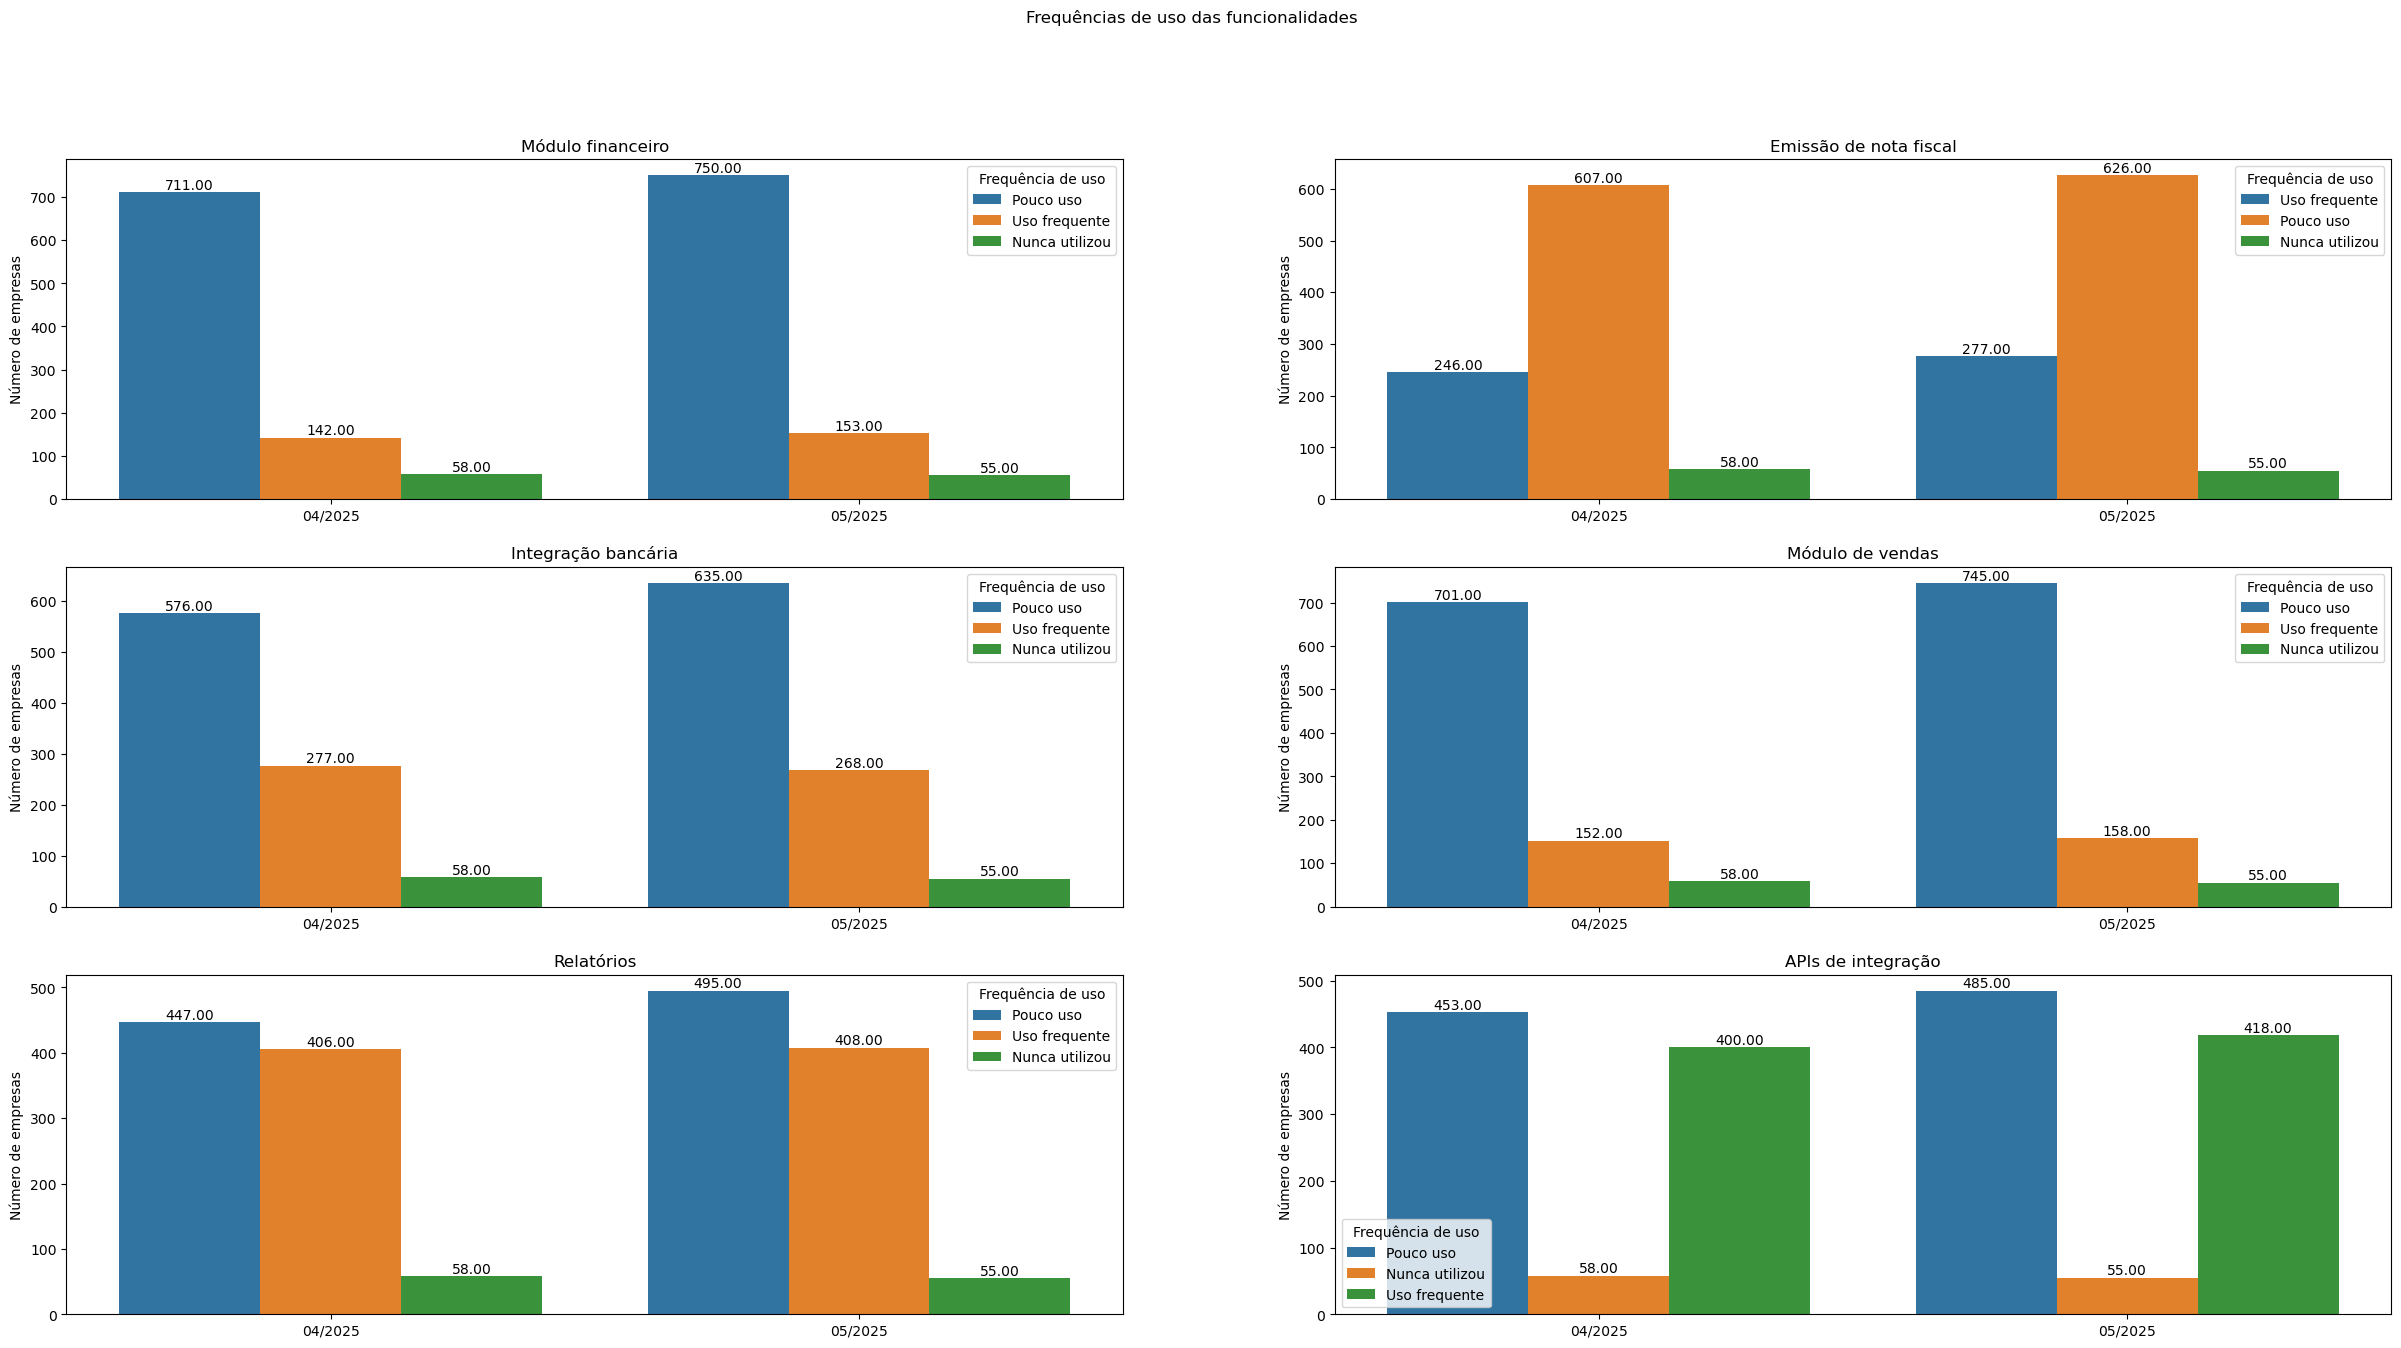

In [108]:
# Frequências de uso das funcionalidades do software
fig, axes = plt.subplots(3, 2, figsize=(30, 15))
fig.suptitle('Frequências de uso das funcionalidades')


mes_churn_vs_variable_barplot('frequencia_uso_modulo_financeiro', axes[0, 0])
axes[0, 0].set_title('Módulo financeiro')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Número de empresas')
axes[0, 0].legend(title='Frequência de uso')

mes_churn_vs_variable_barplot('frequencia_uso_emissao_nota_fiscal', axes[0, 1])
axes[0, 1].set_title('Emissão de nota fiscal')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Número de empresas')
axes[0, 1].legend(title='Frequência de uso')

mes_churn_vs_variable_barplot('frequencia_uso_integracao_bancaria', axes[1, 0])
axes[1, 0].set_title('Integração bancária')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Número de empresas')
axes[1, 0].legend(title='Frequência de uso')

mes_churn_vs_variable_barplot('frequencia_uso_modulo_vendas', axes[1, 1])
axes[1, 1].set_title('Módulo de vendas')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Número de empresas')
axes[1, 1].legend(title='Frequência de uso')

mes_churn_vs_variable_barplot('frequencia_uso_relatorios', axes[2, 0])
axes[2, 0].set_title('Relatórios')
axes[2, 0].set_xlabel('')
axes[2, 0].set_ylabel('Número de empresas')
axes[2, 0].legend(title='Frequência de uso')

mes_churn_vs_variable_barplot('frequencia_uso_apis_integracao', axes[2, 1]);
axes[2, 1].set_title('APIs de integração')
axes[2, 1].set_xlabel('')
axes[2, 1].set_ylabel('Número de empresas')
axes[2, 1].legend(title='Frequência de uso');

Em relação às frequências de uso das funcionalidades do sistema, a quantidade de empresas que faziam uso frequente ou pouco uso e que cancelaram aumentou de abril para maio de 2025. Em relação às empresas que nunca utilizaram as funcionalidades e cancelaram, o número diminuiu ligeiramente de abril para maio de 2025.

In [63]:
df.loc[:, ['mes_churn', 'fundacao_empresa', 'meses_permanencia', 'receita_mensal', 'receita_total', 'engajamento']].groupby('mes_churn', as_index=False).describe().transpose()

0            1
mes_churn                    04/2025      05/2025
fundacao_empresa  count        911.0        958.0
                  mean   2015.583974  2015.722338
                  std       5.432435     5.472849
                  min         2001.0       2001.0
                  25%         2015.0       2015.0
                  50%         2017.0       2017.5
                  75%         2019.0       2019.0
                  max         2021.0       2021.0
meses_permanencia count        911.0        958.0
                  mean     17.756312    18.191023
                  std      19.796101    19.283727
                  min            1.0          1.0
                  25%            2.0          2.0
                  50%            9.0         10.0
                  75%           27.0         30.0
                  max           72.0         72.0
receita_mensal    count        911.0        958.0
                  mean     74.247475    74.625678
                  std      24.440891    24.889639
                  min          18.85         19.0
                  25%          55.95      57.7875
                  50%          79.35        79.95
                  75%           93.9        94.45
                  max         118.35       117.45
receita_total     count        911.0        958.0
                  mean   1511.390615   1551.20047
                  std    1912.164543  1871.095537
                  min          18.85         19.1
                  25%        131.625     138.5625
                  50%         620.55        777.7
                  75%         2269.8    2364.3875
                  max         8684.8       8109.8
engajamento       count        911.0        958.0
                  mean      2.233655     2.235501
                  std        0.39814     0.388784
                  min            1.0          1.0
                  25%           2.17          2.0
                  50%           2.33         2.33
                  75%            2.5          2.5
                  max            3.0          3.0

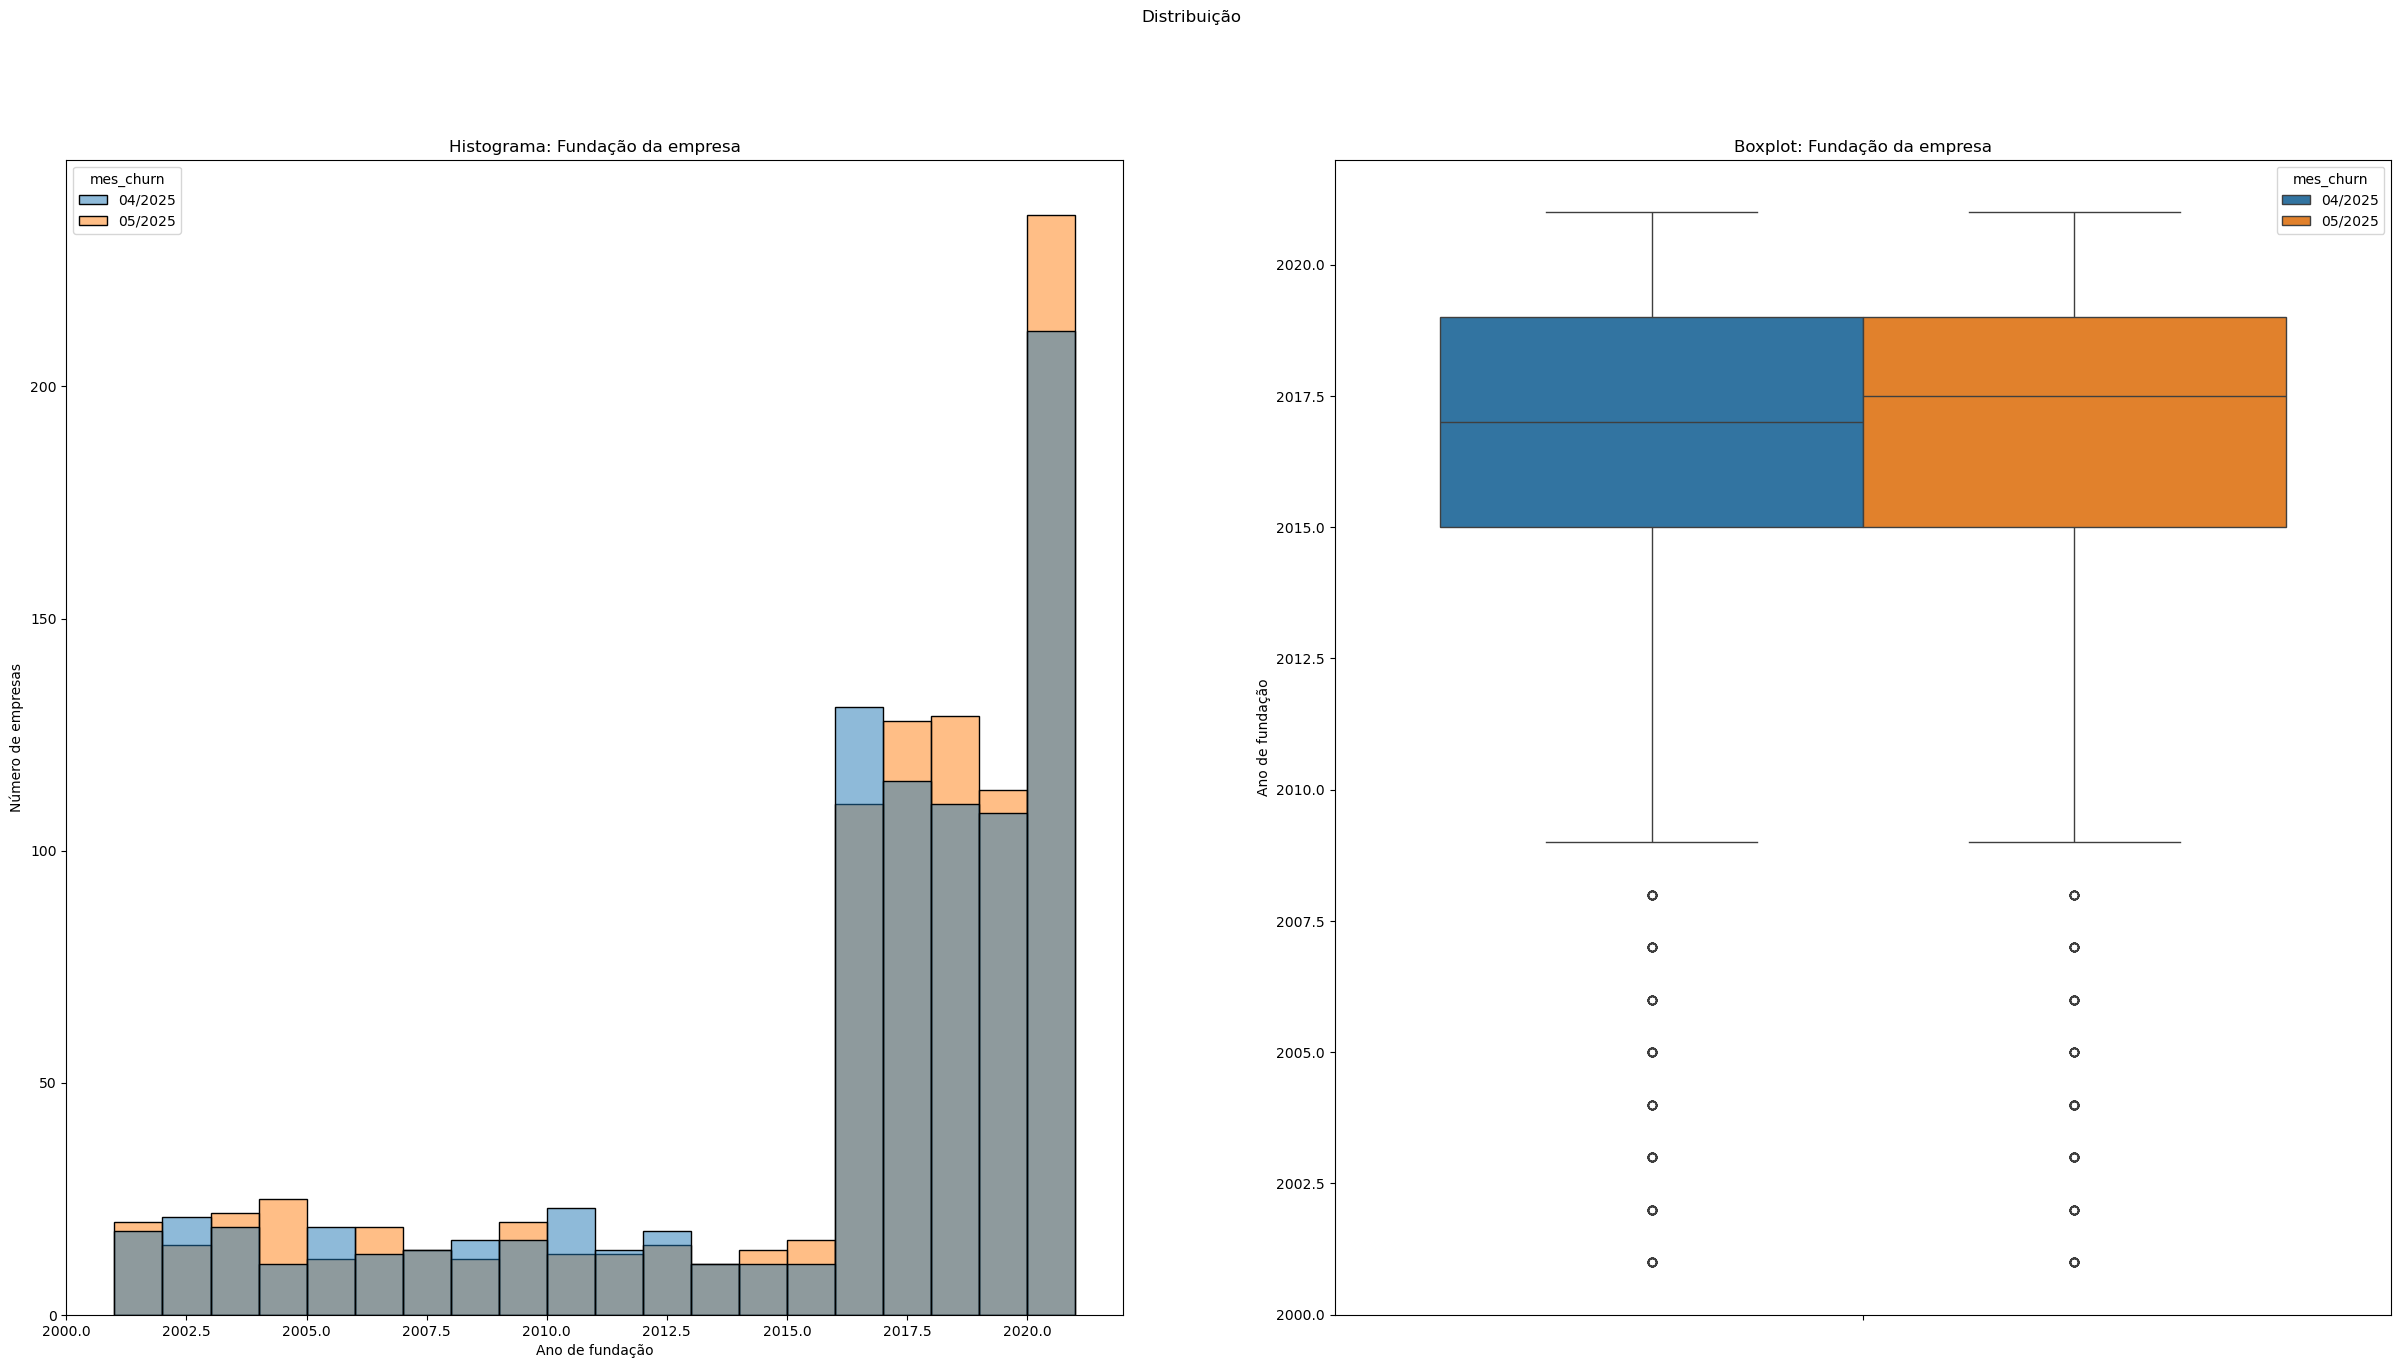

In [113]:
# Ano de fundação da empresa
fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Distribuição')

# Histograma
sns.histplot(ax=axes[0], data=df, x='fundacao_empresa', hue='mes_churn', bins=20)
axes[0].set_title('Histograma: Fundação da empresa')
axes[0].set_xlabel('Ano de fundação') 
axes[0].set_ylabel('Número de empresas')

# Boxplot
sns.boxplot(data=df, y='fundacao_empresa', hue='mes_churn')
axes[1].set_title('Boxplot: Fundação da empresa')
axes[1].set_xlabel('') 
axes[1].set_ylabel('Ano de fundação');

O número de empresas fundadas a partir de 2017 e que cancelaram aumentou de abril para maio de 2025. O ano de fundação mediano dos churns é maior em maio que em abril de 2025.

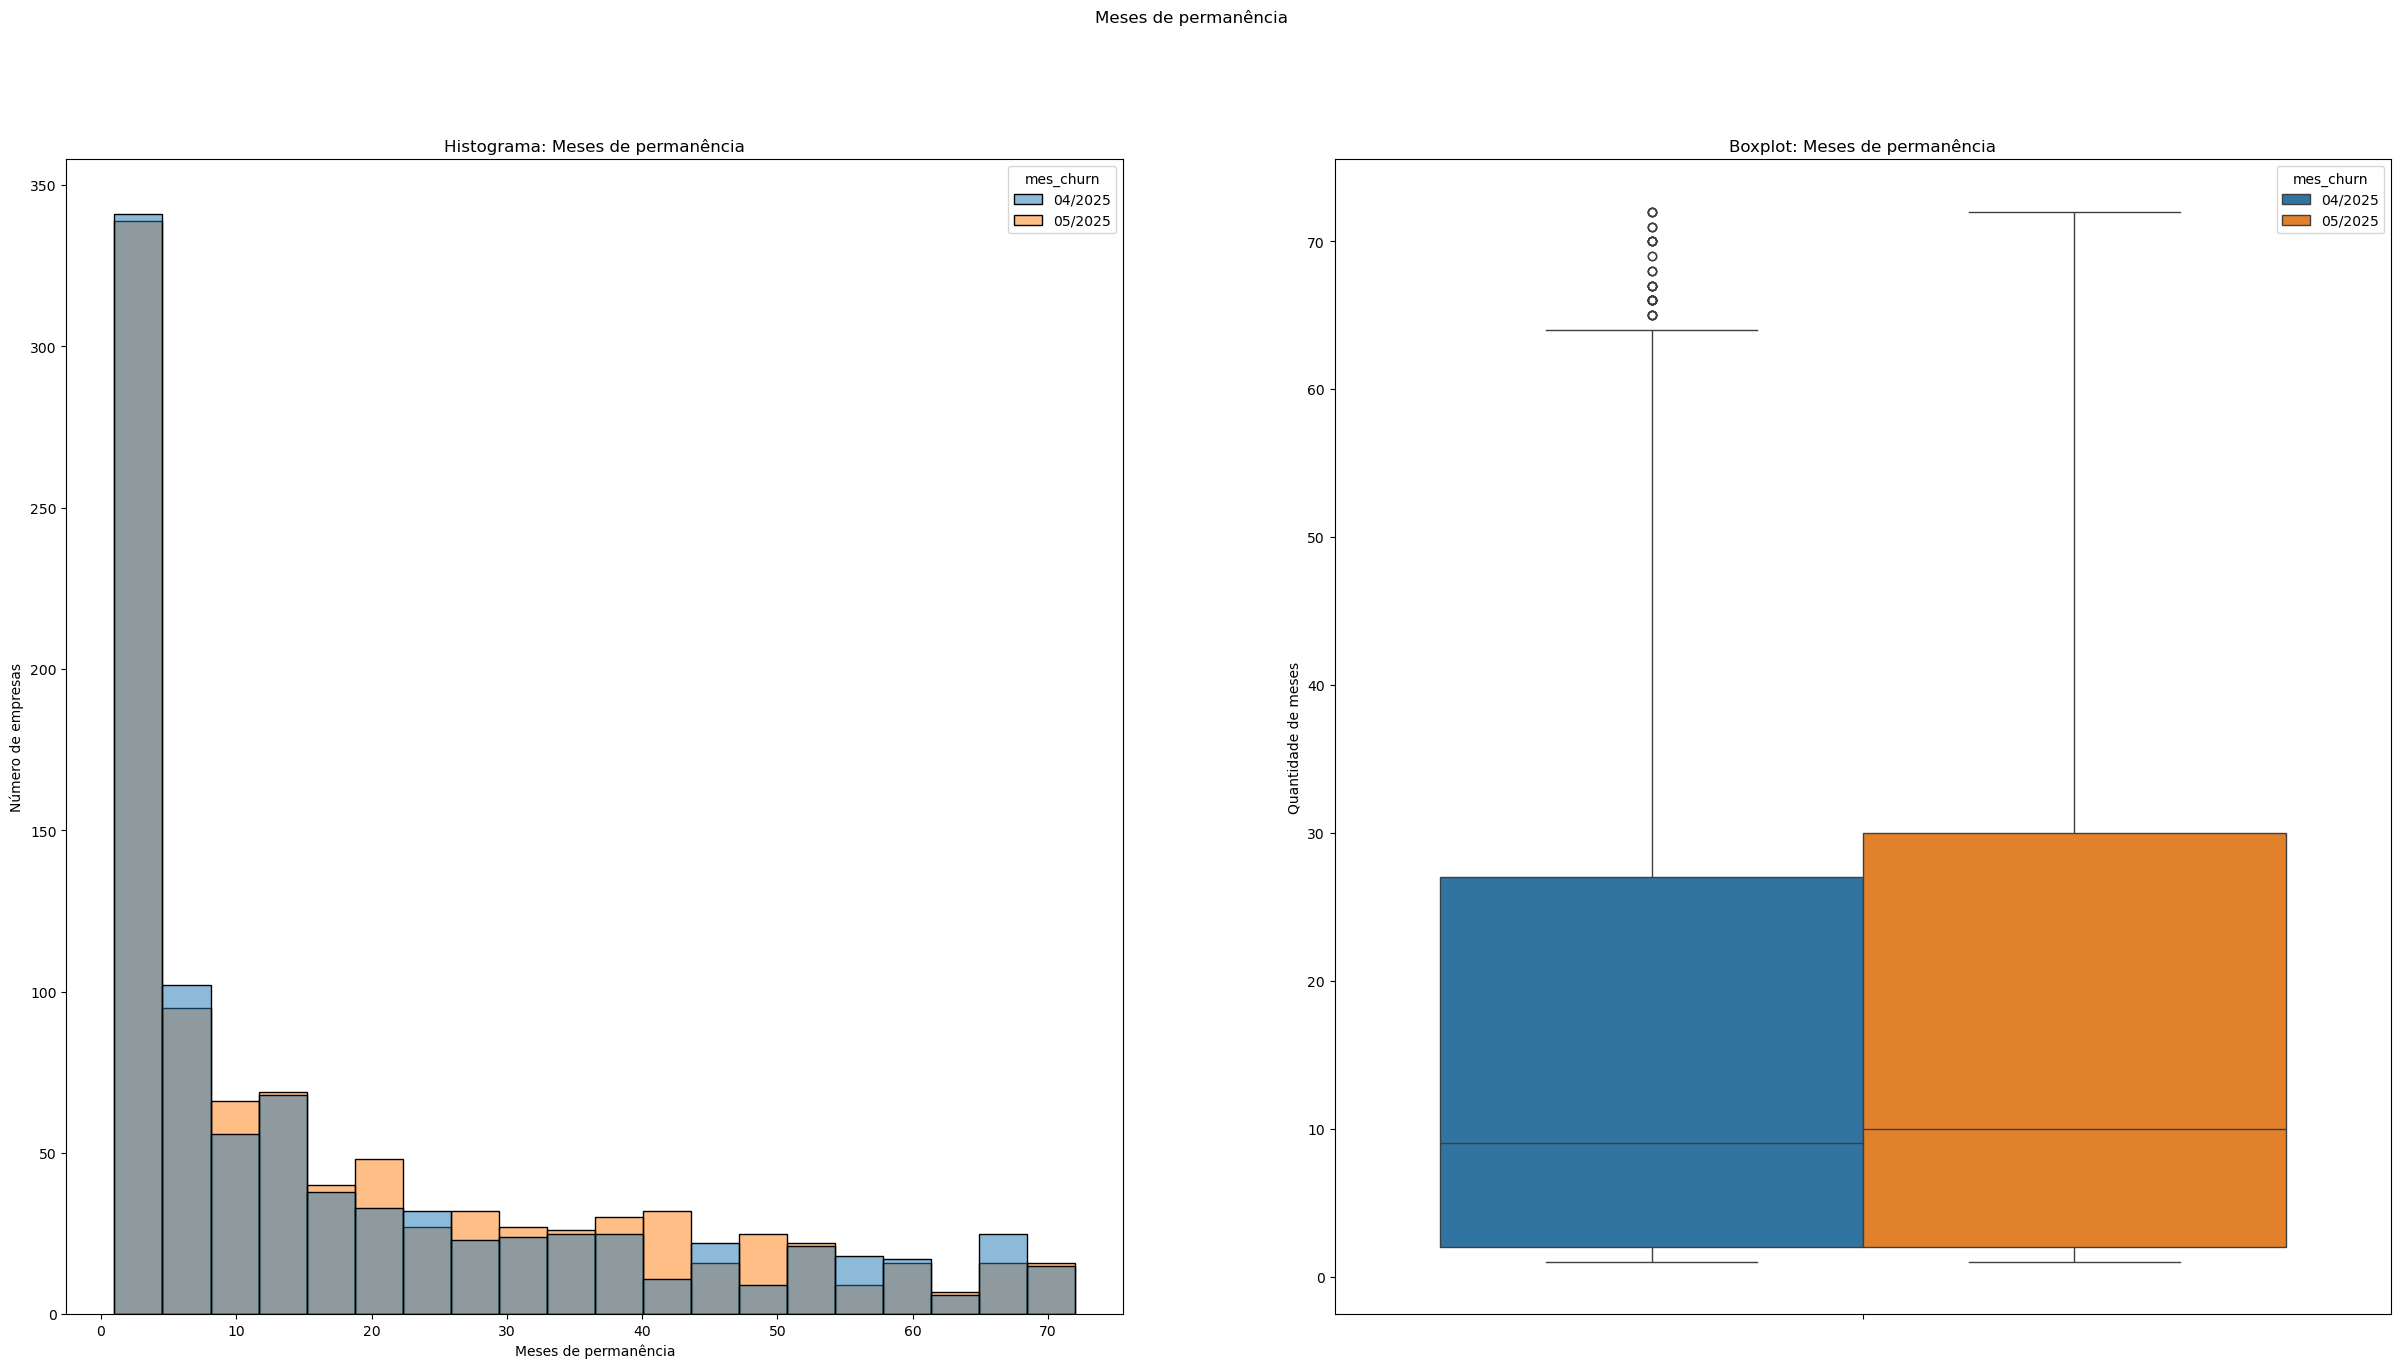

In [114]:
# Meses de permanência
fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Meses de permanência')

# Histograma
sns.histplot(ax=axes[0], data=df, x='meses_permanencia', hue='mes_churn', bins=20)
axes[0].set_title('Histograma: Meses de permanência')
axes[0].set_xlabel('Meses de permanência') 
axes[0].set_ylabel('Número de empresas')

# Boxplot
sns.boxplot(data=df, y='meses_permanencia', hue='mes_churn')
axes[1].set_title('Boxplot: Meses de permanência')
axes[1].set_xlabel('') 
axes[1].set_ylabel('Quantidade de meses');

A mediana do tempo de permanência para os churns em abril de 2025 era de 9 meses, enquanto em maio de 2025 é de 10 meses.

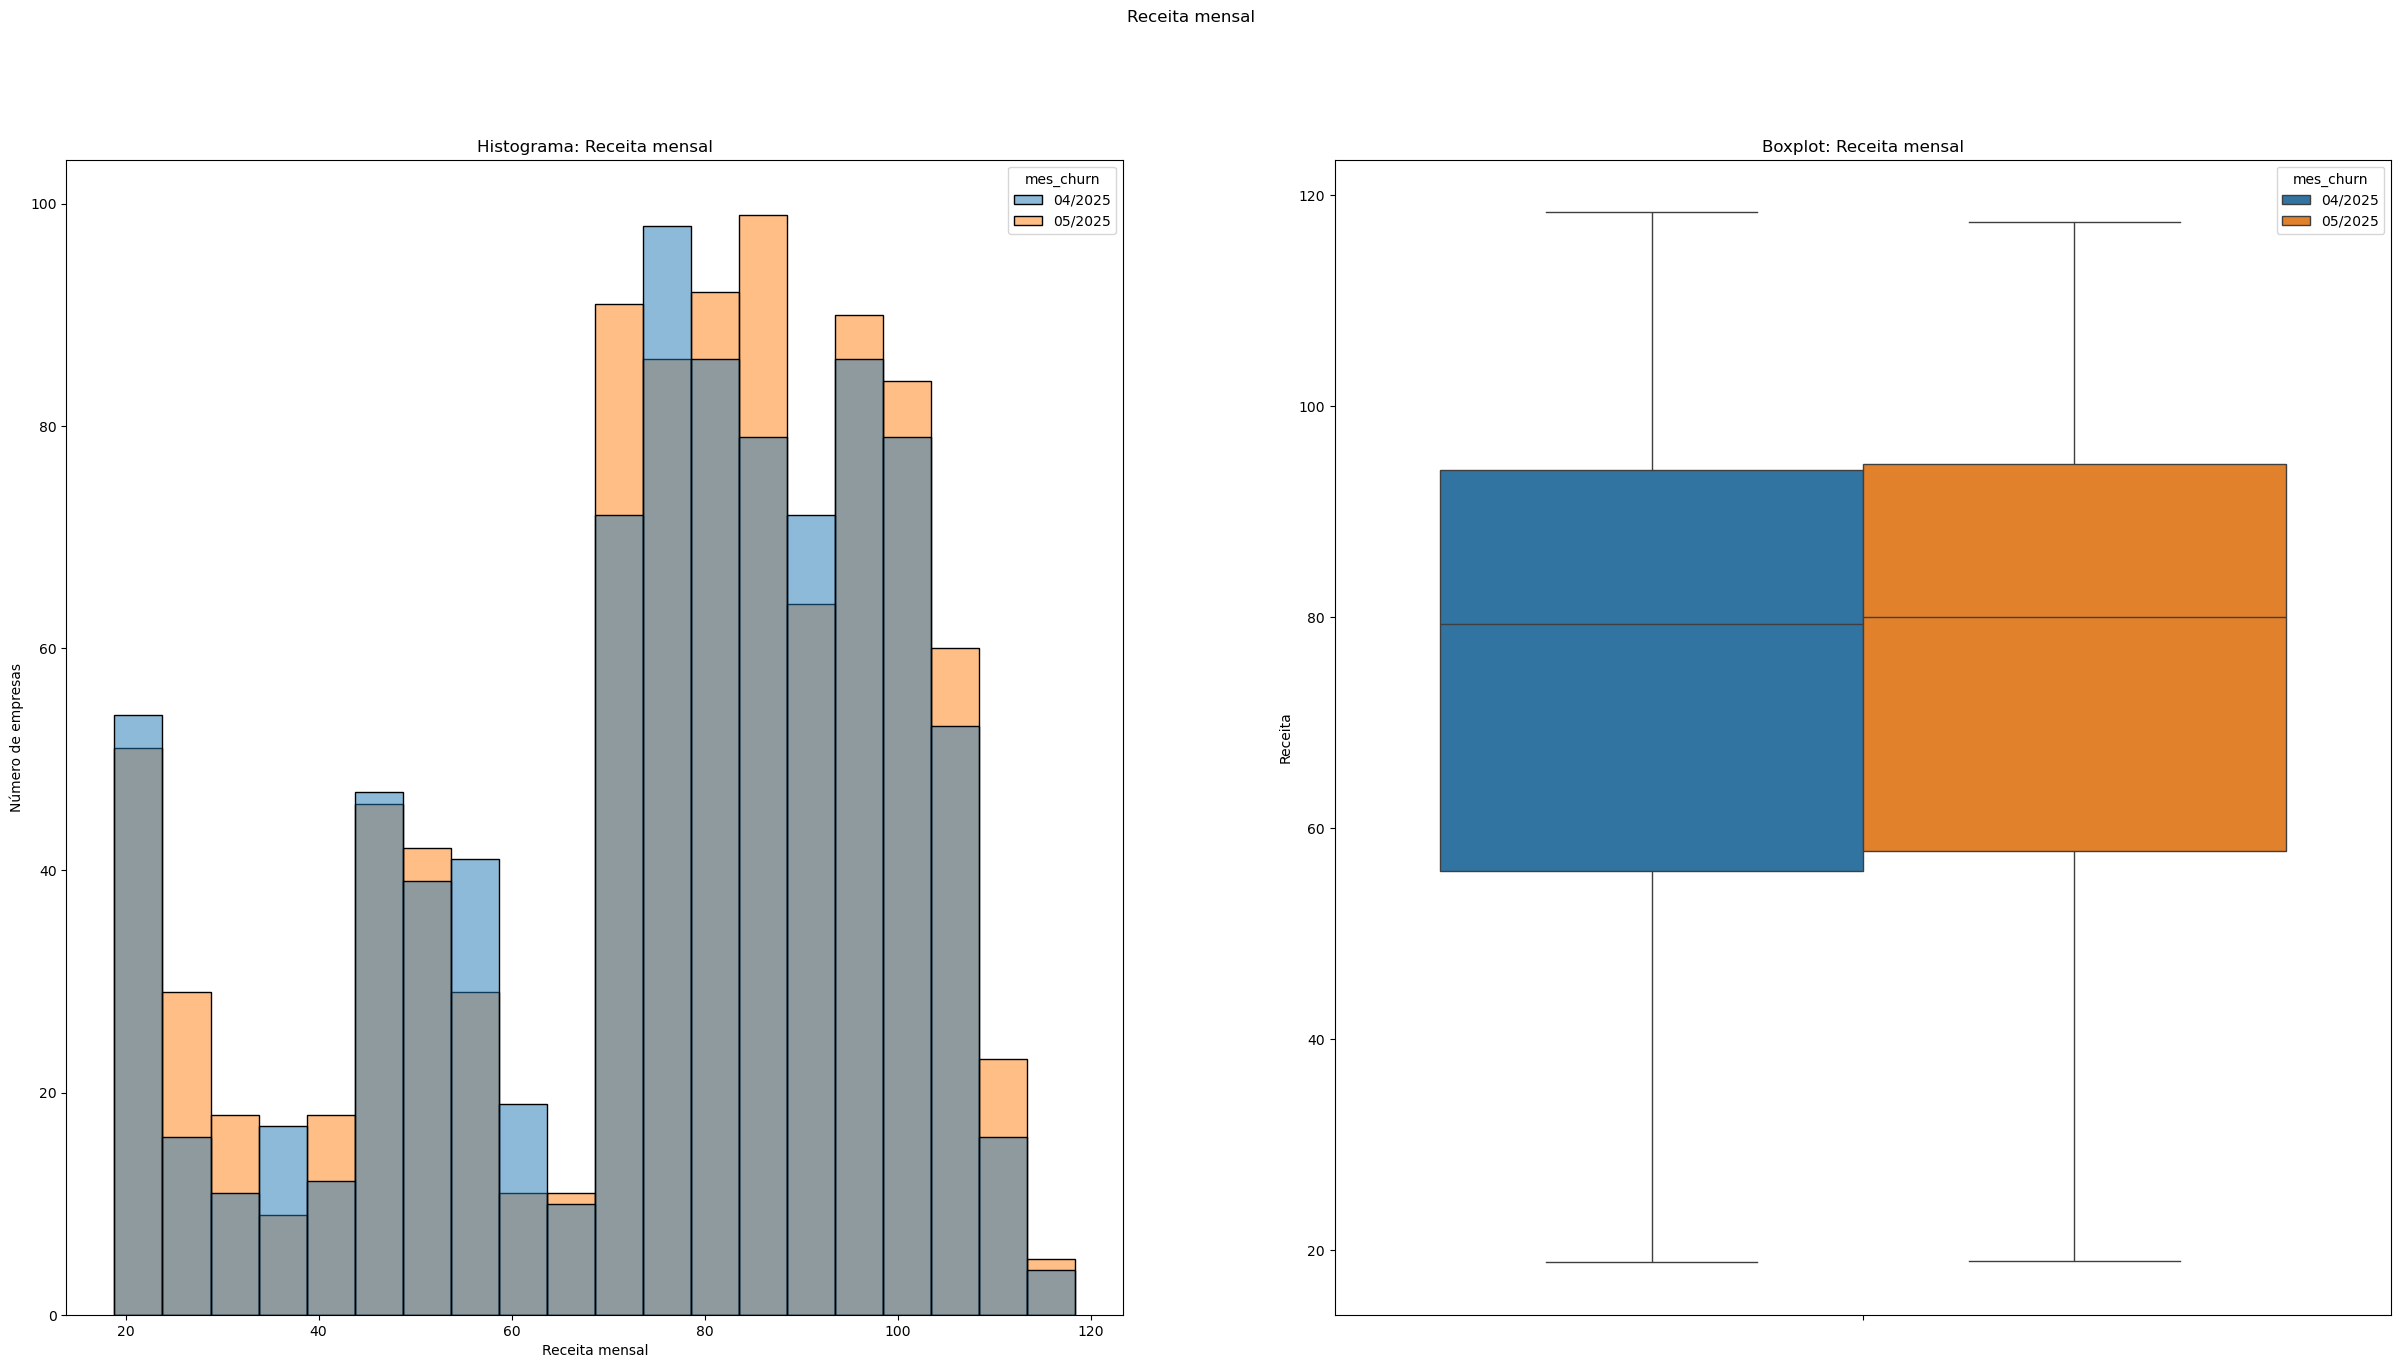

In [115]:
# Receita mensal
fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Receita mensal')

# Histograma
sns.histplot(ax=axes[0], data=df, x='receita_mensal', hue='mes_churn', bins=20)
axes[0].set_title('Histograma: Receita mensal')
axes[0].set_xlabel('Receita mensal') 
axes[0].set_ylabel('Número de empresas')

# Boxplot
sns.boxplot(data=df, y='receita_mensal', hue='mes_churn')
axes[1].set_title('Boxplot: Receita mensal')
axes[1].set_xlabel('') 
axes[1].set_ylabel('Receita');

A mediana da receita mensal gerada pelas empresas que cancelaram são próximas nos meses de abril e maio.

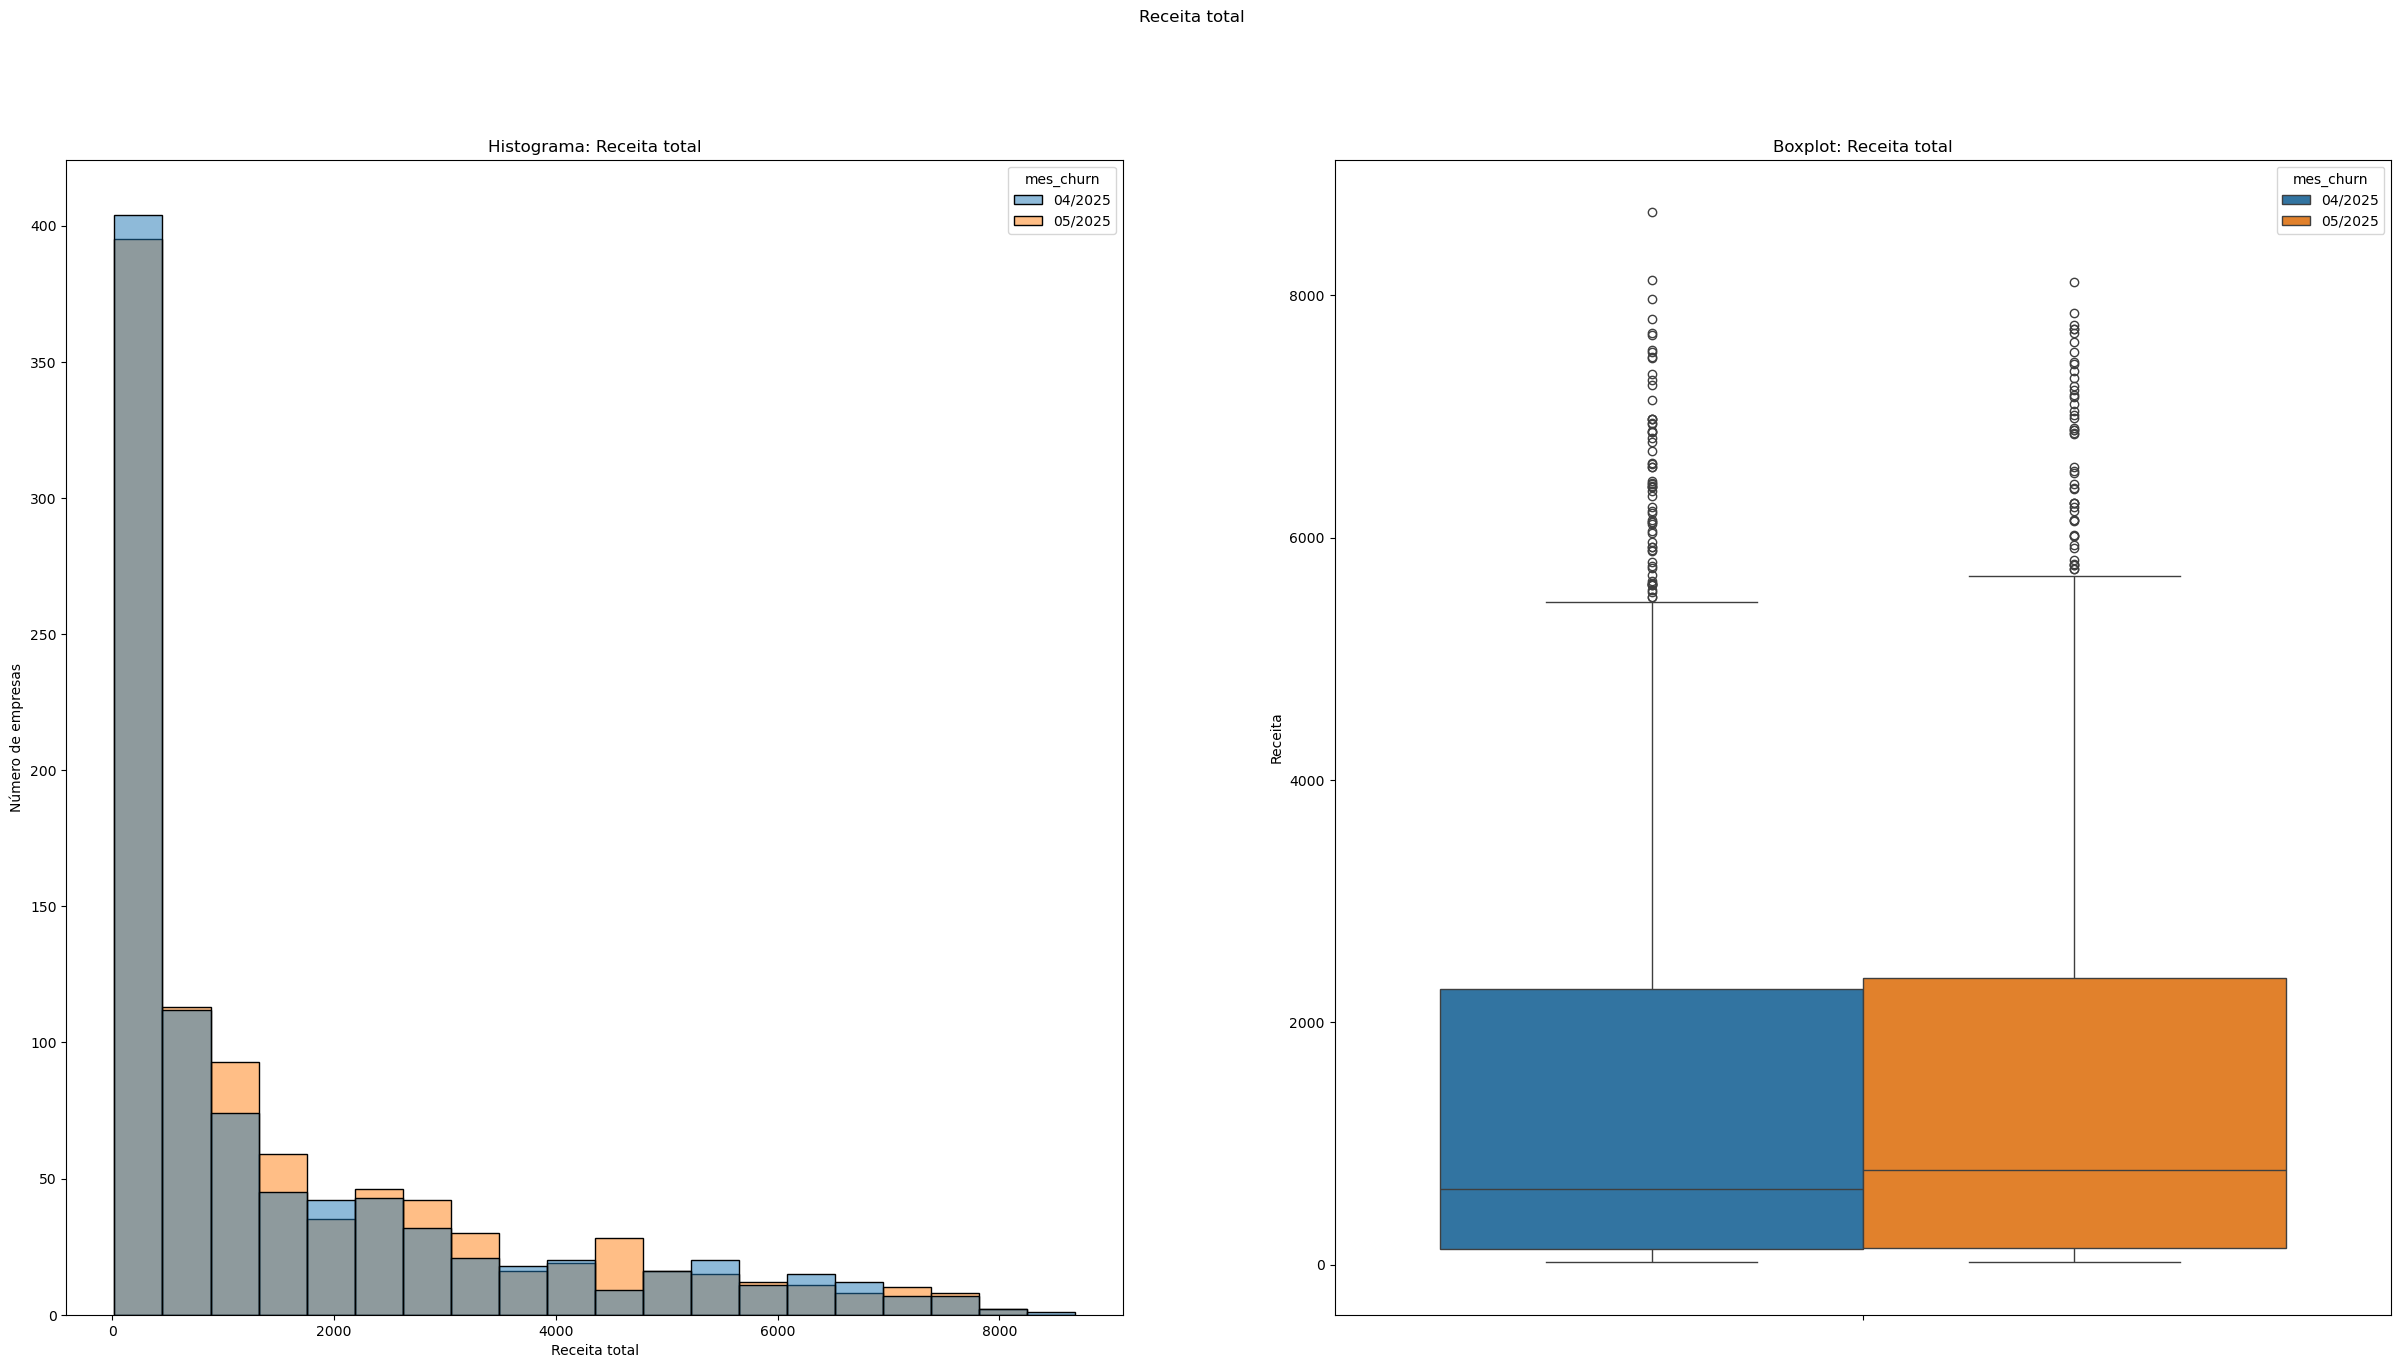

In [116]:
# Receita total
fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Receita total')

# Histograma
sns.histplot(ax=axes[0], data=df, x='receita_total', hue='mes_churn', bins=20)
axes[0].set_title('Histograma: Receita total')
axes[0].set_xlabel('Receita total') 
axes[0].set_ylabel('Número de empresas')

# Boxplot
sns.boxplot(data=df, y='receita_total', hue='mes_churn')
axes[1].set_title('Boxplot: Receita total')
axes[1].set_xlabel('') 
axes[1].set_ylabel('Receita');

A mediana da receita total gerada pelas empresas que cancelaram era de R$ 620,55 em abril de 2025 e de R$ 777,70 em maio de 2025.

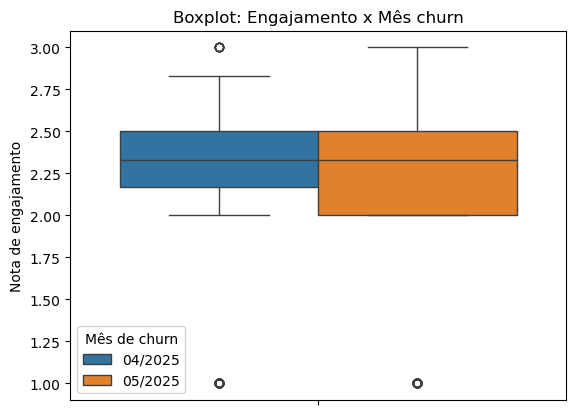

In [64]:
# Engajamento
ax = sns.boxplot(data=df, y='engajamento', hue='mes_churn')
ax.set_title('Boxplot: Engajamento x Mês churn')
ax.set_xlabel('') 
ax.set_ylabel('Nota de engajamento')
ax.legend(title='Mês de churn');

mes_churn,04/2025,05/2025
engajamento,,
1.0,51.327434,48.672566
2.0,45.580110,54.419890
2.17,49.773756,50.226244
2.33,49.189189,50.810811
2.5,48.692810,51.307190
2.67,52.631579,47.368421
2.83,42.253521,57.746479
3.0,46.666667,53.333333
All,48.742643,51.257357


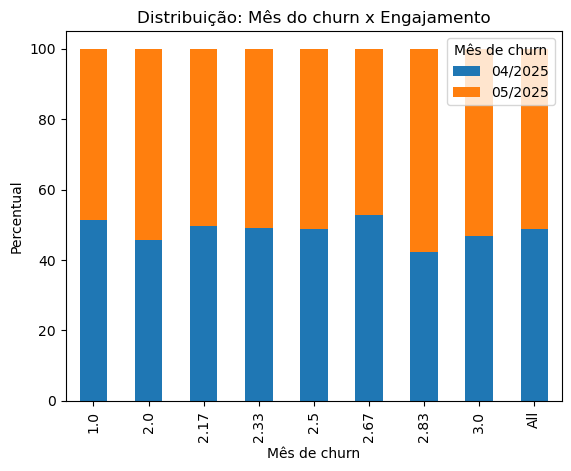

In [65]:
# Engajamento
crosstab = pd.crosstab(df['engajamento'], df['mes_churn'], normalize='index', margins=True)*100
crosstab.plot(kind='bar', stacked=True)
plt.title('Distribuição: Mês do churn x Engajamento')
plt.ylabel('Percentual')
plt.xlabel('Mês de churn')
plt.legend(title='Mês de churn');

crosstab

Em ambos os meses, os usuários que cancelaram apresentaram mediana de 2,33 de engajamento e médias de engajamento próximas (~2,23). Em abril, 25% dos usuários tinham nota de engajamento de até 2,17, já em maio este número caiu para nota de até 2,0.

#### Agrupamentos

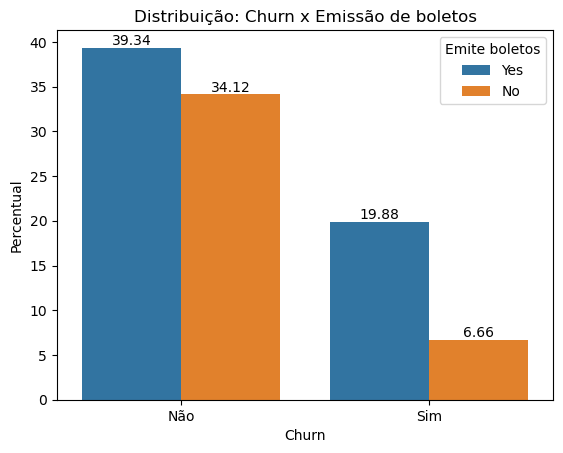

In [114]:
# Emite boletos
ax = churn_vs_variable_barplot('emite_boletos')
ax.set_title('Distribuição: Churn x Emissão de boletos')
ax.set_xlabel('Churn')
ax.set_ylabel('Percentual')
plt.legend(title='Emite boletos');

A maior parte das empresas, tanto as que cancelaram e as que não, emitem boletos.

In [115]:
pd.crosstab(df['emite_boletos'], df['churn'], normalize='index', margins=True)*100

churn,Não,Sim
emite_boletos,,
No,83.669916,16.330084
Yes,66.434908,33.565092
All,73.463013,26.536987


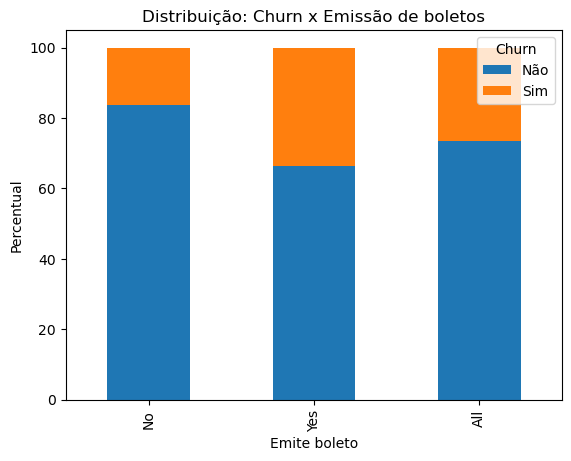

In [116]:
crosstab = pd.crosstab(df['emite_boletos'], df['churn'], normalize='index', margins=True)*100
crosstab.plot(kind='bar', stacked=True)

plt.title('Distribuição: Churn x Emissão de boletos')
plt.ylabel('Percentual')
plt.xlabel('Emite boleto')
plt.legend(title='Churn');

A proporção de churn é maior nas empresas que emitem boleto.

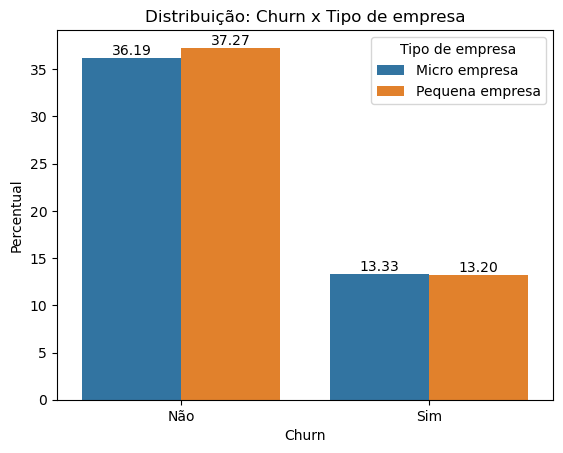

In [117]:
# Tipo de empresa
ax = churn_vs_variable_barplot('tipo_empresa')
ax.set_title('Distribuição: Churn x Tipo de empresa')
ax.set_xlabel('Churn')
ax.set_ylabel('Percentual')
plt.legend(title='Tipo de empresa');

A distribuição de pequenas e micro empresas dentre o grupo que deu churn e o que não deu é semelhante.

In [118]:
pd.crosstab(df['tipo_empresa'], df['churn'], margins=True, normalize='index')*100

churn,Não,Sim
tipo_empresa,,
Micro empresa,73.079128,26.920872
Pequena empresa,73.839662,26.160338
All,73.463013,26.536987


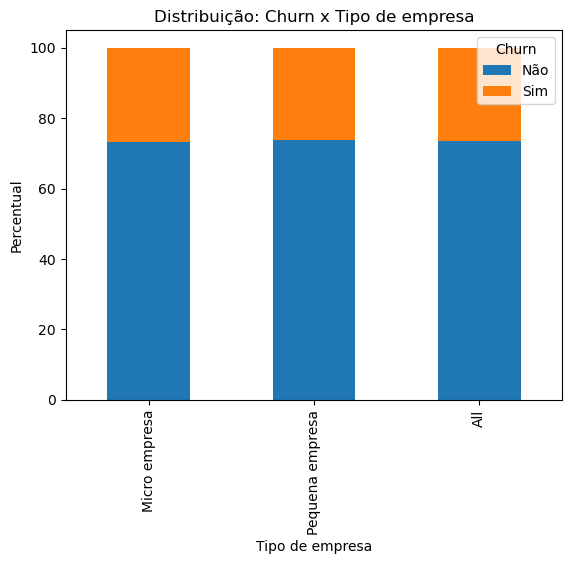

In [119]:
crosstab = pd.crosstab(df['tipo_empresa'], df['churn'], margins=True, normalize='index')*100

crosstab.plot(kind='bar', stacked=True)

plt.title('Distribuição: Churn x Tipo de empresa')
plt.ylabel('Percentual')
plt.xlabel('Tipo de empresa')
plt.legend(title='Churn');

A proporção de churn é semelhante nas micro e pequenas empresas.

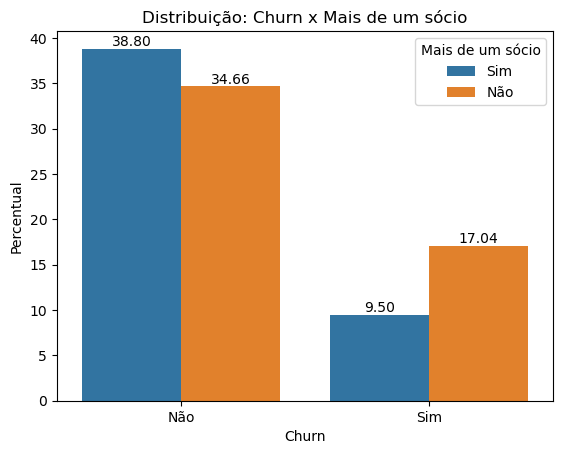

In [120]:
# Quantidade de sócios
ax = churn_vs_variable_barplot('mais_de_um_socio')
ax.set_title('Distribuição: Churn x Mais de um sócio')
ax.set_xlabel('Churn')
ax.set_ylabel('Percentual')
plt.legend(title='Mais de um sócio');

No grupo que permaneceu, a maioria das empresas possui mais de um sócio. Já entre os churns, a maioria das empresas possui apenas um sócio.

In [121]:
pd.crosstab(df['mais_de_um_socio'], df['churn'], margins=True, normalize='index')*100

churn,Não,Sim
mais_de_um_socio,,
Não,67.042021,32.957979
Sim,80.335097,19.664903
All,73.463013,26.536987


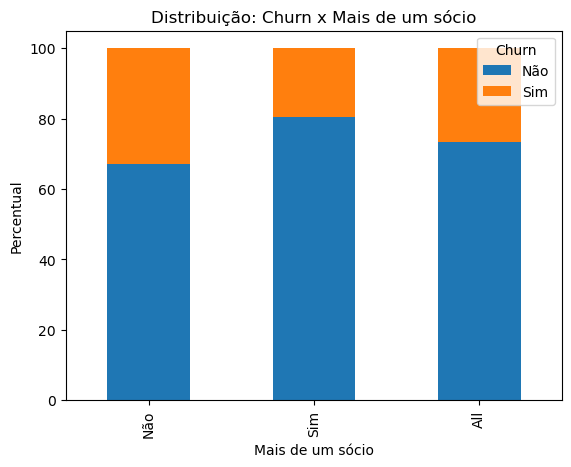

In [122]:
crosstab = pd.crosstab(df['mais_de_um_socio'], df['churn'], normalize='index', margins=True)*100
crosstab.plot(kind='bar', stacked=True)

plt.title('Distribuição: Churn x Mais de um sócio')
plt.ylabel('Percentual')
plt.xlabel('Mais de um sócio')
plt.legend(title='Churn');

A proporção de churns é maior nas empresas que possuem apenas um sócio comparado com as que possuem mais de um sócio.

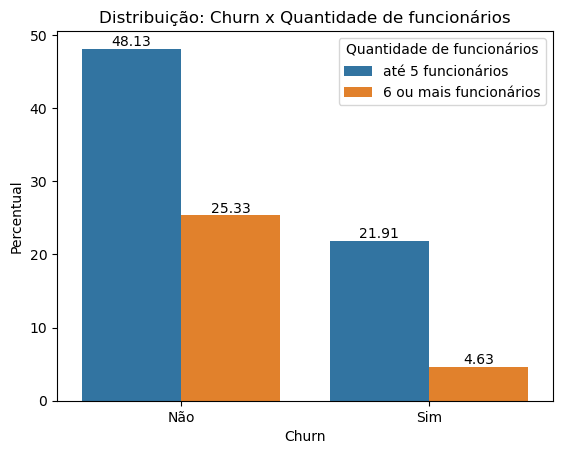

In [123]:
# Quantidade de funcionários
ax = churn_vs_variable_barplot('qtde_funcionarios')
ax.set_title('Distribuição: Churn x Quantidade de funcionários')
ax.set_xlabel('Churn')
ax.set_ylabel('Percentual')
plt.legend(title='Quantidade de funcionários');

A maior parte das empresas, tanto dentre o grupo de churns quanto dentre os de não churn, tem até 5 funcionários.

In [124]:
pd.crosstab(df['qtde_funcionarios'], df['churn'], margins=True, normalize='index')*100

churn,Não,Sim
qtde_funcionarios,,
6 ou mais funcionários,84.549763,15.450237
até 5 funcionários,68.720860,31.279140
All,73.463013,26.536987


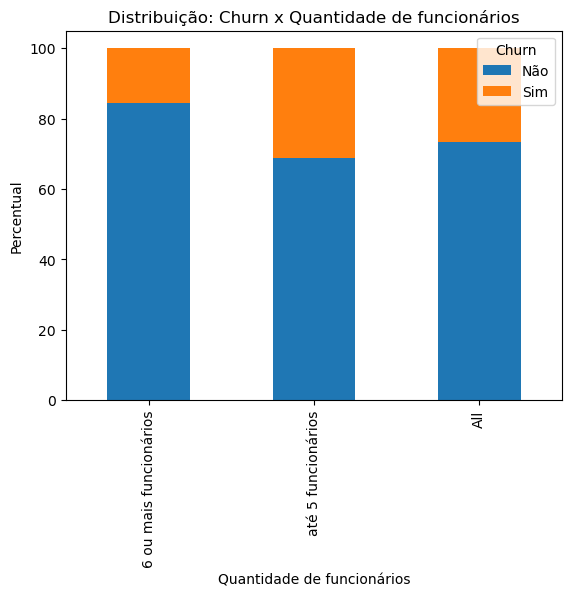

In [125]:
crosstab = pd.crosstab(df['qtde_funcionarios'], df['churn'], normalize='index', margins=True)*100
crosstab.plot(kind='bar', stacked=True)

plt.title('Distribuição: Churn x Quantidade de funcionários')
plt.ylabel('Percentual')
plt.xlabel('Quantidade de funcionários')
plt.legend(title='Churn');

Apesar de a maioria das empresas, tanto com um até 5 funcionários quanto com 6 ou mais funcionários, não terem cancelado, dentre as empresas com até 5 funcionários, a proporção de churns é maior que das empresas com 6 ou mais funcionários.

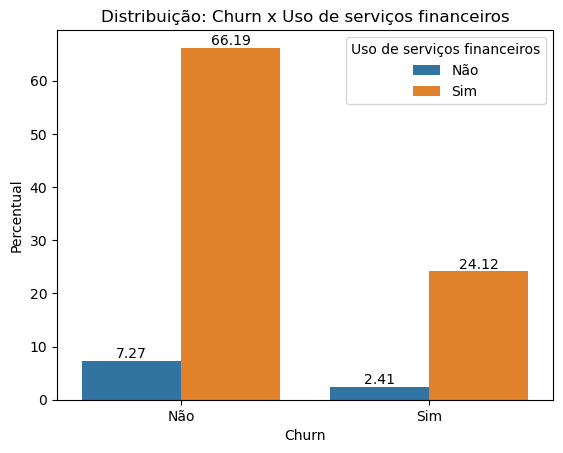

In [126]:
# Uso de serviços financeiros
ax = churn_vs_variable_barplot('uso_servicos_financeiros')
ax.set_title('Distribuição: Churn x Uso de serviços financeiros')
ax.set_xlabel('Churn')
ax.set_ylabel('Percentual')
plt.legend(title='Uso de serviços financeiros');

A minoria das empresas de ambos os grupos de usuários (churn e não churn) utiliza serviços financeiros.

In [127]:
pd.crosstab(df['uso_servicos_financeiros'], df['churn'], margins=True, normalize='index')*100

churn,Não,Sim
uso_servicos_financeiros,,
Não,75.073314,24.926686
Sim,73.290363,26.709637
All,73.463013,26.536987


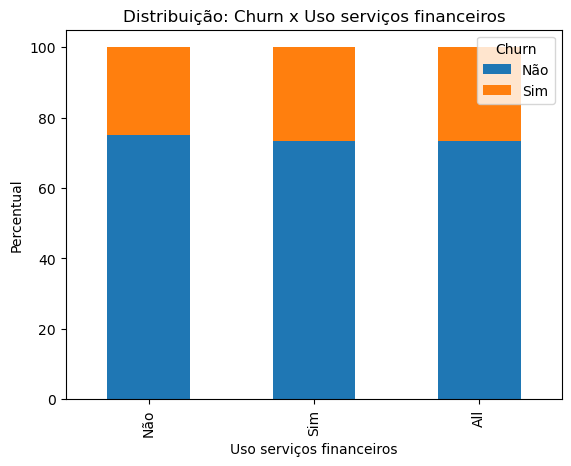

In [128]:
crosstab = pd.crosstab(df['uso_servicos_financeiros'], df['churn'], normalize='index', margins=True)*100
crosstab.plot(kind='bar', stacked=True)

plt.title('Distribuição: Churn x Uso serviços financeiros')
plt.ylabel('Percentual')
plt.xlabel('Uso serviços financeiros')
plt.legend(title='Churn');

A proporção de uso de serviços financeiros pelas empresas é semelhante entre o grupo de churns e o de não churns.

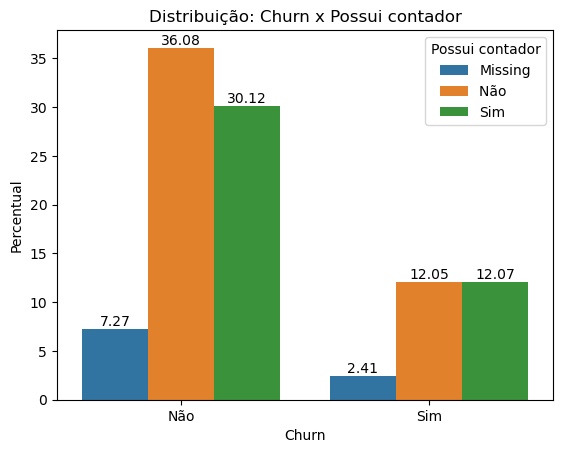

In [129]:
# Possui contador
df['contador'] = df['contador'].fillna('Missing')
ax = churn_vs_variable_barplot('contador')
ax.set_title('Distribuição: Churn x Possui contador')
ax.set_xlabel('Churn')
ax.set_ylabel('Percentual')
plt.legend(title='Possui contador');

A distribuição dos dados é semelhante entre o grupo de churns e o de não churns.

In [130]:
pd.crosstab(df['contador'], df['churn'], margins=True, normalize='index')*100

churn,Não,Sim
contador,,
Missing,75.073314,24.926686
Não,74.955752,25.044248
Sim,71.390104,28.609896
All,73.463013,26.536987


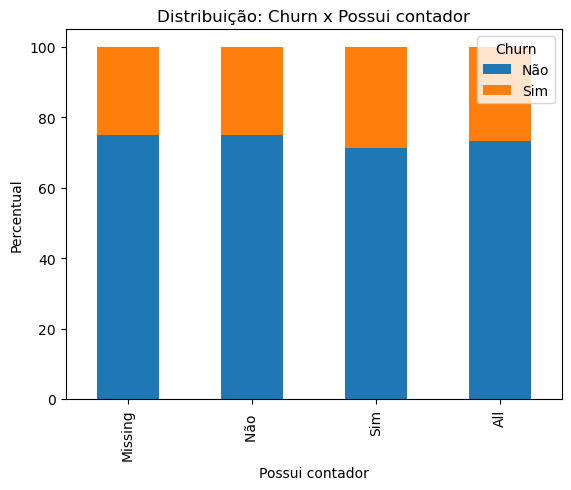

In [131]:
crosstab = pd.crosstab(df['contador'], df['churn'], normalize='index', margins=True)*100
crosstab.plot(kind='bar', stacked=True)

plt.title('Distribuição: Churn x Possui contador')
plt.ylabel('Percentual')
plt.xlabel('Possui contador')
plt.legend(title='Churn');

A proporção de uso de contador pelas empresas é semelhante entre o grupo de churns e o de não churns.

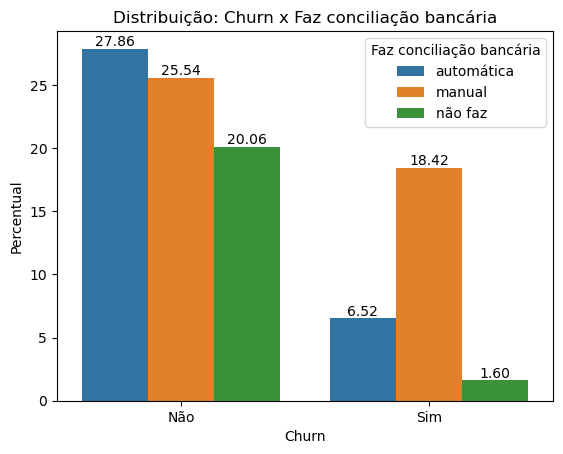

In [132]:
# Faz conciliação bancária
ax = churn_vs_variable_barplot('conciliacao_bancaria')
ax.set_title('Distribuição: Churn x Faz conciliação bancária')
ax.set_xlabel('Churn')
ax.set_ylabel('Percentual')
plt.legend(title='Faz conciliação bancária');

Dentre os usuários que cancelaram, a maioria faz conciliação bancária manual.

In [133]:
pd.crosstab(df['conciliacao_bancaria'], df['churn'], margins=True, normalize='index')*100

churn,Não,Sim
conciliacao_bancaria,,
automática,81.040892,18.959108
manual,58.107235,41.892765
não faz,92.595020,7.404980
All,73.463013,26.536987


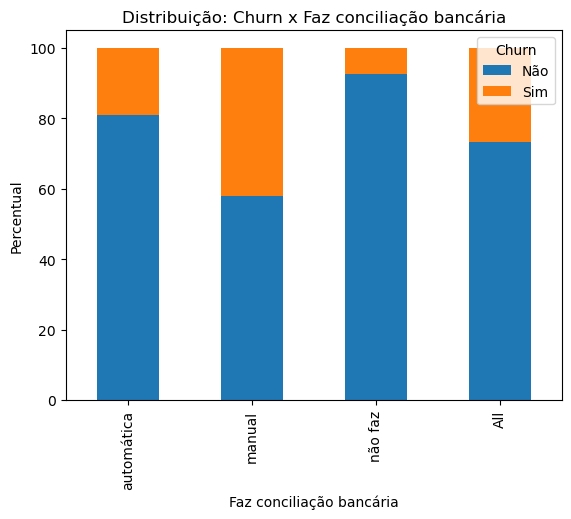

In [134]:
crosstab = pd.crosstab(df['conciliacao_bancaria'], df['churn'], normalize='index', margins=True)*100
crosstab.plot(kind='bar', stacked=True)

plt.title('Distribuição: Churn x Faz conciliação bancária')
plt.ylabel('Percentual')
plt.xlabel('Faz conciliação bancária')
plt.legend(title='Churn');

A proporção de churn é maior dentre as empresas que faz consolidação bancária manual. As que não fazem consolidação bancária possuem menor percentual de churn.

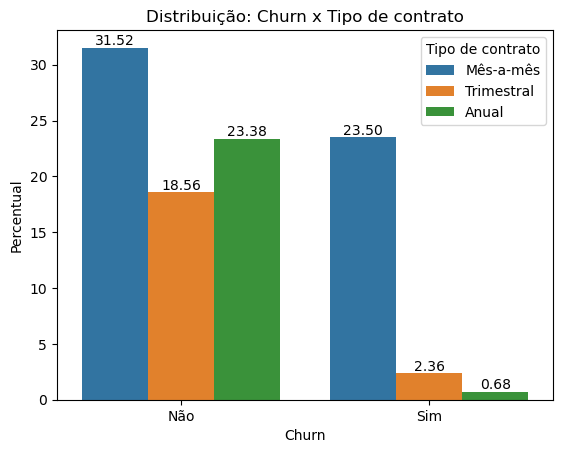

In [135]:
# Tipo de contrato
ax = churn_vs_variable_barplot('contrato')
ax.set_title('Distribuição: Churn x Tipo de contrato')
ax.set_xlabel('Churn')
ax.set_ylabel('Percentual')
plt.legend(title='Tipo de contrato');

Mais usuários com contrato mês-a-mês cancelam que contratos nos modelos anuais e trimestrais. Os contratos anuais têm menor churn que os trimestrais.

In [136]:
pd.crosstab(df['contrato'], df['churn'], margins=True, normalize='index')*100

churn,Não,Sim
contrato,,
Anual,97.168142,2.831858
Mês-a-mês,57.290323,42.709677
Trimestral,88.730482,11.269518
All,73.463013,26.536987


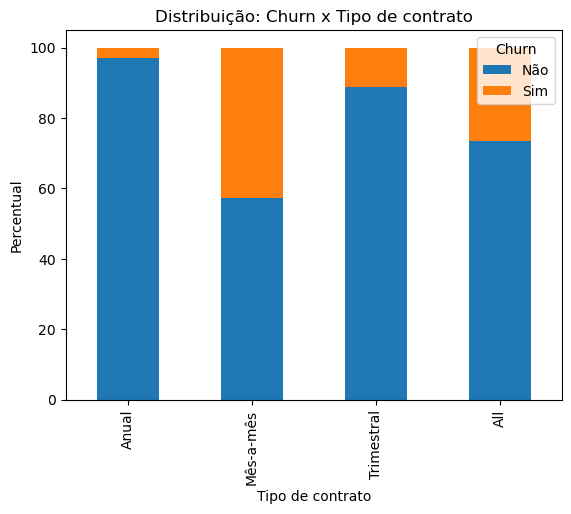

In [137]:
crosstab = pd.crosstab(df['contrato'], df['churn'], normalize='index', margins=True)*100
crosstab.plot(kind='bar', stacked=True)

plt.title('Distribuição: Churn x Tipo de contrato')
plt.ylabel('Percentual')
plt.xlabel('Tipo de contrato')
plt.legend(title='Churn');

A proporção de churn nos usuários com contrato mês-a-mês é significativamente maior que nas outras modalidades de contrato. Poucas empresas com contrato anual cancelaram. Parece haver indícios de que modalidades mais longas apresentam melhor retenção (a modalidade mais longa de contrato, ou seja, a anual, tem a menor proporção de churns).

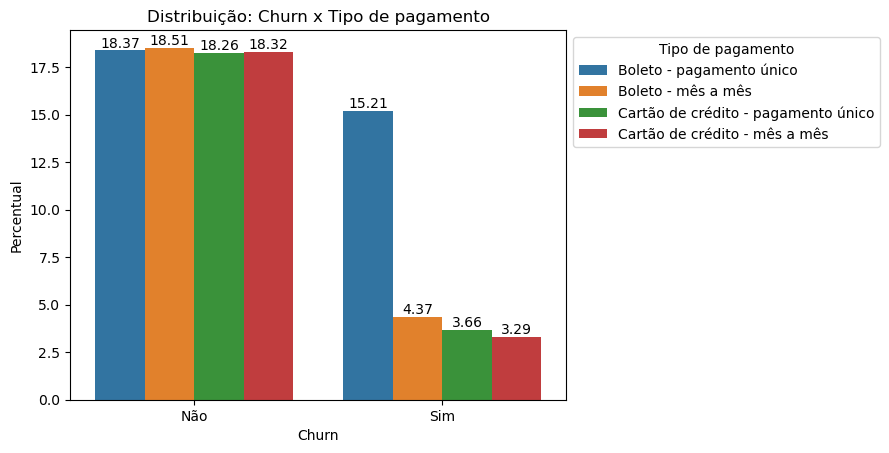

In [138]:
# Tipo de pagamento
ax = churn_vs_variable_barplot('tipo_pagamento')
ax.set_title('Distribuição: Churn x Tipo de pagamento')
ax.set_xlabel('Churn')
ax.set_ylabel('Percentual')
plt.legend(title='Tipo de pagamento')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1));

Dentre o grupo de usuários que cancelaram, a maioria realiza pagamento único por boleto, enquanto as formas de pagamento são homogêneas entre o grupo que não cancelou.

In [139]:
pd.crosstab(df['tipo_pagamento'], df['churn'], margins=True, normalize='index')*100

churn,Não,Sim
tipo_pagamento,,
Boleto - mês a mês,80.893300,19.106700
Boleto - pagamento único,54.714588,45.285412
Cartão de crédito - mês a mês,84.756899,15.243101
Cartão de crédito - pagamento único,83.290155,16.709845
All,73.463013,26.536987


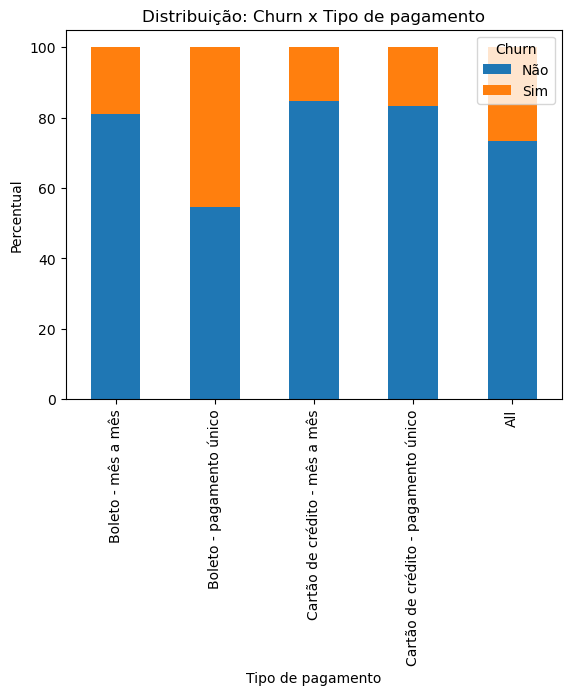

In [140]:
crosstab = pd.crosstab(df['tipo_pagamento'], df['churn'], normalize='index', margins=True)*100
crosstab.plot(kind='bar', stacked=True)

plt.title('Distribuição: Churn x Tipo de pagamento')
plt.ylabel('Percentual')
plt.xlabel('Tipo de pagamento')
plt.legend(title='Churn');

A proporção de empresas que realiza pagamento único por boleto no grupo de churns é maior em relação às outras modalidades de pagamento.

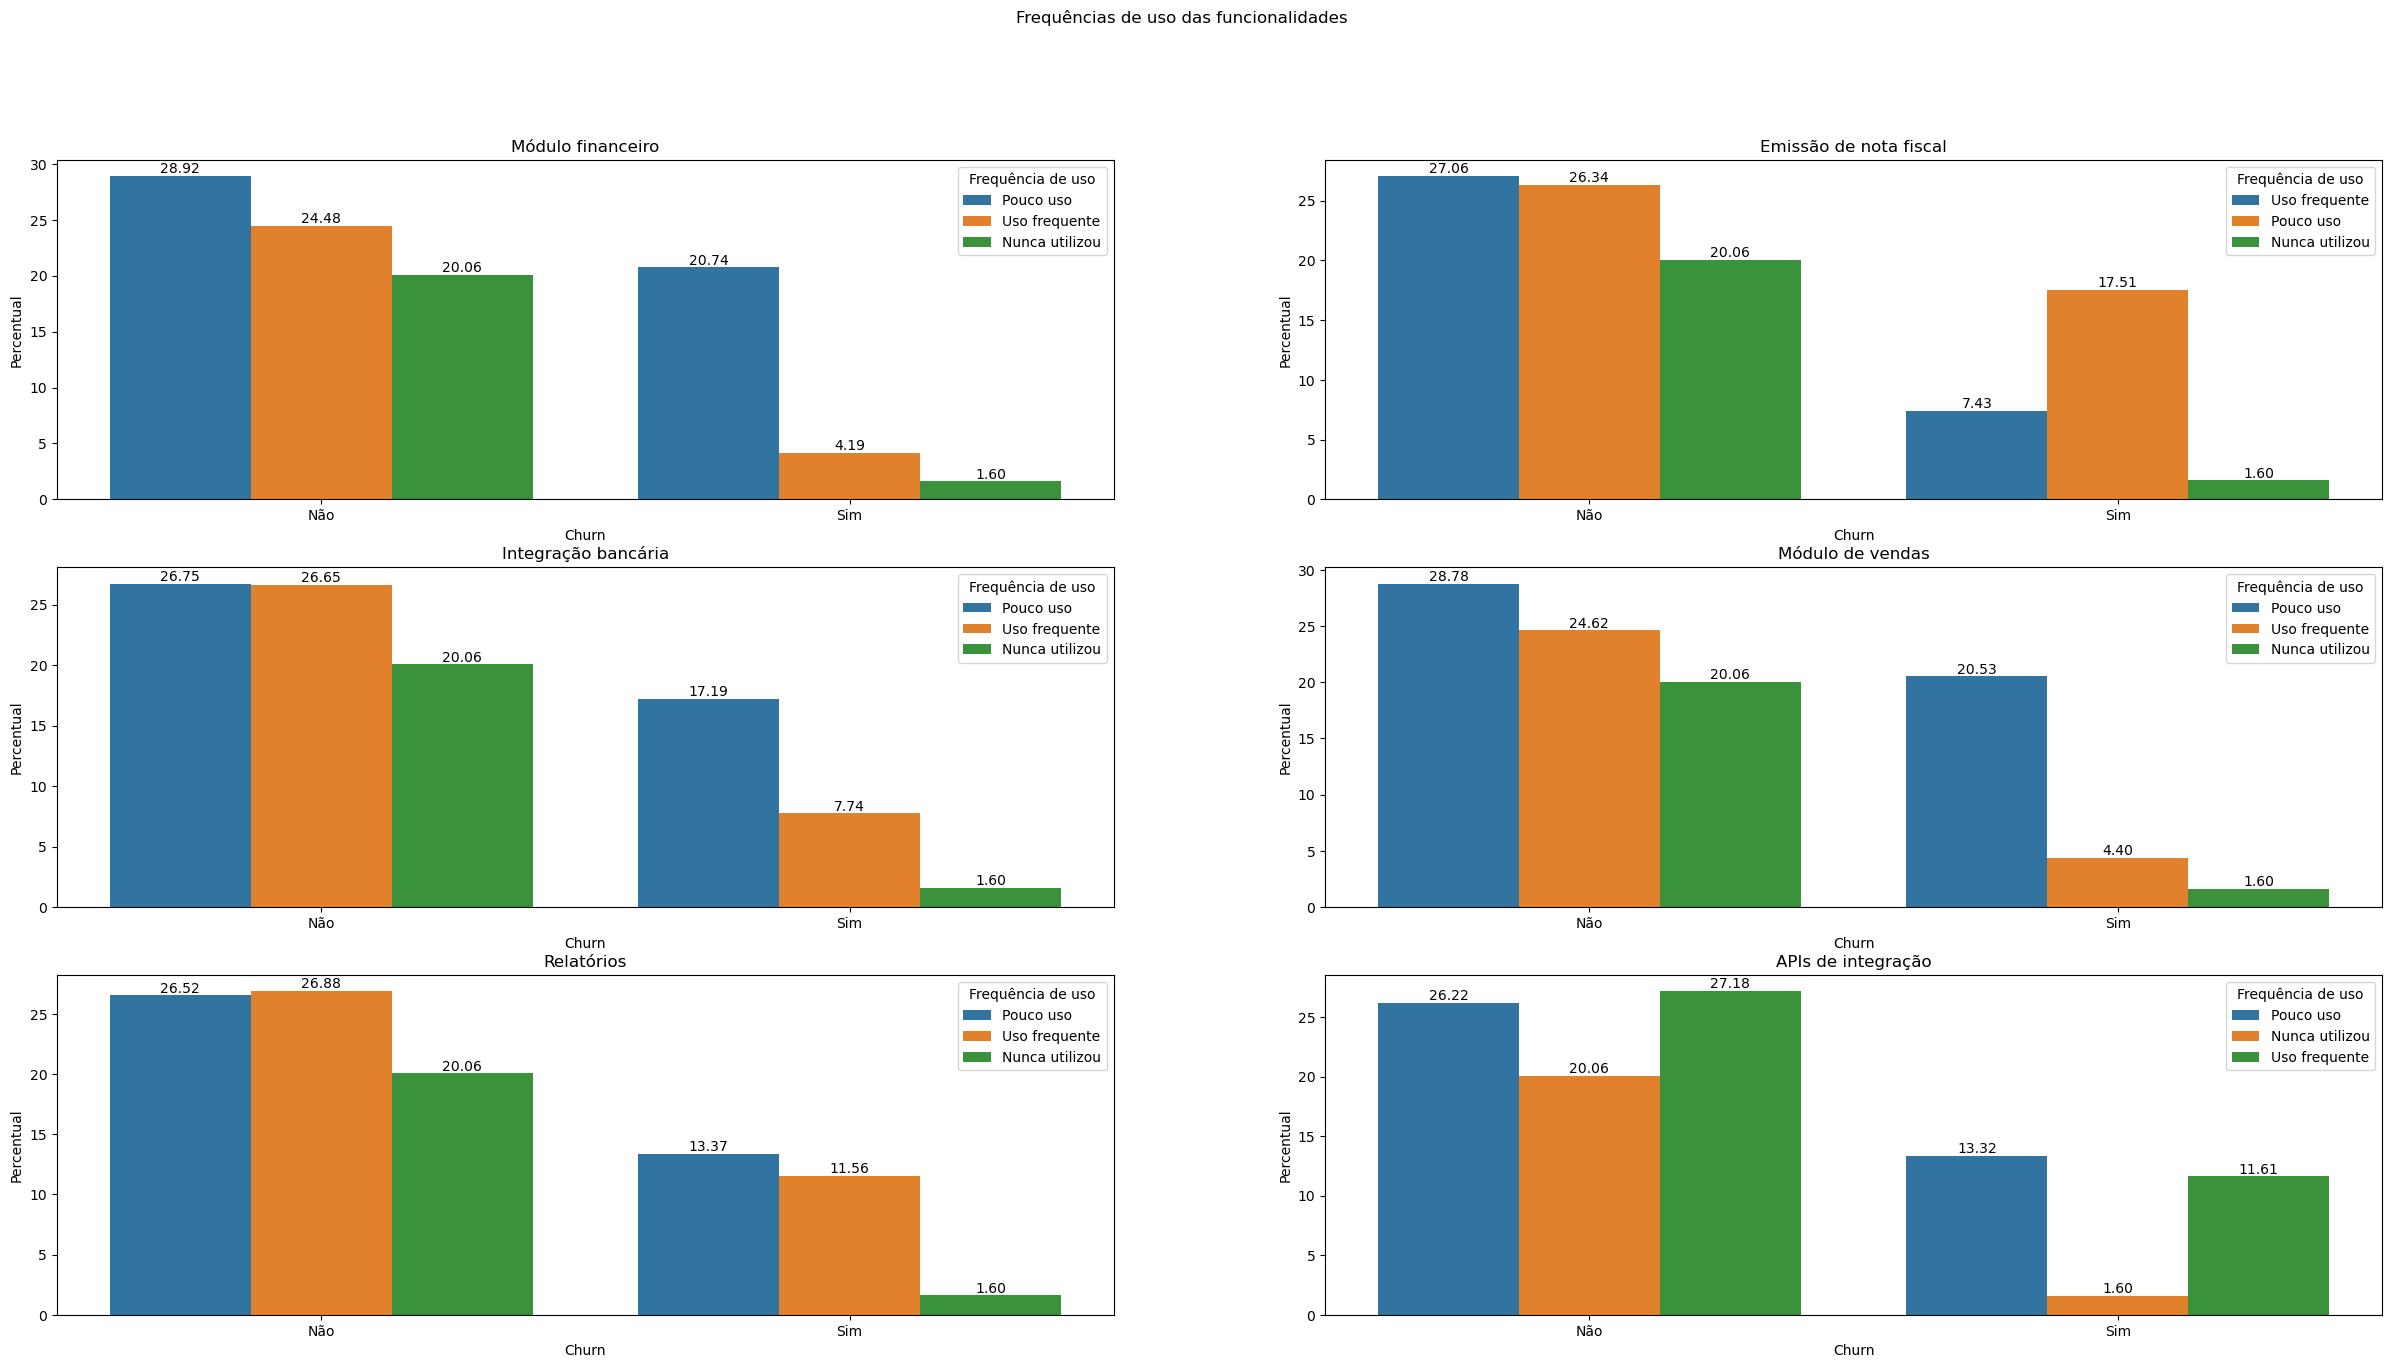

In [141]:
# Frequências de uso das funcionalidades do software
fig, axes = plt.subplots(3, 2, figsize=(30, 15))
fig.suptitle('Frequências de uso das funcionalidades')


churn_vs_variable_barplot('frequencia_uso_modulo_financeiro', axes[0, 0])
axes[0, 0].set_title('Módulo financeiro')
axes[0, 0].set_xlabel('Churn')
axes[0, 0].set_ylabel('Percentual')
axes[0, 0].legend(title='Frequência de uso')

churn_vs_variable_barplot('frequencia_uso_emissao_nota_fiscal', axes[0, 1])
axes[0, 1].set_title('Emissão de nota fiscal')
axes[0, 1].set_xlabel('Churn')
axes[0, 1].set_ylabel('Percentual')
axes[0, 1].legend(title='Frequência de uso')

churn_vs_variable_barplot('frequencia_uso_integracao_bancaria', axes[1, 0])
axes[1, 0].set_title('Integração bancária')
axes[1, 0].set_xlabel('Churn')
axes[1, 0].set_ylabel('Percentual')
axes[1, 0].legend(title='Frequência de uso')

churn_vs_variable_barplot('frequencia_uso_modulo_vendas', axes[1, 1])
axes[1, 1].set_title('Módulo de vendas')
axes[1, 1].set_xlabel('Churn')
axes[1, 1].set_ylabel('Percentual')
axes[1, 1].legend(title='Frequência de uso')

churn_vs_variable_barplot('frequencia_uso_relatorios', axes[2, 0])
axes[2, 0].set_title('Relatórios')
axes[2, 0].set_xlabel('Churn')
axes[2, 0].set_ylabel('Percentual')
axes[2, 0].legend(title='Frequência de uso')

churn_vs_variable_barplot('frequencia_uso_apis_integracao', axes[2, 1]);
axes[2, 1].set_title('APIs de integração')
axes[2, 1].set_xlabel('Churn')
axes[2, 1].set_ylabel('Percentual')
axes[2, 1].legend(title='Frequência de uso');

Em relação ao uso do *módulo financeiro*, da *integração bancária*, do *módulo de vendas* e da *emissão de nota fiscal, a diferença entre as frequências de uso é menor para o grupo de clientes que não cancelou. Já no caso do grupo que cancelou, a grande maioria fazia pouco uso do módulo financeiro, enquanto uma minoria fazia uso frequente ou nunca utilizou.

Em relação à *emissão de relatórios* e ao uso de *APIs de integração*, a diferença entre as frequências de uso é menor para o grupo de clientes que não cancelou. Já no caso do grupo que cancelou, a maioria dos usuários fazia pouco uso ou uso frequente da emissão de relatórios (a diferença entre as frequências de uso é baixa), enquanto a minoria nunca utilizou a funcionalidade.

Dentre os churns, de maneira geral, a quantidade de usuários que nunca utilizou as funcionalidades é pequena, enquanto a maioria fez pouco uso. Isso poderia indicar que o sistema foi testado, porém percebeu-se que não seria útil e foi, então, pouco usado. O baixo engajamento com o sistema gera um risco de churn.

Nos casos da emissão de relatórios e APIs de integração, dentre o grupo dos churns, há um número mais próximo dentre os que fizeram pouco uso e os que fizeram uso frequente. Nesses casos, poderia ser um indicativo de que, apesar da utlizade dessas funcionalidades, outros motivos os fizeram cancelar.

A quantidade de empresas que nunca utilizou as funcionalidades do sistema é grande de forma geral no grupo que não cancelou. Poderia se tratar de usuários novos ou também indicar usuários inativos.

In [142]:
pd.crosstab(df['frequencia_uso_modulo_financeiro'], df['churn'], margins=True, normalize='index')*100

churn,Não,Sim
frequencia_uso_modulo_financeiro,,
Nunca utilizou,92.595020,7.404980
Pouco uso,58.233276,41.766724
Uso frequente,85.388806,14.611194
All,73.463013,26.536987


In [143]:
pd.crosstab(df['frequencia_uso_emissao_nota_fiscal'], df['churn'], margins=True, normalize='index')*100

churn,Não,Sim
frequencia_uso_emissao_nota_fiscal,,
Nunca utilizou,92.595020,7.404980
Pouco uso,60.071244,39.928756
Uso frequente,78.468506,21.531494
All,73.463013,26.536987


In [144]:
pd.crosstab(df['frequencia_uso_integracao_bancaria'], df['churn'],  margins=True, normalize='index')*100

churn,Não,Sim
frequencia_uso_integracao_bancaria,,
Nunca utilizou,92.595020,7.404980
Pouco uso,60.872375,39.127625
Uso frequente,77.497936,22.502064
All,73.463013,26.536987


In [145]:
pd.crosstab(df['frequencia_uso_modulo_vendas'], df['churn'], margins=True, normalize='index')*100

churn,Não,Sim
frequencia_uso_modulo_vendas,,
Nunca utilizou,92.595020,7.404980
Pouco uso,58.364526,41.635474
Uso frequente,84.833659,15.166341
All,73.463013,26.536987


In [146]:
pd.crosstab(df['frequencia_uso_relatorios'], df['churn'], margins=True, normalize='index')*100

churn,Não,Sim
frequencia_uso_relatorios,,
Nunca utilizou,92.595020,7.404980
Pouco uso,66.476868,33.523132
Uso frequente,69.929812,30.070188
All,73.463013,26.536987


In [147]:
pd.crosstab(df['frequencia_uso_apis_integracao'], df['churn'], margins=True, normalize='index')*100

churn,Não,Sim
frequencia_uso_apis_integracao,,
Nunca utilizou,92.595020,7.404980
Pouco uso,66.319569,33.680431
Uso frequente,70.058565,29.941435
All,73.463013,26.536987


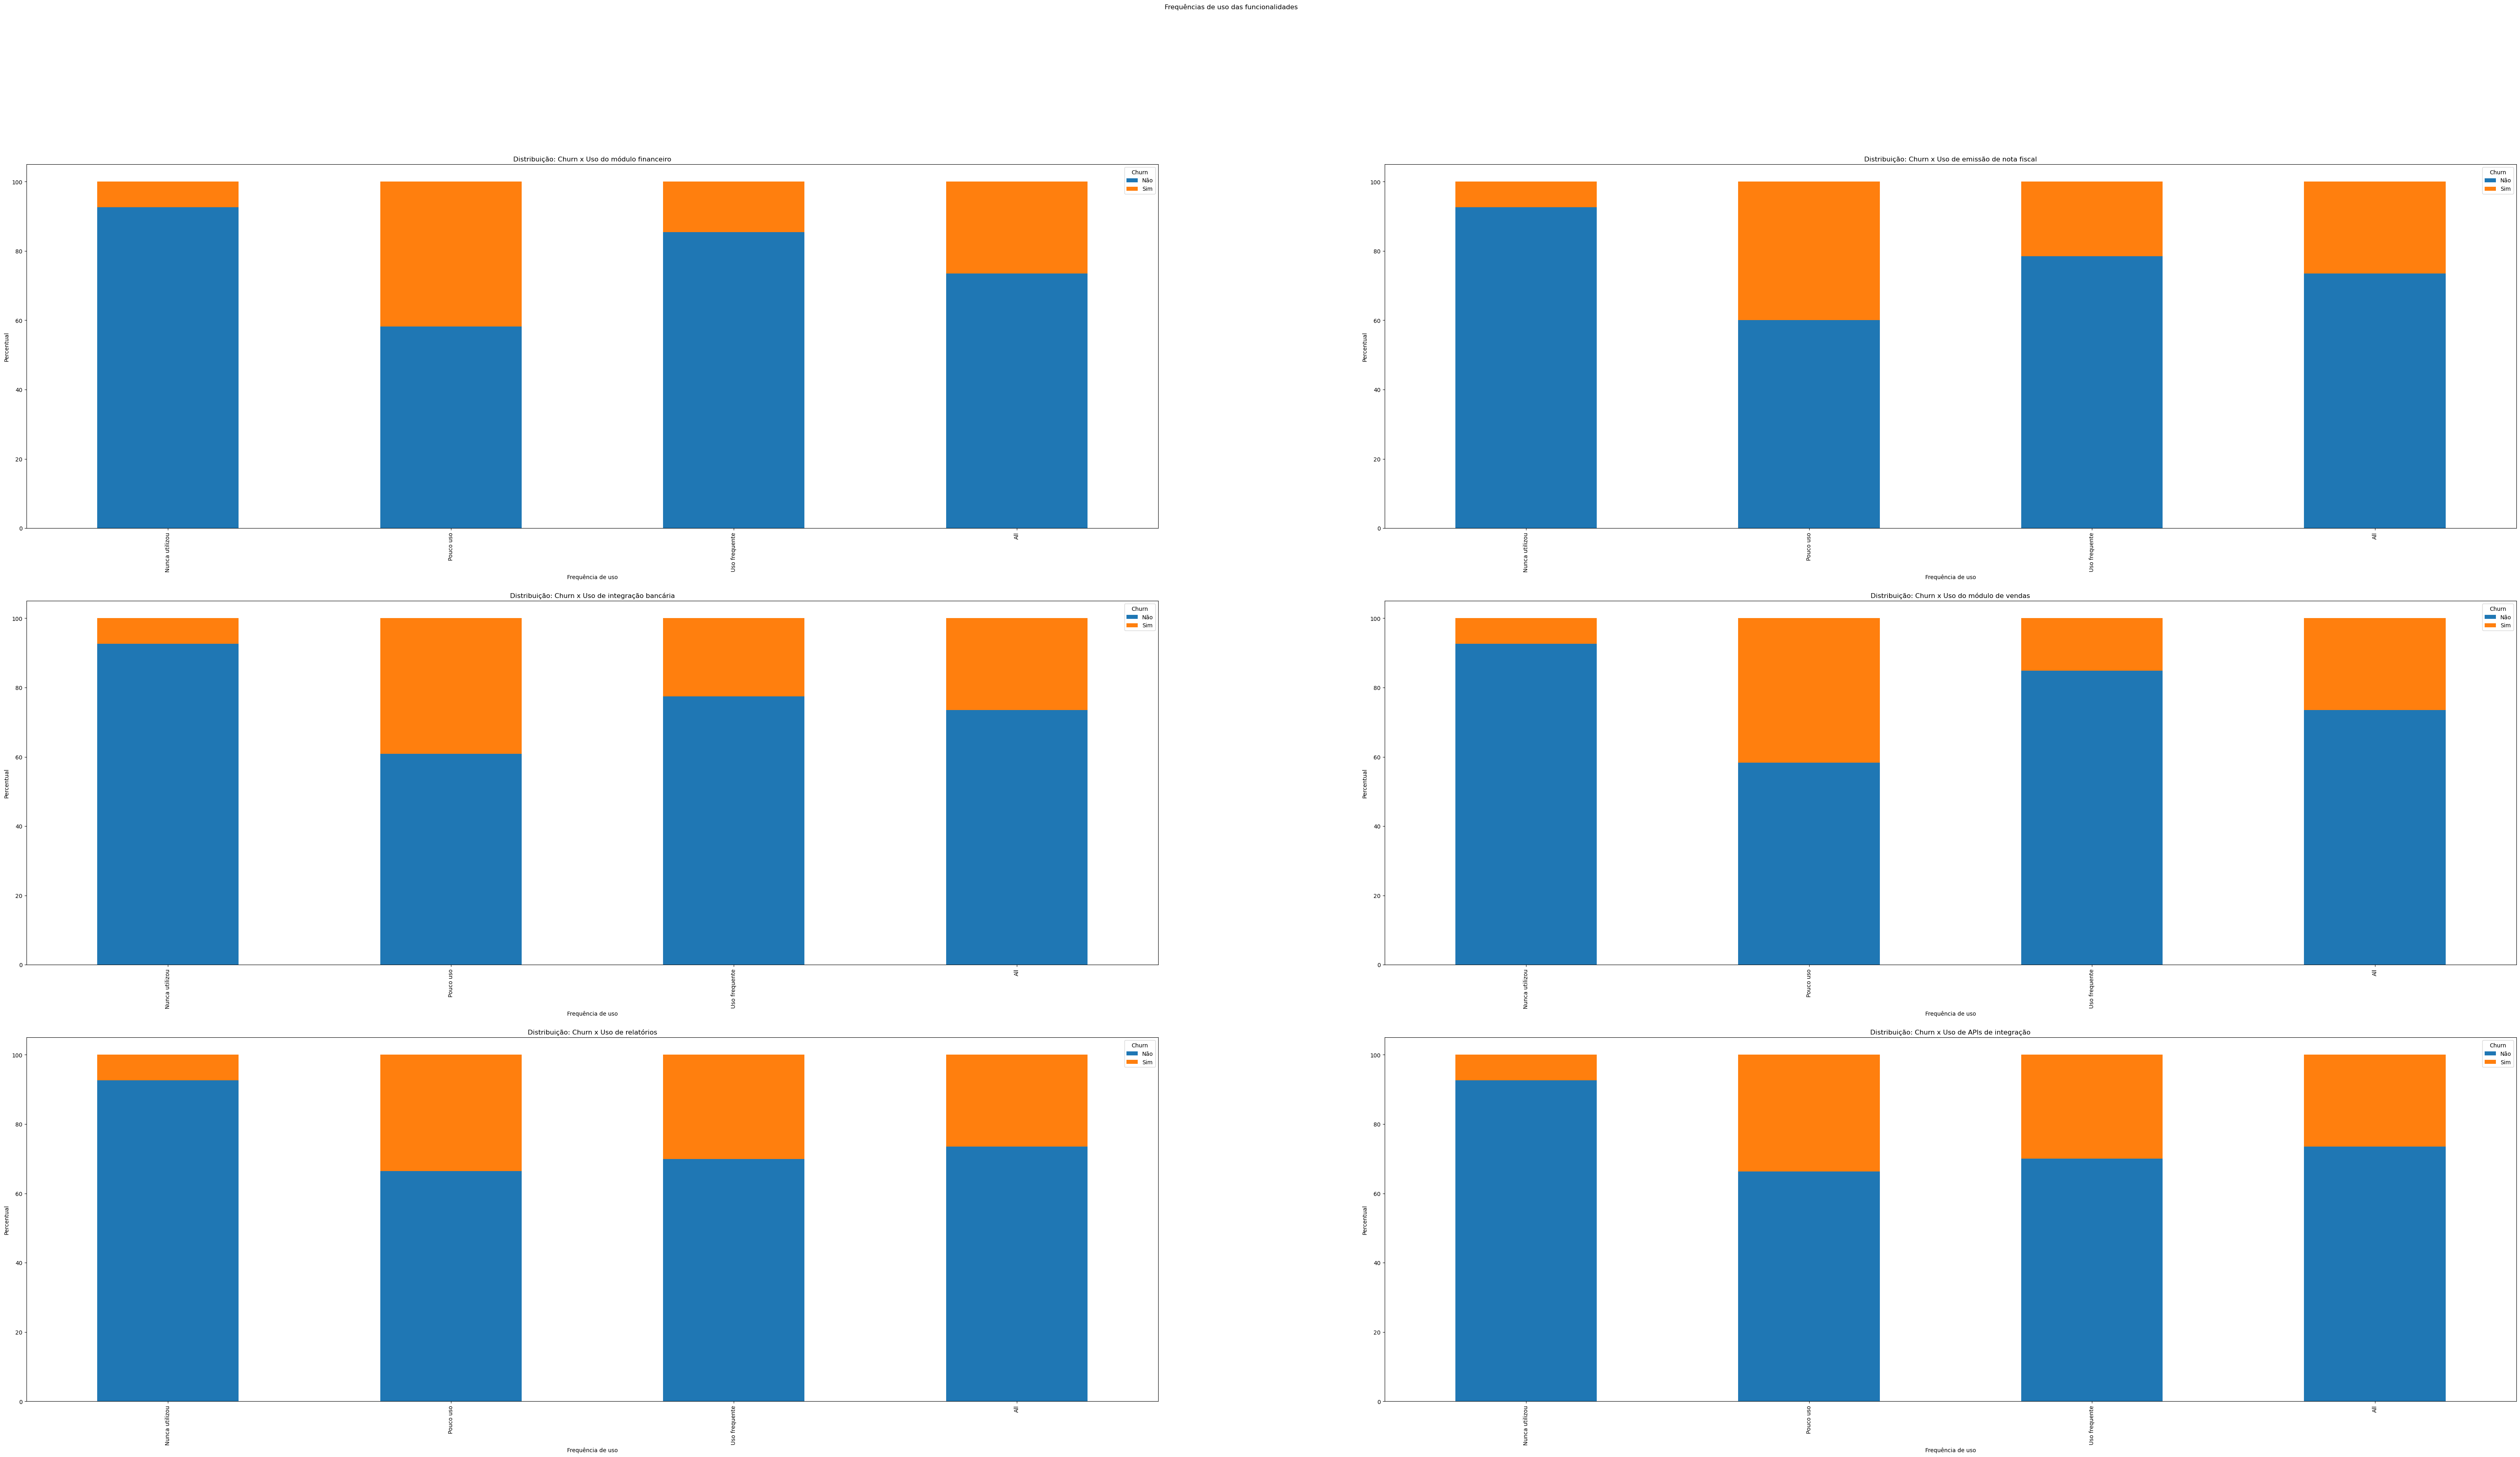

In [148]:
# Frequências de uso das funcionalidades do software
fig, axes = plt.subplots(3, 2, figsize=(80, 40))
fig.suptitle('Frequências de uso das funcionalidades')


crosstab = pd.crosstab(df['frequencia_uso_modulo_financeiro'], df['churn'], normalize='index', margins=True)*100
crosstab.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribuição: Churn x Uso do módulo financeiro')
axes[0, 0].set_xlabel('Frequência de uso')
axes[0, 0].set_ylabel('Percentual')
axes[0, 0].legend(title='Churn')


crosstab = pd.crosstab(df['frequencia_uso_emissao_nota_fiscal'], df['churn'], normalize='index', margins=True)*100
crosstab.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribuição: Churn x Uso de emissão de nota fiscal')
axes[0, 1].set_xlabel('Frequência de uso')
axes[0, 1].set_ylabel('Percentual')
axes[0, 1].legend(title='Churn')

crosstab = pd.crosstab(df['frequencia_uso_integracao_bancaria'], df['churn'], normalize='index', margins=True)*100
crosstab.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribuição: Churn x Uso de integração bancária')
axes[1, 0].set_xlabel('Frequência de uso')
axes[1, 0].set_ylabel('Percentual')
axes[1, 0].legend(title='Churn')

crosstab = pd.crosstab(df['frequencia_uso_modulo_vendas'], df['churn'], normalize='index', margins=True)*100
crosstab.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribuição: Churn x Uso do módulo de vendas')
axes[1, 1].set_xlabel('Frequência de uso')
axes[1, 1].set_ylabel('Percentual')
axes[1, 1].legend(title='Churn')

crosstab = pd.crosstab(df['frequencia_uso_relatorios'], df['churn'], normalize='index', margins=True)*100
crosstab.plot(kind='bar', stacked=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribuição: Churn x Uso de relatórios')
axes[2, 0].set_xlabel('Frequência de uso')
axes[2, 0].set_ylabel('Percentual')
axes[2, 0].legend(title='Churn')

crosstab = pd.crosstab(df['frequencia_uso_apis_integracao'], df['churn'], normalize='index', margins=True)*100
crosstab.plot(kind='bar', stacked=True, ax=axes[2, 1])
axes[2, 1].set_title('Distribuição: Churn x Uso de APIs de integração')
axes[2, 1].set_xlabel('Frequência de uso')
axes[2, 1].set_ylabel('Percentual')
axes[2, 1].legend(title='Churn');

Para as primeiras quatro funcionalidades listadas, a proporção de churns dentre as empresas que fazem pouco uso de alguma funcionalidade é maior do que os churns de empresas que nunca usaram ou que usam frequentemente. No caso do uso de relatórios e do uso de APIs de integração, a proporção de "pouco uso" e "uso frequente" é semelhante dentre as empresas que cancelaram.

In [67]:
df.loc[:, ['churn', 'fundacao_empresa', 'meses_permanencia', 'receita_mensal', 'receita_total', 'engajamento']].groupby('churn', as_index=False).describe().transpose()

0            1
churn                            Não          Sim
fundacao_empresa  count       5174.0       1869.0
                  mean   2017.127174  2015.654896
                  std       4.156245     5.452167
                  min         2001.0       2001.0
                  25%         2016.0       2015.0
                  50%         2018.0       2017.0
                  75%         2020.0       2019.0
                  max         2021.0       2021.0
meses_permanencia count       5174.0       1869.0
                  mean     37.569965    17.979133
                  std      24.113777    19.531123
                  min            0.0          1.0
                  25%           15.0          2.0
                  50%           38.0         10.0
                  75%           61.0         29.0
                  max           72.0         72.0
receita_mensal    count       5174.0       1869.0
                  mean     61.265124    74.441332
                  std      31.092648    24.666053
                  min          18.25        18.85
                  25%           25.1        56.15
                  50%         64.425        79.65
                  75%           88.4         94.2
                  max         118.75       118.35
receita_total     count       5163.0       1869.0
                  mean   2555.344141  1531.796094
                  std    2329.456984  1890.822994
                  min           18.8        18.85
                  25%        577.825        134.5
                  50%         1683.6       703.55
                  75%       4264.125       2331.3
                  max        8672.45       8684.8
engajamento       count       5174.0       1869.0
                  mean      2.082801     2.234601
                  std       0.706012     0.393268
                  min            1.0          1.0
                  25%            1.0          2.0
                  50%           2.33         2.33
                  75%           2.67          2.5
                  max            3.0          3.0

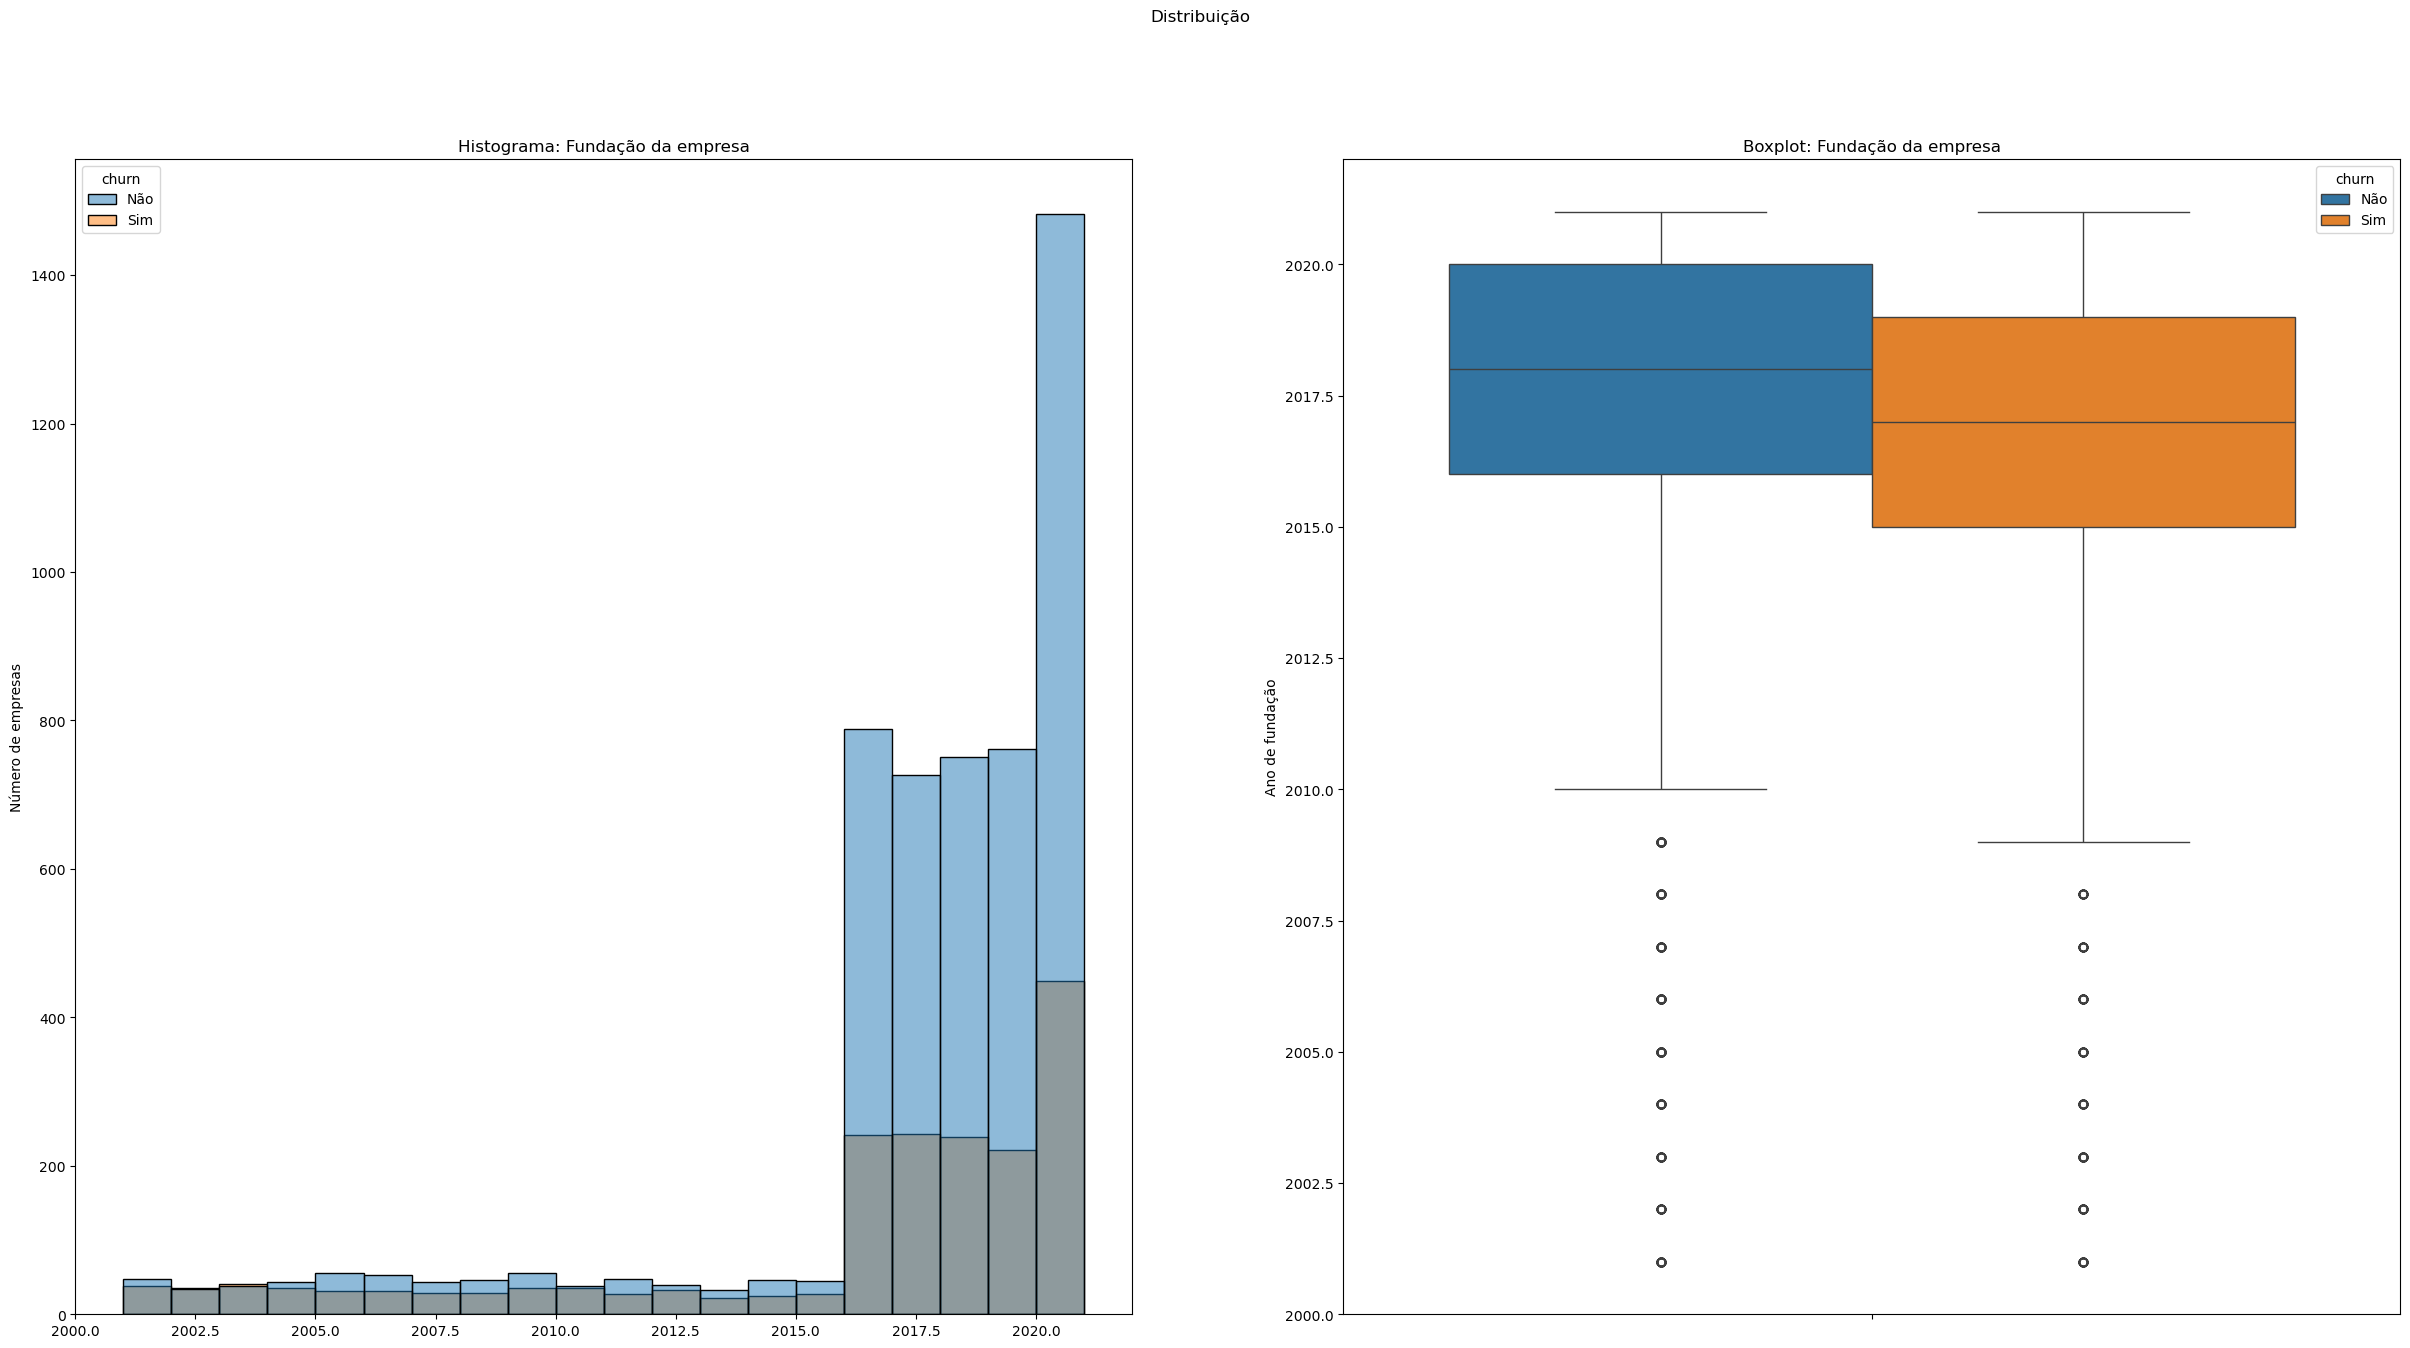

In [150]:
# Ano de fundação da empresa
fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Distribuição')

# Histograma
sns.histplot(ax=axes[0], data=df, x='fundacao_empresa', hue='churn', bins=20)
axes[0].set_title('Histograma: Fundação da empresa')
axes[0].set_xlabel('') 
axes[0].set_ylabel('Número de empresas')

# Boxplot
sns.boxplot(data=df, y='fundacao_empresa', hue='churn')
axes[1].set_title('Boxplot: Fundação da empresa')
axes[1].set_xlabel('') 
axes[1].set_ylabel('Ano de fundação');

O ano de fundação mediano é maior nas empresas do grupo de não churns. Em ambos os grupos, há uma quantidade semelhante de empresas fundadas até 2015; já a partir de 2016, há bem mais empresas no grupo de não churns. A forma da distribuição dos dados é semelhante em ambos os grupos. 

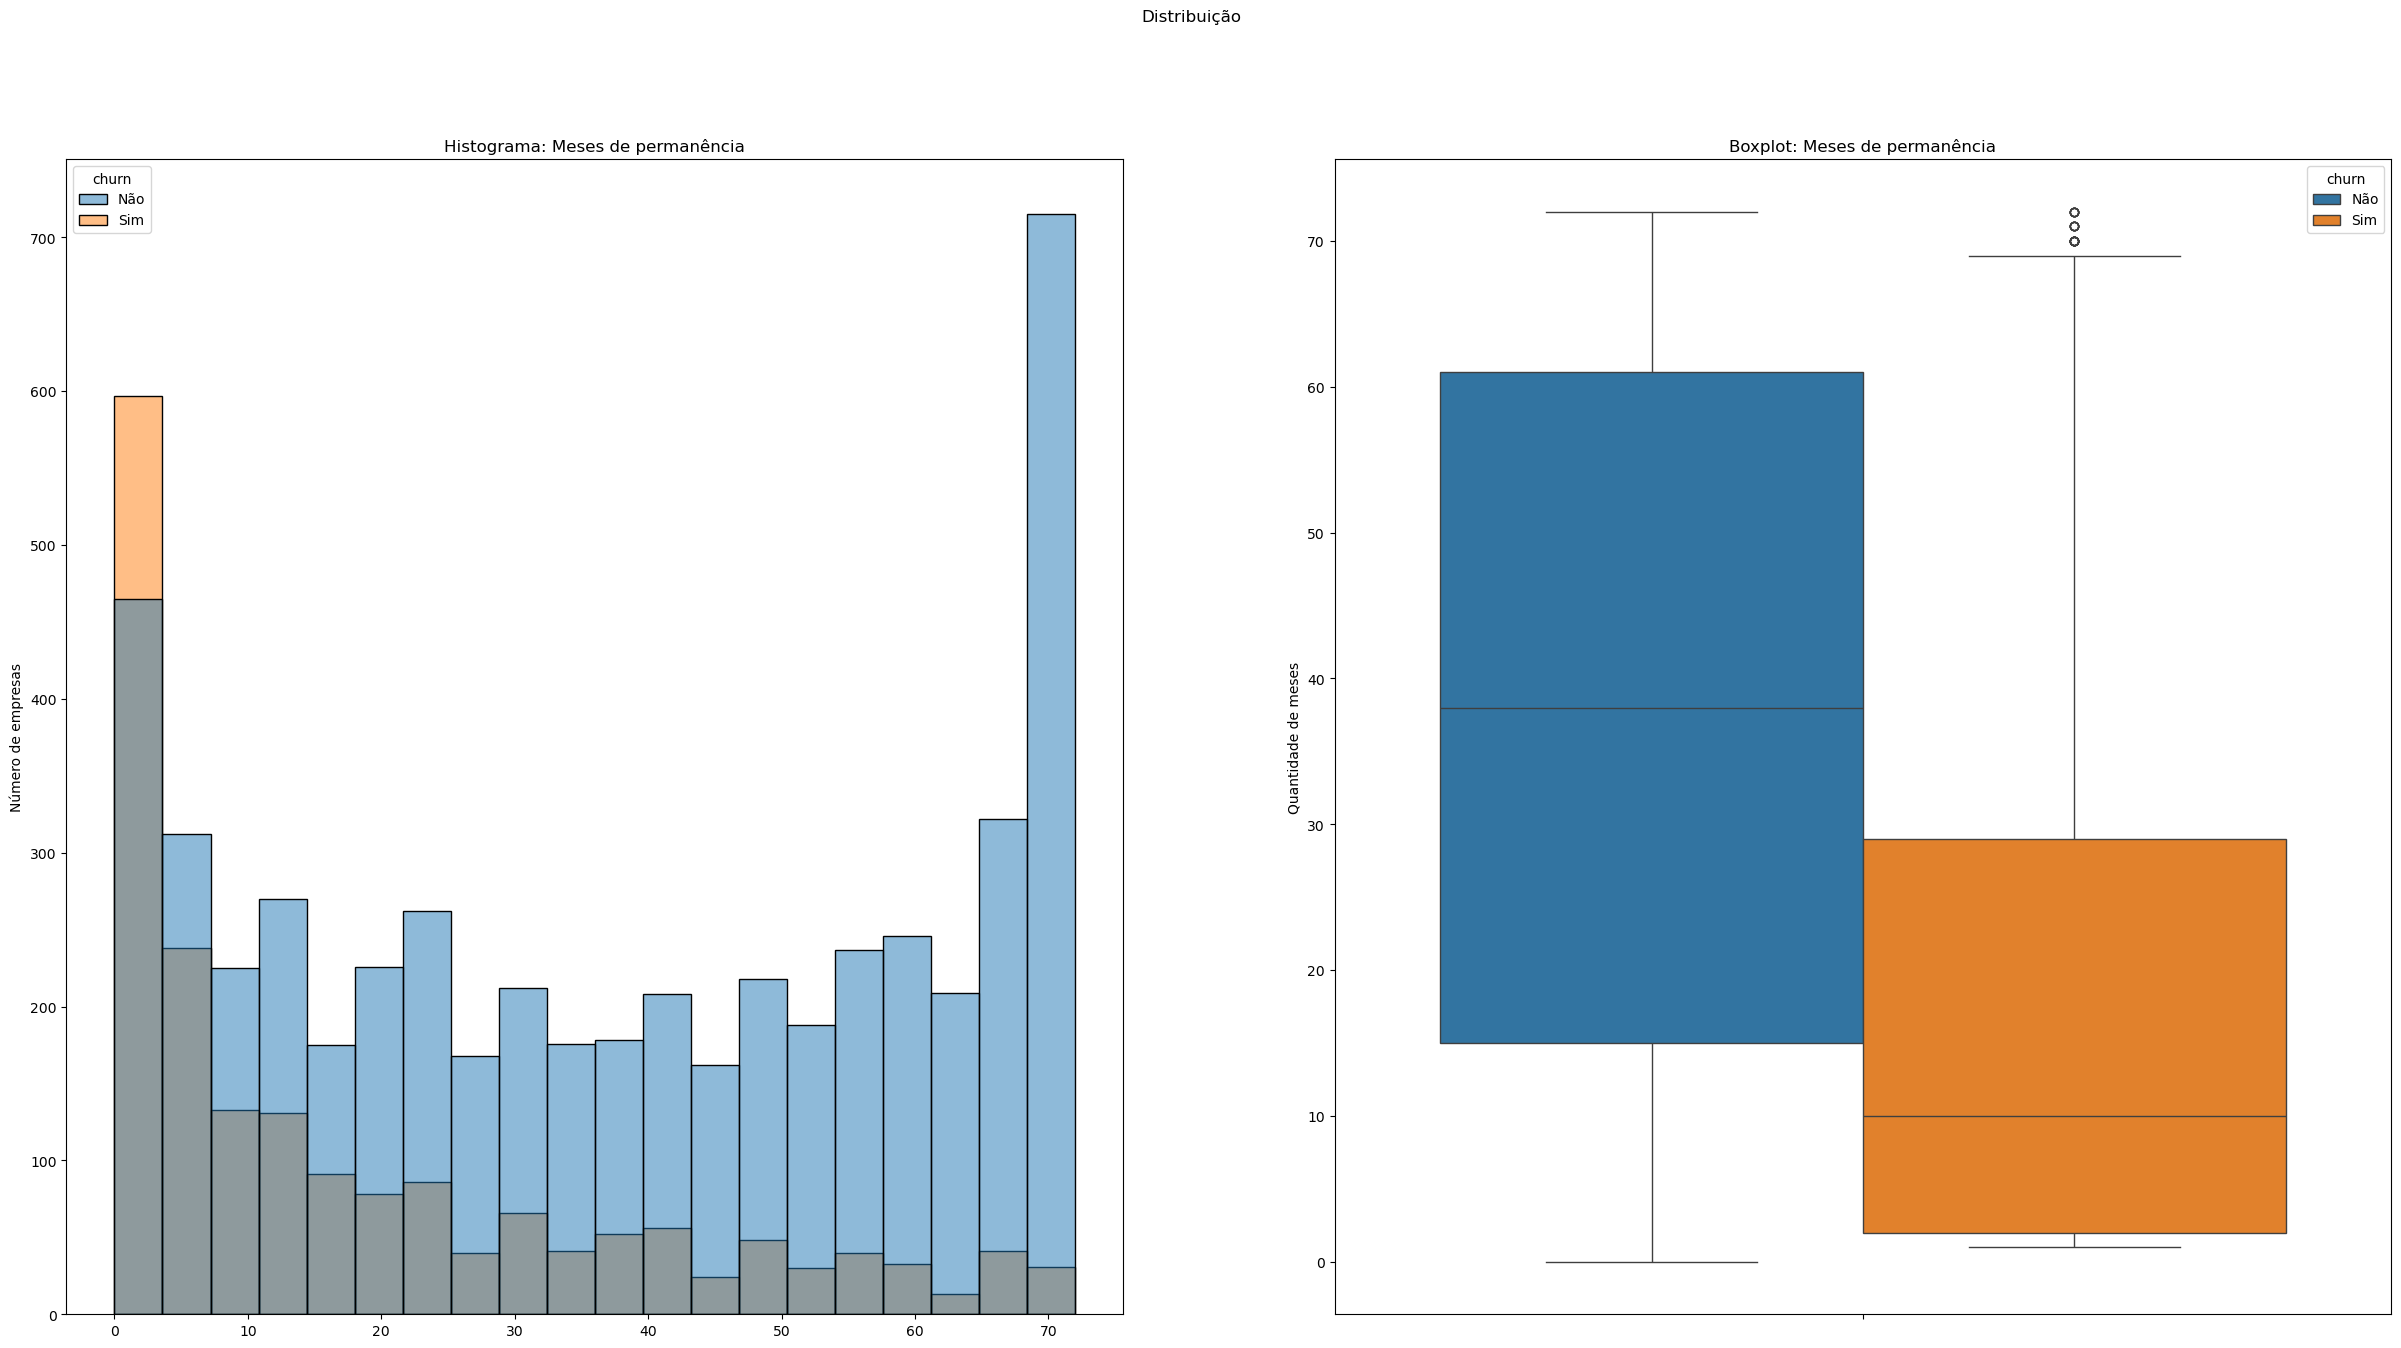

In [151]:
# Meses de permanência
fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Distribuição')

# Histograma
sns.histplot(ax=axes[0], data=df, x='meses_permanencia', hue='churn', bins=20)
axes[0].set_title('Histograma: Meses de permanência')
axes[0].set_xlabel('') 
axes[0].set_ylabel('Número de empresas')

# Boxplot
sns.boxplot(data=df, y='meses_permanencia', hue='churn')
axes[1].set_title('Boxplot: Meses de permanência')
axes[1].set_xlabel('') 
axes[1].set_ylabel('Quantidade de meses');

Considerando os usuários com maior tempo de permanência, a maioria não cancelou. Dentre o grupo de usuários que cancelou, metade dos churns aconteceu nos primeiros 10 meses. Já para o grupo de não churns, a mediana de permanência é de 38 meses (3 anos e 2 meses).

Dentre o grupo que não cancelou, temos um pico de usuários na extremidade direita do histograma (meiores tempos de permanência), o que pode indicar usuários já fidelizados que gostam do software. Também temos um pico de usuários com baixos tempos de permanência(extremidade esquerda do histograma), podendo se tratar de usuários novos. Quanto aos outros tempos de permanência, o número de usuários é relativamente homogêneo. 

Considerando-se o grupo de churns, percebe-se que uma grande parte dos churns se deu nos períodos de permanência mais baixos, o que pode indicar que campanhas para aumentar o tempo de permanência de usuários aumentem a chance de fidelização.

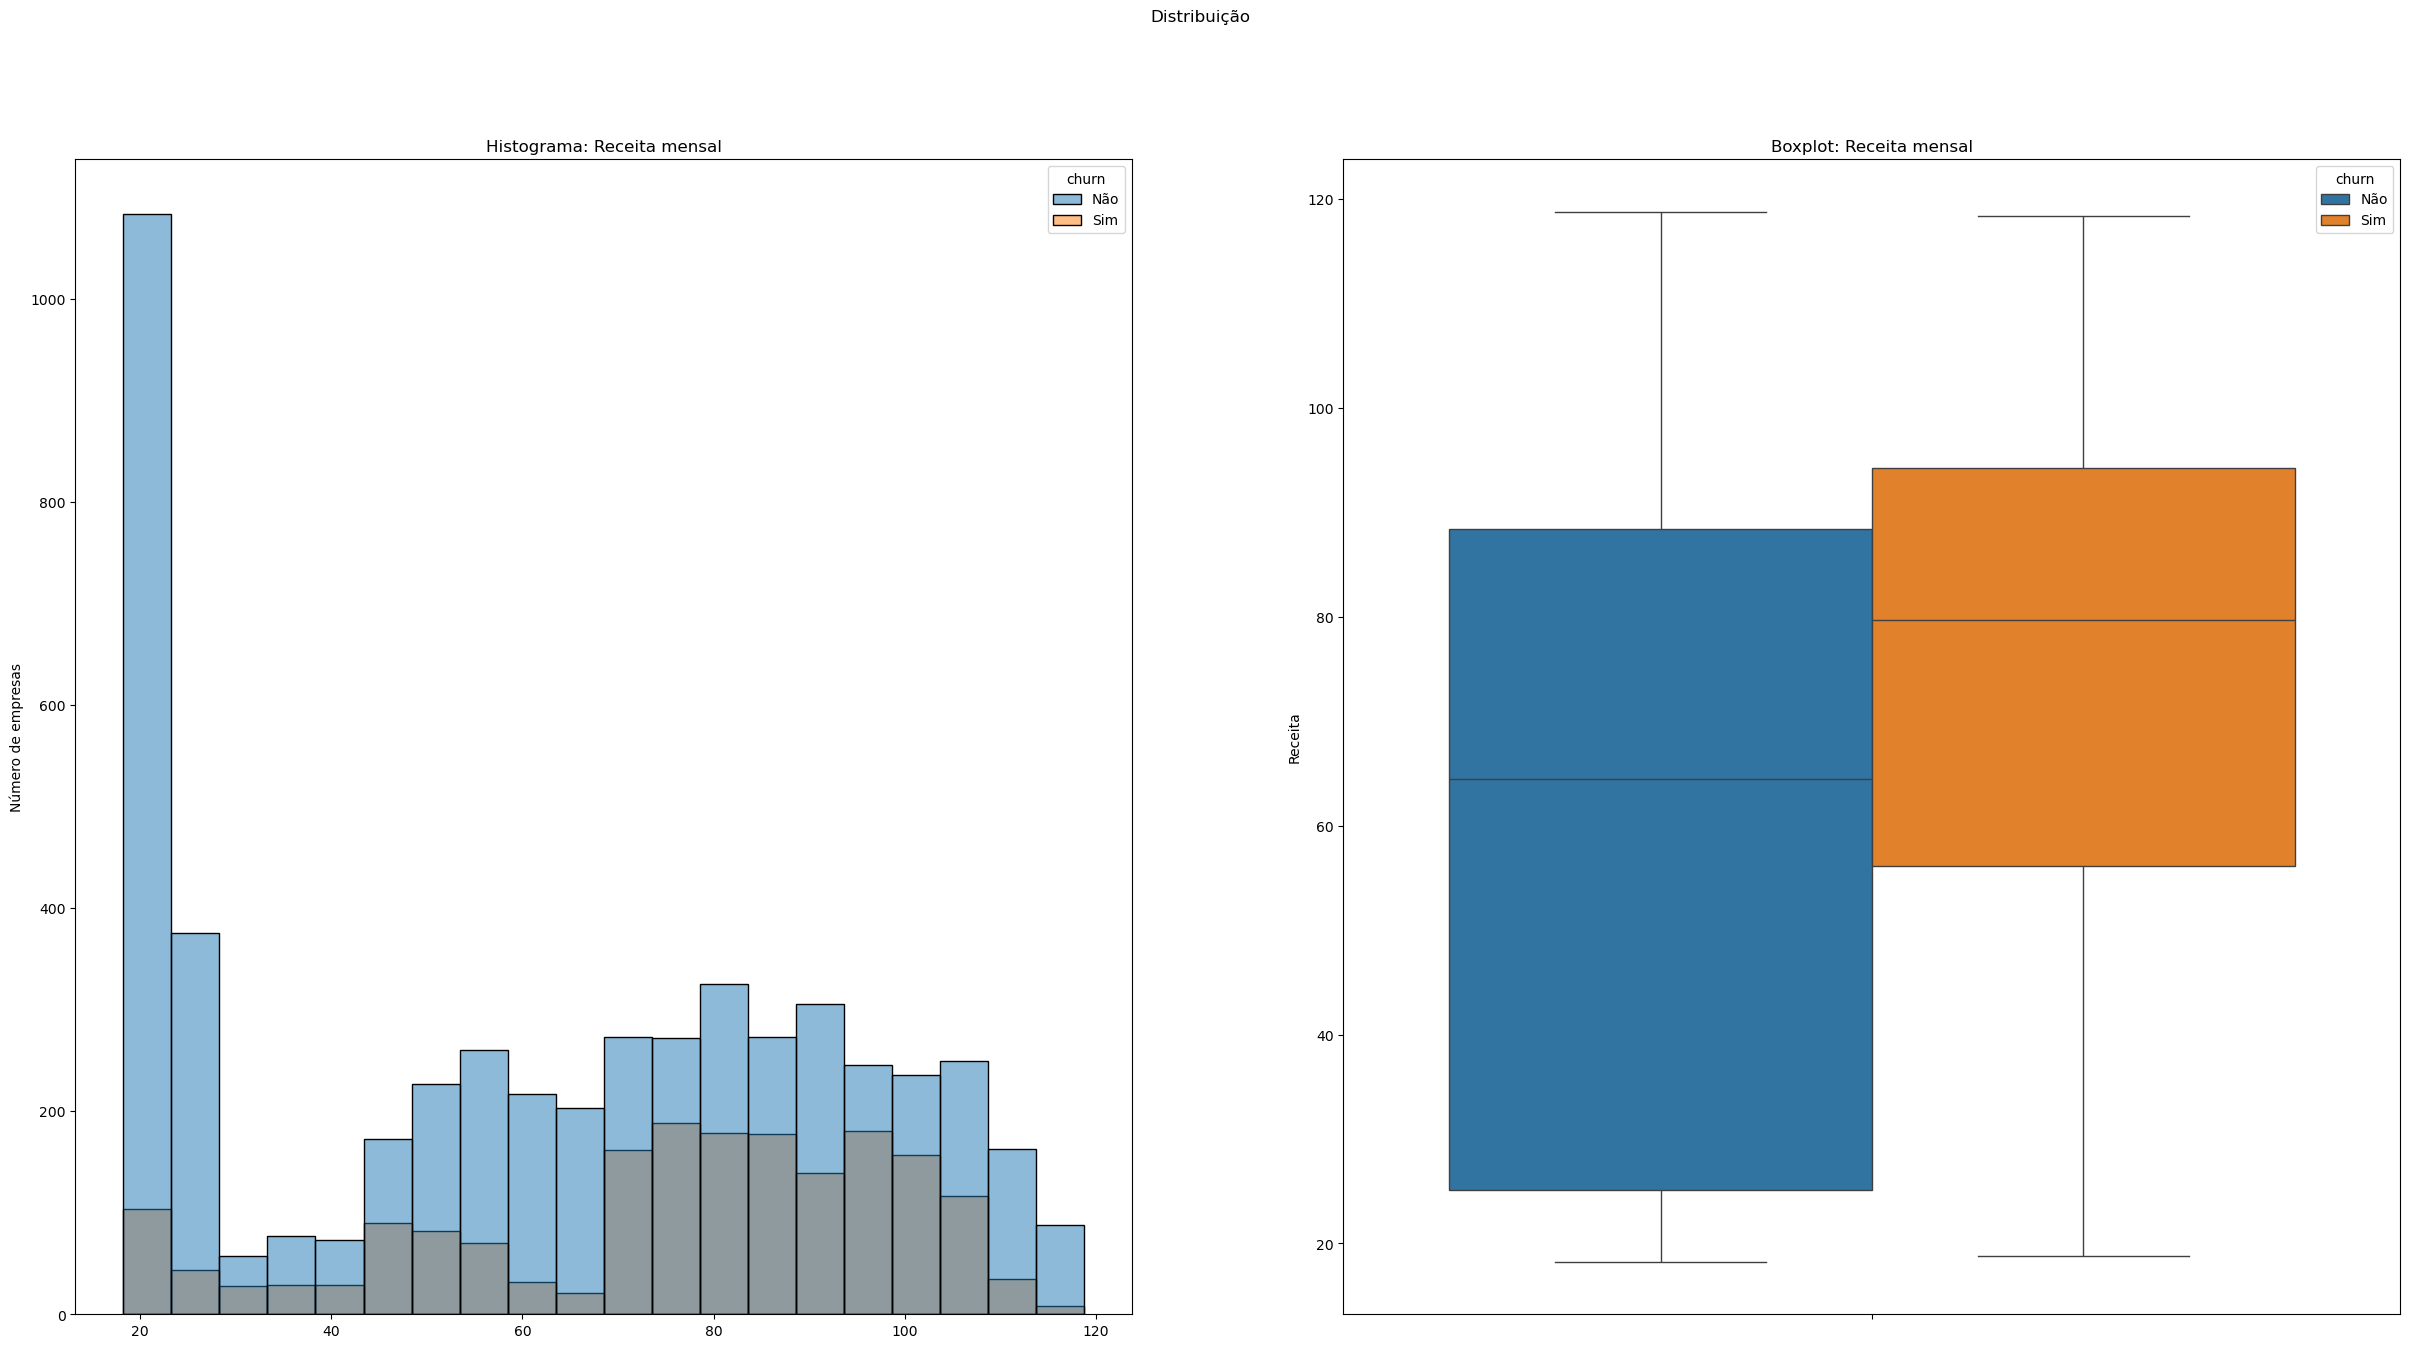

In [152]:
# Receita mensal
fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Distribuição')

# Histograma
sns.histplot(ax=axes[0], data=df, x='receita_mensal', hue='churn', bins=20)
axes[0].set_title('Histograma: Receita mensal')
axes[0].set_xlabel('') 
axes[0].set_ylabel('Número de empresas')

# Boxplot
sns.boxplot(data=df, y='receita_mensal', hue='churn')
axes[1].set_title('Boxplot: Receita mensal')
axes[1].set_xlabel('') 
axes[1].set_ylabel('Receita');

Observando-se as menores faixas de renda mensal, nota-se que há um número significativamente maior de usuários que não cancelaram em relação aos churns. Para faixas de renda aproximadamente entre 70 e 110, o número de churns aumenta. A renda mensal média e mediana é maior no grupo de churns, o que indica que clientes que saem têm em média e mediana um ticket médio maior que os que ficam.

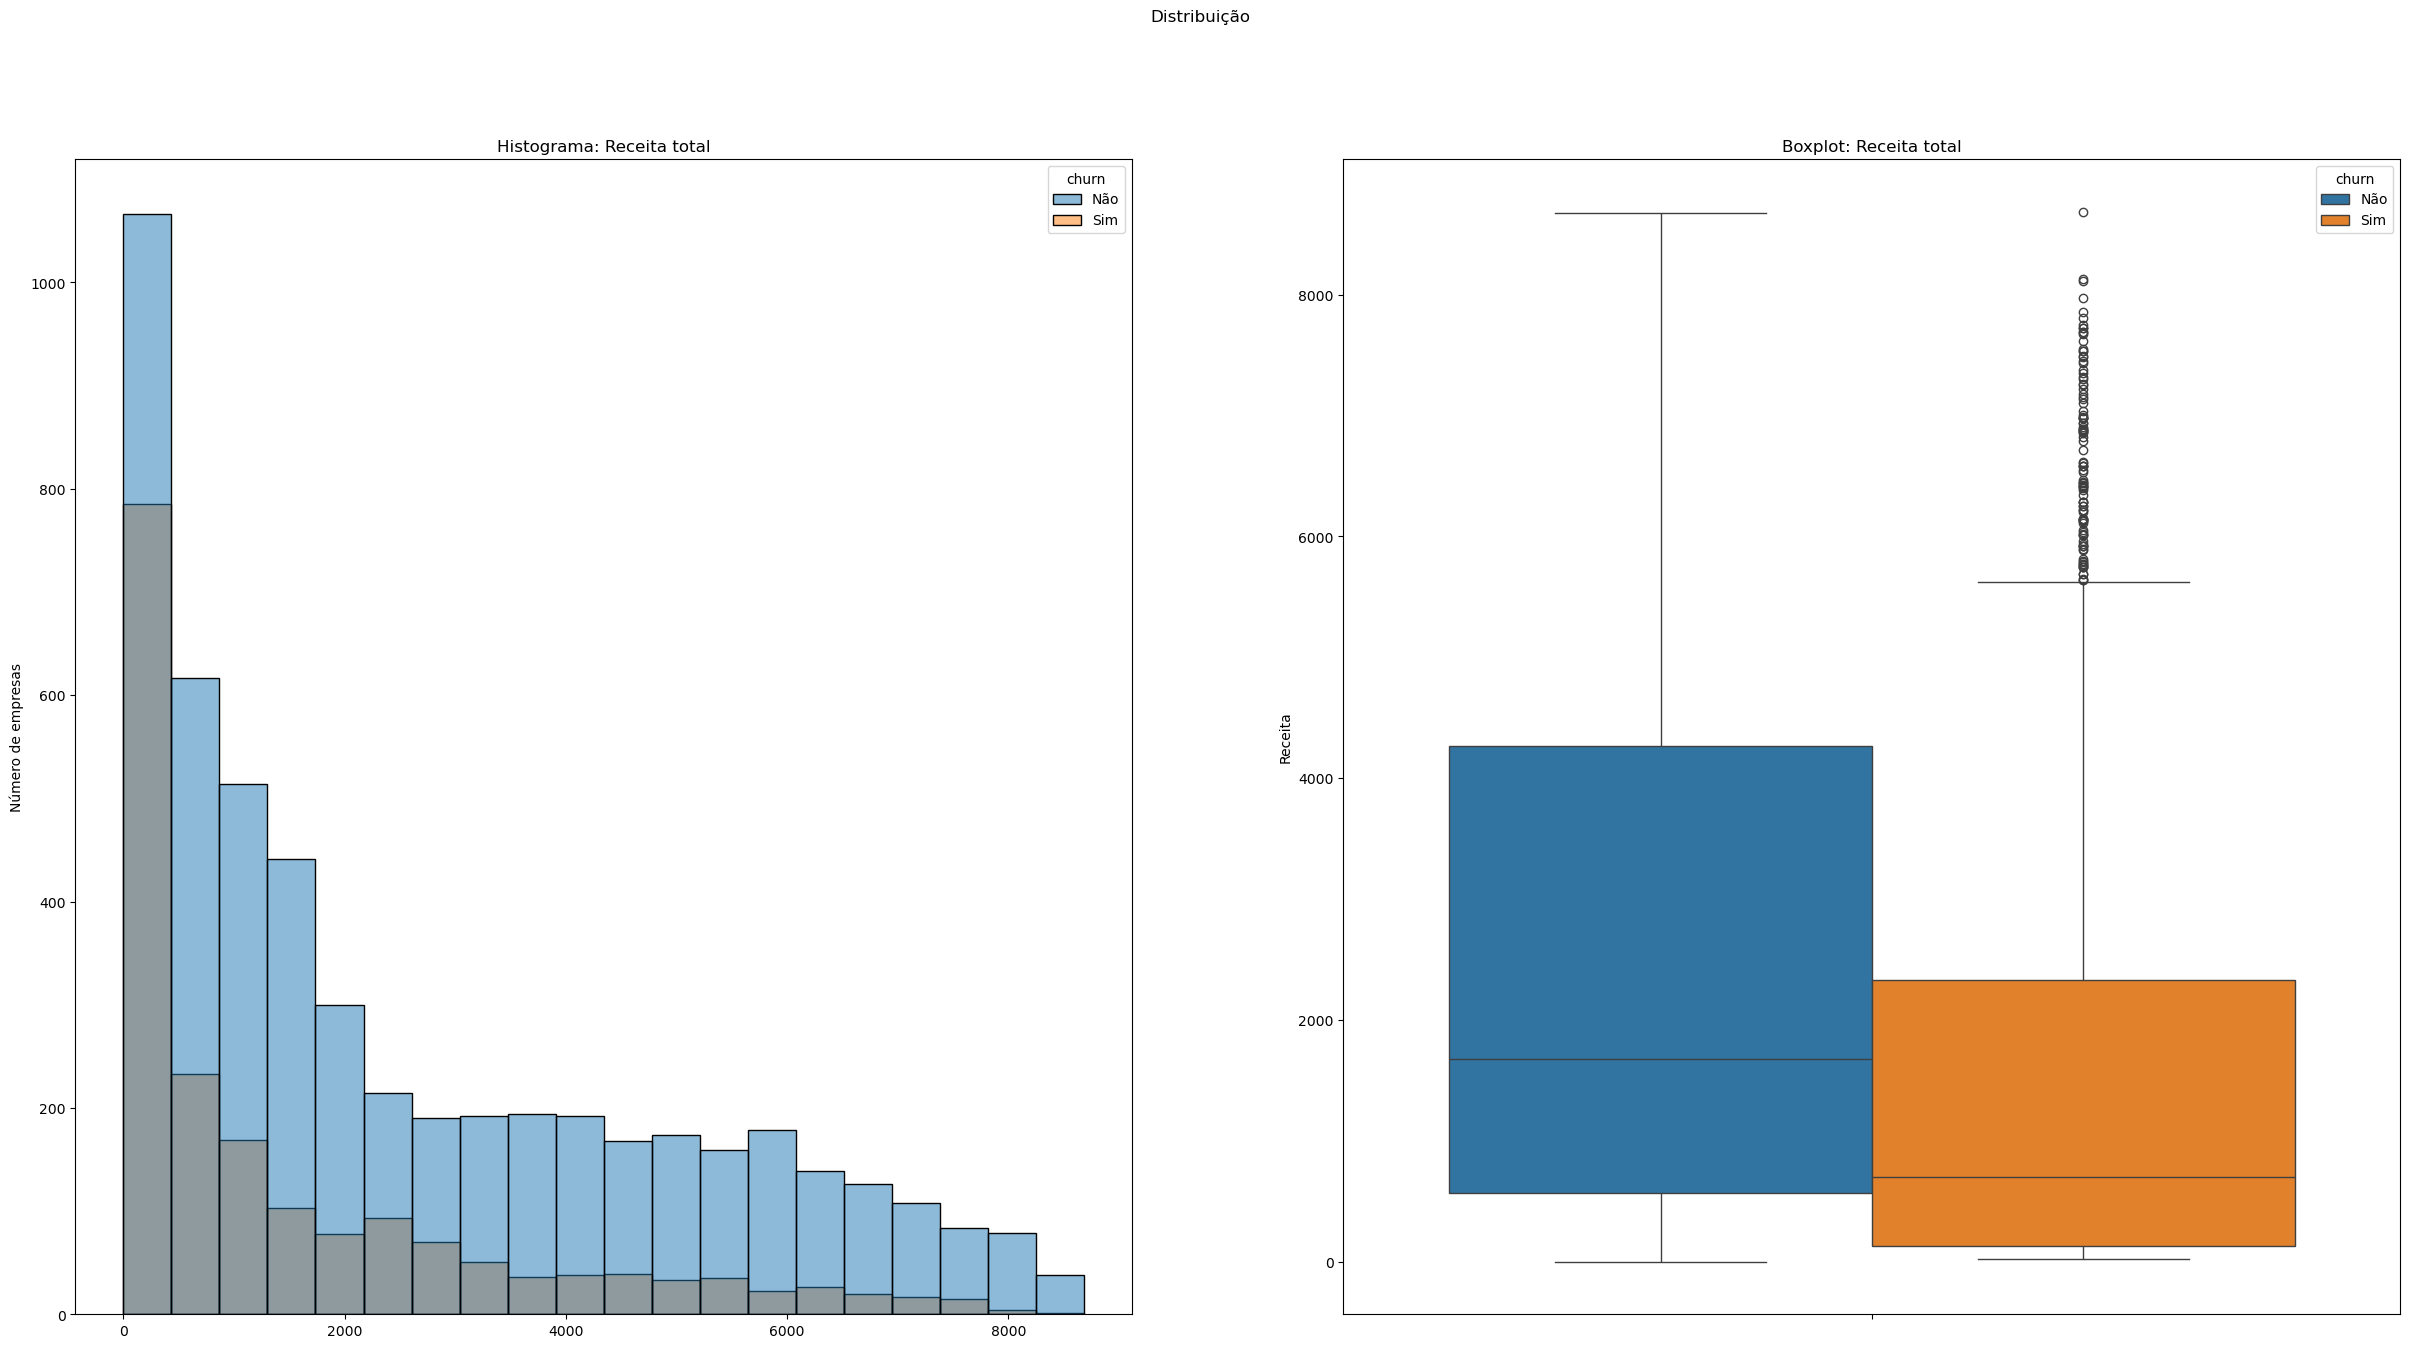

In [153]:
# Receita total
fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Distribuição')

# Histograma
sns.histplot(ax=axes[0], data=df, x='receita_total', hue='churn', bins=20)
axes[0].set_title('Histograma: Receita total')
axes[0].set_xlabel('') 
axes[0].set_ylabel('Número de empresas')

# Boxplot
sns.boxplot(data=df, y='receita_total', hue='churn')
axes[1].set_title('Boxplot: Receita total')
axes[1].set_xlabel('') 
axes[1].set_ylabel('Receita');

As distribuições dos dados de receita total de ambos os grupos (churn e não churn) são assimétricas com cauda à direita. 

O ticket acumulado do grupo de não churns é, na média e mediana, maior que o do grupo de churns. Isso indica que os clientes retidos deixaram mais dinheiro na empresa e que o grupo de churns é o de menor valor histórico.

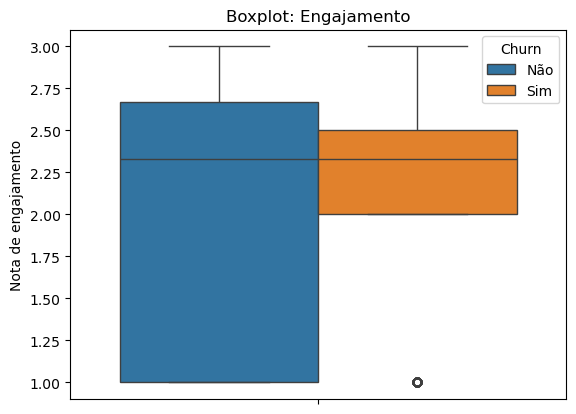

In [68]:
# Boxplot
ax = sns.boxplot(data=df, y='engajamento', hue='churn')
ax.set_title('Boxplot: Engajamento')
ax.set_xlabel('') 
ax.set_ylabel('Nota de engajamento')
ax.legend(title='Churn');

A média de engajamento dos usuários que cancelaram é ligeiramente maior (~2,23) que dos não-churns (~2,08). No entanto, a mediana dos dois grupos é igual (2,33).

25% das empresas do grupo de não churn apresentou nota de engajamento 1 (mínima), enquanto 25% dos churns apresentaram nota de engajamento de até 2,0. Mais usuários do grupo de não churn apresentam nota 1 de engajamento (nunca utilizou nenhuma das seis features analisadas), o que poderiam ser usuários novos que ainda não utlizaram o sistema.

25% dos usuários não churn tem engajamento igual ou superior a 2,67, já nos churns 25% dos usuários apresentam nota maior que 2,5.

Em ambos os grupos (churns e não churns) há empresas com nota de engajamento máxima (3,0). No entanto, o número de empresas com esse engajamento é maior no grupo de não churns

churn,Não,Sim
engajamento,,
1.0,92.595020,7.404980
2.0,47.763348,52.236652
2.17,54.244306,45.755694
2.33,64.181994,35.818006
2.5,72.629696,27.370304
2.67,77.699531,22.300469
2.83,87.565674,12.434326
3.0,94.718310,5.281690
All,73.463013,26.536987


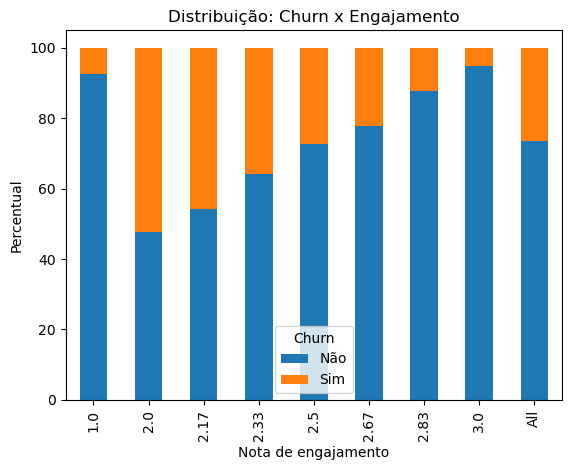

In [69]:
# Engajamento
crosstab = pd.crosstab(df['engajamento'], df['churn'], normalize='index', margins=True)*100
crosstab.plot(kind='bar', stacked=True)

plt.title('Distribuição: Churn x Engajamento')
plt.ylabel('Percentual')
plt.xlabel('Nota de engajamento')
plt.legend(title='Churn');

crosstab

No caso dos usuários com nota 1 (nunca utilizaram nenhuma das seis features do sistema), a grande maioria não cancelou (~92,6%). O que pode indicar usuários novos que ainda não tiveram tempo de utilizar o sistema ou usuários que utilizam apenas funcionalidades mais básicas do sistema. Nesse sentido, vale a pena investigar permanência x engajamento.

A partir da nota de engajamento 2, o número de churns diminui à medida que o engajamento aumenta, havendo apenas 5,28% de churns dentre as empresas com engajamento máximo (3 -> nota máxima de frequência de uso em todas as features).

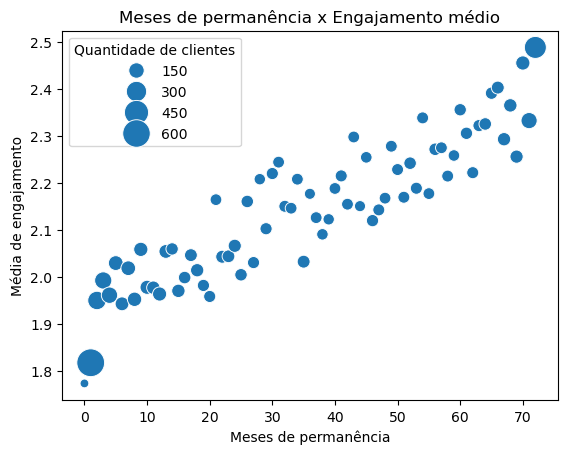

In [162]:
# Investigando o engajamento médio por mês de permanência
aux = df.loc[:, ['engajamento', 'meses_permanencia']].groupby('meses_permanencia', as_index=False).agg(['mean', 'count'])

aux.columns = ['_'.join(col) for col in aux.columns]

ax = sns.scatterplot(aux, x='meses_permanencia_', y='engajamento_mean', size='engajamento_count', sizes=(40, 400))
ax.set_title('Meses de permanência x Engajamento médio')
ax.set_xlabel('Meses de permanência') 
ax.set_ylabel('Média de engajamento')
ax.legend(title='Quantidade de clientes');

A forma do gráfico dá indícios de que há uma correlação positiva entre a média de engajamento e a quantidade de meses de permanência do cliente, ou seja, o engajamento aumenta quanto mais o cliente permanece no contrato.

Além disso, analisando-se o tamanho dos círculos no gráfico, observa-se uma quantidade significativa de clientes com poucos meses de permanência e baixo engajamento. De maneira semelhante, há uma quantidade significativa de clientes com alta permanência (mais de 70 meses e média de engajamento elevada).

## Conclusão

A análise dos dados permitiu a obtenção de insights importantes sobre o perfil geral de clientes da empresa e, em especial, sobre o **churn** e os **padrões relacionados à sua ocorrência**.

**Quem é o nosso cliente:**

Em sua maioria, nossos clientes são empresas jovens (fundadas há menos de 10 anos) e com até 5 funcionários. A maioria faz conciliação bancária manual ou não faz, indicando menor maturidade operacional e menor uso de automação. A mediana de permanência das empresas clientes é de 2 anos e 5 meses.

**Aumento do churn:**

- A taxa geral de churn é de 36%.
- Em abril ocorreram 911 churns, já em maio este número aumentou para 958, representando um **aumento de 5,16% na quantidade de usuários que cancelaram**.
- Já em termos da taxa mensal de churn (cancelamentos/usuários ativos), observou-se uma taxa mensal de 15% em abril e 19% em maio, ou seja, um **aumento de 24,6% na taxa mensal de churn**.

Destaca-se que ainda não é possível concluir se esse aumento representa uma tendência a longo prazo, pois só foram analisados dois meses de dados.

**Padrões observados em relação ao churn:**

- **Baixo tempo de permanência:** Metade dos churns ocorreram antes do cliente completar um ano de contrato.
- **Influência do tipo de contrato na retenção:** Contratos de curto prazo (mês a mês) possuem maior percentual de churn do que contratos anuais ou trimestrais.
- **Influência da forma de pagamento na retenção:** Contratos com pagamento único por boleto possuem maior percentual de churn do que contratos com outras modalidades de pagamento.
- **Importância do engajamento:** A análise do engajamento médio com as funcionalidades do sistema demonstrou uma queda do percentual de churn à medida que o engajamento aumenta. Além disso, observou-se uma correlação positiva entre o engajamento e o tempo de permanência.
- **Outros fatores de influência:** características como quantidade de sócios e funcionários, emissão de boleto e consolidação bancária impactam o churn, porém em menor escala.

**Recomendações:**

- É importante investigar fatores que podem estar relacionados ao aumento do churn no período, como piora recente na experiência do cliente e no suporte, mudanças no produto, aumento de preço e efeitos da concorrência.
- Incentivo à migração para contratos mais longos.
- Incentivar ações para aumento do engajamento de clientes pouco ativos.
- Monitoramento contínuo da taxa de churn e dos fatores associados aos cancelamentos.